This script setup the experiments, assuming that the l4s part has been installed correctly. 

In [1]:
import subprocess

tx0_prefix = "ssh PeterYao@pc490.emulab.net"
router0_prefix = "ssh PeterYao@pc500.emulab.net"
router1_prefix = "ssh PeterYao@pc487.emulab.net"
rx0_prefix = "ssh PeterYao@pc816.emulab.net"

nodes_prefix = [tx0_prefix, router0_prefix, router1_prefix, rx0_prefix]

class node:
    def __init__(self, node_ssh_prefix) -> None:
        self.ssh_prefix = node_ssh_prefix

    def execute(self, command, background=False):
        if background:
            print("executing in background")
            # full_command = f"{self.ssh_prefix} 'setsid nohup {command} > /dev/null 2>&1 &'"
            full_command = f'{self.ssh_prefix} "{command}"'
            subprocess.Popen(full_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        else:
            full_command = f'{self.ssh_prefix} "{command}"'
            result = subprocess.run(full_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            if result.returncode == 0:
                print(result.stdout.decode('utf-8'))
            else:
                print(f"Error: {result.stderr.decode('utf-8')}")
        return None
        
tx0_node = node(tx0_prefix)
delay_node = node(router0_prefix)
router_node = node(router1_prefix)
rx0_node = node(rx0_prefix)

nodes = [tx0_node, delay_node, router_node, rx0_node]





In [2]:
from fabric import Connection


tx = Connection(
    host='pc490.emulab.net',
    user = 'PeterYao',
    port=22,
)




delay = Connection(
    host='pc500.emulab.net',
    user = 'PeterYao',
    port=22,
)


router = Connection(
    host='pc487.emulab.net',
    user='PeterYao',
    port=22,
)

rx = Connection(
    host='pc816.emulab.net',
    user
    = 'PeterYao',  
    port=22,
)

conns = [router, delay, tx, rx]


# Experiment 3  add l4s


### Install the l4s kernel in each node. 

In [3]:
rx.put("install_l4s_kernel.sh")

In [7]:
rx.run(" cp -r /mydata/core-network-5g/etc/ /local/repository/")

<Result cmd=' cp -r /mydata/core-network-5g/etc/ /local/repository/' exited=0>

In [ ]:


rx.run("sudo ip route add 12.1.1.64/26 via 192.168.70.140")
rx.run("sudo ip route add 12.1.1.128/25 via 192.168.70.134")

rx.run("sudo iptables -P FORWARD ACCEPT ")

at the ue1 namespace:
```
sudo ip netns exec ue1 bash
sudo ip route add default via 10.201.1.100
```
so that the icmp messages can be routed back to the sender. 


at the ue3 namesapce:
```
sudo ip netns exec ue3 bash
sudo ip route add default via 10.203.1.100
```

In [ ]:
# delay.put("install_l4s_kernel.sh")
# tx.put("install_l4s_kernel.sh")
# router.put("install_l4s_kernel.sh")

delay.run("chmod +x install_l4s_kernel.sh")
tx.run("chmod +x install_l4s_kernel.sh")
router.run("chmod +x install_l4s_kernel.sh")

delay.run("bash ./install_l4s_kernel.sh", Warning=True)
tx.run("bash ./install_l4s_kernel.sh", Warning=True)
router.run("bash ./install_l4s_kernel.sh", Warning=True)


In [13]:
for c in conns:
    c.run("uname -r")

5.15.72-56eae305c-prague-91
5.15.72-56eae305c-prague-91
5.15.72-56eae305c-prague-91
5.15.72-56eae305c-prague-91


In [12]:
cmd_dualpi2="""sudo apt-get update
sudo apt -y install git gcc make bison flex libdb-dev libelf-dev pkg-config libbpf-dev libmnl-dev libcap-dev libatm1-dev selinux-utils libselinux1-dev
sudo git clone https://github.com/L4STeam/iproute2.git
cd iproute2
sudo chmod +x configure
sudo ./configure
sudo make
sudo make install"""

router.run(cmd_dualpi2)

router.run("sudo modprobe sch_dualpi2")

Hit:1 http://repos.emulab.net/emulab/ubuntu jammy InRelease
Hit:2 http://repos.emulab.net/grub-backports/ubuntu jammy InRelease
Hit:3 http://us.archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://us.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://us.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://us.archive.ubuntu.com/ubuntu jammy-security InRelease
Reading package lists...


Reading package lists...
Building dependency tree...
Reading state information...
gcc is already the newest version (4:11.2.0-1ubuntu1).
gcc set to manually installed.
make is already the newest version (4.3-4.1build1).
make set to manually installed.
git is already the newest version (1:2.34.1-1ubuntu1.11).
git set to manually installed.
The following additional packages will be installed:
  libdb5.3-dev libfl-dev libfl2 libpcre2-16-0 libpcre2-32-0 libpcre2-dev
  libpcre2-posix3 libsepol-dev m4 zlib1g-dev
Suggested packages:
  bison-doc flex-doc db5.3-doc m4-doc
The following NEW packages will be installed:
  bison flex libatm1-dev libbpf-dev libcap-dev libdb-dev libdb5.3-dev
  libelf-dev libfl-dev libfl2 libmnl-dev libpcre2-16-0 libpcre2-32-0
  libpcre2-dev libpcre2-posix3 libselinux1-dev libsepol-dev m4 pkg-config
  selinux-utils zlib1g-dev
0 upgraded, 21 newly installed, 0 to remove and 107 not upgraded.
Need to get 4,450 kB of archives.
After this operation, 16.2 MB of additional 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 4,450 kB in 1s (6,270 kB/s)
Selecting previously unselected package m4.
(Reading database ... 118499 files and directories currently installed.)
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Selecting previously unselected package flex.
Preparing to unpack .../01-flex_2.6.4-8build2_amd64.deb ...
Unpacking flex (2.6.4-8build2) ...
Selecting previously unselected package bison.
Preparing to unpack .../02-bison_2%3a3.8.2+dfsg-1build1_amd64.deb ...
Unpacking bison (2:3.8.2+dfsg-1build1) ...
Selecting previously unselected package libatm1-dev.
Preparing to unpack .../03-libatm1-dev_1%3a2.5.1-4build2_amd64.deb ...
Unpacking libatm1-dev (1:2.5.1-4build2) ...
Selecting previously unselected package zlib1g-dev:amd64.
Preparing to unpack .../04-zlib1g-dev_1%3a1.2.11.dfsg-2ubuntu9.2_amd64.deb ...
Unpacking zlib1g-dev:amd64 (1:1.2.11.dfsg-2ubuntu9.2) ...
Selecting previously unselected package libelf-dev:amd64.
Preparing to unpack .../05-lib

Cloning into 'iproute2'...


TC schedulers
 ATM	yes

libc has setns: yes
SELinux support: yes
libbpf support: yes
	libbpf version 0.5.0
ELF support: yes
libmnl support: yes
Berkeley DB: yes
need for strlcpy: yes
libcap support: yes

lib
    CC       libgenl.o
    CC       libnetlink.o
    CC       mnl_utils.o
    AR       libnetlink.a
    CC       utils.o
    CC       utils_math.o
    CC       rt_names.o
    CC       ll_map.o
    CC       ll_types.o
    CC       ll_proto.o
    CC       ll_addr.o
    CC       inet_proto.o
    CC       namespace.o
    CC       json_writer.o
    CC       json_print.o
    CC       json_print_math.o
    CC       names.o
    CC       color.o
    CC       bpf_legacy.o
    CC       bpf_glue.o
    CC       exec.o
    CC       fs.o
    CC       cg_map.o
    CC       bpf_libbpf.o
    CC       mpls_ntop.o
    CC       mpls_pton.o
    AR       libutil.a

ip
    CC       ip.o
    CC       ipaddress.o
    CC       ipaddrlabel.o
    CC       iproute.o
    CC       iprule.o
    CC       ipnetns.o


<Result cmd='sudo modprobe sch_dualpi2' exited=0>

In [14]:
commands_accecn='''
sudo sysctl -w net.ipv4.tcp_congestion_control=prague  
sudo sysctl -w net.ipv4.tcp_ecn=3''' 

rx.run(commands_accecn)
tx.run(commands_accecn)


net.ipv4.tcp_congestion_control = prague
net.ipv4.tcp_ecn = 3
net.ipv4.tcp_congestion_control = prague
net.ipv4.tcp_ecn = 3


<Result cmd='\nsudo sysctl -w net.ipv4.tcp_congestion_control=prague  \nsudo sysctl -w net.ipv4.tcp_ecn=3' exited=0>

In [15]:
# commands_noecn = "bash -c 'sudo sysctl -w net.ipv4.tcp_congestion_control=cubic; sudo sysctl -w net.ipv4.tcp_ecn=0'"
# for node in nodes:
#     node.execute(commands_noecn)
    
print("validating...")
for node in nodes:
    node.execute("sudo sysctl net.ipv4.tcp_congestion_control")
    node.execute("sudo sysctl net.ipv4.tcp_ecn")

validating...
net.ipv4.tcp_congestion_control = prague

net.ipv4.tcp_ecn = 3

net.ipv4.tcp_congestion_control = cubic

net.ipv4.tcp_ecn = 2

net.ipv4.tcp_congestion_control = cubic

net.ipv4.tcp_ecn = 2

net.ipv4.tcp_congestion_control = prague

net.ipv4.tcp_ecn = 3



In [4]:
# for some reason, this cannot be automated

for node in nodes:
    # Download and unzip the kernel package
    node.execute("wget https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip")
    node.execute("sudo apt install unzip")
    node.execute("unzip l4s-testing.zip")
    
    # Install the kernel packages and update GRUB
    node.execute("sudo dpkg --install debian_build/*")
    node.execute("sudo update-grub")
    node.execute("sudo reboot")

for node in nodes:
    # check kernel version
    node.execute("hostname; uname -a")


Reading package lists...
Building dependency tree...
Reading state information...
unzip is already the newest version (6.0-26ubuntu3.2).
The following package was automatically installed and is no longer required:
  libbpf0
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 107 not upgraded.



In [ ]:
cmd_dualpi2="""sudo apt-get update
sudo apt -y install git gcc make bison flex libdb-dev libelf-dev pkg-config libbpf-dev libmnl-dev libcap-dev libatm1-dev selinux-utils libselinux1-dev
sudo git clone https://github.com/L4STeam/iproute2.git
cd iproute2
sudo chmod +x configure
sudo ./configure
sudo make
sudo make install"""

router.run(cmd_dualpi2)
router.run("sudo modprobe sch_dualpi2")

In [ ]:
packages = ['iperf3', 'net-tools', 'moreutils']
for conn in conns:
    for package in packages:
        conn.sudo(f'sudo apt update; apt-get -y install {package}')

In [16]:
# modify the delay on the delay node
base_rtt = 25
delay_interfaces = ["enp5s0f0", "eno3"]

for e in delay_interfaces:
    cmds = "sudo tc qdisc replace dev {iface} root netem delay {owd}ms limit 60000".format(iface=e, owd=base_rtt/2)
    delay.run(cmds)

In [17]:
delay.run("sudo tc qdisc show dev enp5s0f0")
delay.run("sudo tc qdisc show dev eno3")

qdisc netem 8001: root refcnt 9 limit 60000 delay 12.5ms
qdisc netem 8002: root refcnt 9 limit 60000 delay 12.5ms


<Result cmd='sudo tc qdisc show dev eno3' exited=0>

In [18]:
# setup the router queueing discipline
router_egress_name = "eno3"


In [19]:
# set up the btl node
n_bdp = 2
base_rtt = 25
btl_capacity = 100 #in Mbps

# fixed values
btl_limit    = int(1000*n_bdp*btl_capacity*base_rtt/8) # limit of the bottleneck, n_bdp x BDP in bytes 
packet_number=int(btl_limit/1500)+1

print("btl limit: ", btl_limit)
print("packet number: ", packet_number)

btl limit:  625000
packet number:  417


In [87]:

cmds_prefix = '''
            sudo tc qdisc del dev {iface} root
            sudo tc qdisc replace dev {iface} root handle 1: htb default 3 
            sudo tc class add dev {iface} parent 1: classid 1:3 htb rate {capacity}mbit 
            '''.format(iface=router_egress_name, capacity=btl_capacity, buffer=btl_limit)
            
cmds_specific = "sudo tc qdisc add dev {iface} parent 1:3 handle 3: dualpi2 target {threshold}ms".format(iface=router_egress_name, threshold=5)

router.run(cmds_prefix)    
router.run(cmds_specific)
router.run("sudo tc qdisc show dev {iface}".format(iface=router_egress_name))  




qdisc htb 1: root refcnt 9 r2q 10 default 0x3 direct_packets_stat 0 direct_qlen 1000
qdisc dualpi2 3: parent 1:3 limit 10000p target 5ms tupdate 16ms alpha 0.156250 beta 3.195312 l4s_ect coupling_factor 2 drop_on_overload step_thresh 1ms drop_dequeue split_gso classic_protection 10% 


<Result cmd='sudo tc qdisc show dev eno3' exited=0>

In [88]:
router.run("sudo tc qdisc show dev {iface}".format(iface=router_egress_name))  


qdisc htb 1: root refcnt 9 r2q 10 default 0x3 direct_packets_stat 0 direct_qlen 1000
qdisc dualpi2 3: parent 1:3 limit 10000p target 5ms tupdate 16ms alpha 0.156250 beta 3.195312 l4s_ect coupling_factor 2 drop_on_overload step_thresh 1ms drop_dequeue split_gso classic_protection 10% 


<Result cmd='sudo tc qdisc show dev eno3' exited=0>

In [24]:
for c in conns:
    c.run("sudo sysctl -w net.ipv4.tcp_no_metrics_save=1")

net.ipv4.tcp_no_metrics_save = 1
net.ipv4.tcp_no_metrics_save = 1
net.ipv4.tcp_no_metrics_save = 1
net.ipv4.tcp_no_metrics_save = 1


### in UE1 namespace
```bash
sudo sysctl -w  net.ipv4.tcp_congestion_control=prague
sudo sysctl -w  net.ipv4.tcp_ecn=3
```

In [89]:
# run the iperf command

rx.sudo("killall iperf3", warn=True)

# router_egress_name = "eno3"
# router.run("sudo ethtool -S {iface}".format(iface=router_egress_name))
# router.run("ip -s link show {iface}".format(iface=router_egress_name))

rx.sudo("ip netns exec ue1 iperf3 -s -1 -p 4008 -D")
rx.sudo("ip netns exec ue3 iperf3 -s -1 -p 4008 -D")

local_file_path = r"d:\5g notes\5G-E2E-Wireless-Notes-OAI\exp-9-15\exp.sh"

router.run("chmod +x ~/monitor_dual.sh")

# the monitor queue length shell script has already been copied to the router1 node
router.run("nohup ./monitor.sh eno3 60 1 > monitor.log 2>&1 &", pty=False)

# the put command is funny on windows, so I copy paster the exp file manually to the tx node
tx.run("chmod +x ~/exp.sh")
tx.run("~/exp.sh prague")



iperf3: no process found
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.027398 tcp SYN-SENT 0      1      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) timer:(on,976ms,0) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.027482 	 prague rto:1000 mss:524 pmtu:1500 rcvmss:88 advmss:1460 cwnd:10 segs_out:1 lastsnd:5097212 lastrcv:5097212 lastack:5097212 unacked:1 rcv_ssthresh:64240
1726503629.028014 tcp SYN-SENT 0      1      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) timer:(on,976ms,0) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503629.028092 	 prague rto:1000 mss:524 pmtu:1500 rcvmss:88 advmss:1460 cwnd:10 segs_out:1 lastsnd:5097212 lastrcv:5097212 lastack:5097212 unacked:1 rcv_ssthresh:64240


Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.178499 tcp ESTAB 0      37     10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) timer:(on,512ms,0) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.178577 	 ts sack prague-reno wscale:12,7 rto:516 rtt:171.258/85.629 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:37 bytes_acked:1 segs_out:3 segs_in:1 data_segs_out:1 send 676406bps lastsnd:4 lastrcv:8 lastack:8 pacing_rate 630576bps delivered:1 busy:4ms unacked:1 rcv_space:14480 rcv_ssthresh:64088 minrtt:171.258
1726503629.184262 tcp ESTAB 0      37     10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) timer:(on,376ms,0) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503629.184331 	 ts sack prague wscale:12,7 rto:416 rtt:137.828/68.914 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:37 bytes_acked:1 segs_out:3 segs_in:1 data_segs_out:1 send 840468bps lastsnd:40 lastrcv:40 lastack:40 pacing_rate 1741280bps delivered:1 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.329761 tcp ESTAB 0      126    10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) timer:(on,472ms,0) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.329839 	 ts sack ecnseen prague-reno wscale:12,7 rto:508 rtt:164.732/77.273 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:41 bytes_acked:38 bytes_received:1 segs_out:5 segs_in:3 data_segs_out:2 data_segs_in:1 send 703203bps lastsnd:36 lastrcv:36 lastack:36 pacing_rate 1406400bps delivery_rate 97296bps delivered:2 app_limited busy:152ms unacked:1 rcv_space:14480 rcv_ssthresh:64088 notsent:122 minrtt:119.053
1726503629.333636 tcp ESTAB 0      125    10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) timer:(on,352ms,0) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503629.333706 	 ts sack ecnseen prague wscale:12,7 rto:412 rtt:135.448/56.444 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:41 bytes_acked:38 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.475315 tcp ESTAB 0      122    10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) timer:(on,432ms,0) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.475390 	 ts sack ecnseen prague-reno wscale:12,7 rto:484 rtt:161.183/65.052 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:42 bytes_received:1 segs_out:6 segs_in:4 data_segs_out:3 data_segs_in:1 send 718686bps lastsnd:52 lastrcv:188 lastack:52 pacing_rate 1437360bps delivery_rate 97296bps delivered:3 app_limited busy:304ms unacked:1 rcv_space:14480 rcv_ssthresh:64088 minrtt:119.053
1726503629.476210 tcp ESTAB 0      121    10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) timer:(on,324ms,0) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503629.476275 	 ts sack ecnseen prague wscale:12,7 rto:396 rtt:135.491/42.418 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:42 bytes_receive

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.625542 tcp ESTAB    0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.625625 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:2 segs_out:7 segs_in:6 data_segs_out:3 data_segs_in:2 send 743055bps lastsnd:200 lastrcv:80 lastack:80 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503629.625656 tcp SYN-SENT 0      1      10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,920ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503629.625682 	 prague rto:1000 mss:524 pmtu:1500 rcvmss:88 advmss:1460 cwnd:10 segs_out:1 lastsnd:5097812 lastrcv:5097812 lastack:5097812 unacked:1 rcv_ssthresh:64240                              

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.766340 tcp ESTAB 0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.766416 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:2 segs_out:7 segs_in:6 data_segs_out:3 data_segs_in:2 send 743055bps lastsnd:348 lastrcv:228 lastack:228 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503629.766461 tcp ESTAB 0      37     10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,460ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503629.766500 	 ts sack prague-reno wscale:12,7 rto:516 rtt:171.201/85.6 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:37 bytes_acked:1 segs_out:3 segs_in:1 data_segs_out:1 send 676632bp

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503629.919746 tcp ESTAB 0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503629.919823 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:3 segs_out:8 segs_in:7 data_segs_out:3 data_segs_in:3 send 743055bps lastsnd:488 lastrcv:56 lastack:368 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503629.919863 tcp ESTAB 0      0      10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503629.919902 	 ts sack prague-reno wscale:12,7 rto:512 rtt:167.235/72.131 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:37 bytes_acked:38 segs_out:3 segs_in:2 data_segs_out:1 send 692678bps lastsnd:196 las

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.065863 tcp ESTAB 0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.065935 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:640 lastrcv:68 lastack:68 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.065966 tcp ESTAB 0      104256 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,276ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.065989 	 ts sack prague-reno wscale:12,7 rto:512 rtt:167.235/72.131 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:14517 bytes_acked:38 segs_out:13 segs_in:2 data_segs_out:11 send 69

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.216231 tcp ESTAB 0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.216314 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:788 lastrcv:216 lastack:216 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.216345 tcp ESTAB 0      153488 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.216371 	 ts sack prague-reno wscale:12,7 rto:460 rtt:134.046/22.445 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:20 bytes_sent:43477 bytes_acked:14518 segs_out:33 segs_in:12 data_segs_out:31 s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.367683 tcp ESTAB 0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.367766 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:940 lastrcv:368 lastack:368 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.367797 tcp ESTAB 0      251952 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,136ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.367822 	 ts sack prague-reno wscale:12,7 rto:428 rtt:125.133/3.695 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:40 bytes_sent:101397 bytes_acked:43478 segs_out:73 segs_in:25 data_segs_out:71 s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.519983 tcp ESTAB 0      0      10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.520066 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1092 lastrcv:520 lastack:520 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.520097 tcp ESTAB 0      845632 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,252ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.520123 	 ts sack prague-reno wscale:12,7 rto:400 rtt:139.808/8.17 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:109 bytes_sent:301221 bytes_acked:143390 segs_out:211 segs_in:93 data_segs_out:2

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.669410 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.669489 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1244 lastrcv:672 lastack:672 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.669520 tcp ESTAB 0      1223560 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,252ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.669545 	 ts sack prague-reno wscale:12,7 rto:404 rtt:161.225/6.422 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:208 bytes_sent:587925 bytes_acked:286742 segs_out:409 segs_in:192 data_segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.820507 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.820591 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1392 lastrcv:820 lastack:820 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.820622 tcp ESTAB 0      1850544 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.820648 	 ts sack prague-reno wscale:12,7 rto:460 rtt:217.23/15.32 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:270 bytes_sent:766029 bytes_acked:376518 segs_out:532 segs_in:240 data_segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503630.968751 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503630.968830 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1544 lastrcv:972 lastack:972 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503630.968859 tcp ESTAB 0      2755544 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,220ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503630.968884 	 ts sack prague-reno wscale:12,7 rto:556 rtt:321.275/13.727 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:365 bytes_sent:1041149 bytes_acked:514078 segs_out:722 segs_in:284 data_segs

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503631.117731 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503631.117814 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1692 lastrcv:1120 lastack:1120 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503631.117845 tcp ESTAB 0      2613640 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,232ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503631.117871 	 ts sack prague-reno wscale:12,7 rto:624 rtt:389.236/16.22 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:463 bytes_sent:1304685 bytes_acked:655982 segs_out:904 segs_in:328 data_seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503631.266996 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503631.267075 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1840 lastrcv:1268 lastack:1268 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503631.267105 tcp ESTAB 0      2489112 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,232ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503631.267129 	 ts sack prague-reno wscale:12,7 rto:672 rtt:436.711/7.631 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:549 bytes_sent:1429213 bytes_acked:780510 segs_out:990 segs_in:365 data_seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503631.416515 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503631.416594 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:1988 lastrcv:1416 lastack:1416 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503631.416624 tcp ESTAB 0      3652136 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503631.416648 	 ts sack prague-reno wscale:12,7 rto:724 rtt:497.43/5.586 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:651 bytes_sent:1766597 bytes_acked:928206 segs_out:1223 segs_in:447 data_seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503631.564732 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503631.564812 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:2140 lastrcv:1568 lastack:1568 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503631.564841 tcp ESTAB 0      3489960 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503631.564867 	 ts sack prague-reno wscale:12,7 rto:776 rtt:551.705/8.762 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:763 bytes_sent:2193757 bytes_acked:1090382 segs_out:1519 segs_in:559 data_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503631.715071 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503631.715155 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:2288 lastrcv:1716 lastack:1716 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503631.715185 tcp ESTAB 0      3327784 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,224ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503631.715210 	 ts sack prague-reno wscale:12,7 rto:844 rtt:619.51/6.774 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:875 bytes_sent:2516661 bytes_acked:1252558 segs_out:1742 segs_in:671 data_se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503631.860795 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503631.860877 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:2436 lastrcv:1864 lastack:1864 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503631.860908 tcp ESTAB 0      3165608 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,220ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503631.860934 	 ts sack prague-reno wscale:12,7 rto:840 rtt:612.701/2.379 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:987 bytes_sent:2839565 bytes_acked:1414734 segs_out:1965 segs_in:783 data_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.009559 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503632.009638 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:2584 lastrcv:2012 lastack:2012 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503632.009666 tcp ESTAB 0      3010672 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503632.009691 	 ts sack prague-reno wscale:12,7 rto:872 rtt:646.486/4.14 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1094 bytes_sent:3152333 bytes_acked:1569670 segs_out:2181 segs_in:890 data_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.151632 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503632.151706 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:2732 lastrcv:2160 lastack:2160 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503632.151737 tcp ESTAB 0      2823880 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,220ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503632.151760 	 ts sack prague-reno wscale:12,7 rto:968 rtt:748.334/3.015 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1223 bytes_sent:3524469 bytes_acked:1756462 segs_out:2438 segs_in:1019 data

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.303394 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503632.303478 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:2876 lastrcv:2304 lastack:2304 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503632.303509 tcp ESTAB 0      2655912 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,220ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503632.303480 tcp ESTAB 0      570092 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.453857 tcp ESTAB 0      504036 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503632.453942 	 ts sack ecnseen cubic wscale:12,7 rto:452 rtt:248.7/10.35 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:83 ssthresh:52 bytes_sent:1087089 bytes_acked:967902 segs_out:760 segs_in:470 data_segs_out:758 send 3865991bps lastsnd:4 lastrcv:2772 lastack:4 pacing_rate 4639176bps delivery_rate 3736216bps delivered:676 busy:2616ms unacked:83 rcv_space:14480 rcv_ssthresh:64088 notsent:384848 minrtt:87.666
1726503632.453973 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503632.453999 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.603817 tcp ESTAB 0      748156 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503632.603900 	 ts sack ecnseen cubic wscale:12,7 rto:436 rtt:234.241/8.373 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:86 ssthresh:52 bytes_sent:1168941 bytes_acked:1046882 segs_out:817 segs_in:502 data_segs_out:815 send 4252987bps lastsnd:4 lastrcv:2920 lastack:4 pacing_rate 5103568bps delivery_rate 3670808bps delivered:731 busy:2764ms unacked:85 rcv_space:14480 rcv_ssthresh:64088 notsent:626096 minrtt:87.666
1726503632.603931 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503632.603956 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.755218 tcp ESTAB 0      663432 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503632.755301 	 ts sack ecnseen cubic wscale:12,7 rto:432 rtt:227.444/6.22 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:89 ssthresh:52 bytes_sent:1259409 bytes_acked:1131606 segs_out:880 segs_in:538 data_segs_out:878 send 4532878bps lastsnd:8 lastrcv:3072 lastack:8 pacing_rate 5439432bps delivery_rate 4197576bps delivered:790 busy:2916ms unacked:89 rcv_space:14480 rcv_ssthresh:64088 notsent:535628 minrtt:87.666
1726503632.755332 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503632.755357 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503632.905719 tcp ESTAB 0      598812 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503632.905802 	 ts sack ecnseen cubic wscale:12,7 rto:436 rtt:231.045/2.898 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:91 ssthresh:52 bytes_sent:1325465 bytes_acked:1196226 segs_out:926 segs_in:564 data_segs_out:924 send 4562505bps lastsnd:12 lastrcv:3224 lastack:12 pacing_rate 5474984bps delivery_rate 4182160bps delivered:835 busy:3068ms unacked:90 rcv_space:14480 rcv_ssthresh:64088 notsent:469572 minrtt:87.666
1726503632.905833 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503632.905860 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 dat

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.057024 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503633.057102 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:3632 lastrcv:3060 lastack:3060 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503633.057133 tcp ESTAB 0      3171680 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503633.057019 tcp ESTAB 0      515524 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,228ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.207848 tcp ESTAB 0      753900 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,224ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503633.207931 	 ts sack ecnseen cubic wscale:12,7 rto:448 rtt:246.839/15.042 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:97 ssthresh:52 bytes_sent:1503529 bytes_acked:1364238 segs_out:1050 segs_in:630 data_segs_out:1048 send 4552149bps lastsnd:12 lastrcv:3524 lastack:12 pacing_rate 5462560bps delivery_rate 4091656bps delivered:952 busy:3368ms unacked:97 rcv_space:14480 rcv_ssthresh:64088 notsent:614608 minrtt:87.666
1726503633.207962 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503633.207988 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.359086 tcp ESTAB 0      659124 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,224ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503633.359171 	 ts sack ecnseen cubic wscale:12,7 rto:432 rtt:227.503/11.128 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:100 ssthresh:52 bytes_sent:1601177 bytes_acked:1459014 segs_out:1118 segs_in:668 data_segs_out:1116 send 5091801bps lastsnd:4 lastrcv:3676 lastack:4 pacing_rate 6110144bps delivery_rate 4303184bps delivered:1018 busy:3520ms unacked:99 rcv_space:14480 rcv_ssthresh:64088 notsent:516960 minrtt:87.666
1726503633.359202 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503633.359228 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.509822 tcp ESTAB 0      581580 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503633.509905 	 ts sack ecnseen cubic wscale:12,7 rto:448 rtt:244.704/4.066 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:103 ssthresh:52 bytes_sent:1683029 bytes_acked:1536558 segs_out:1175 segs_in:699 data_segs_out:1173 send 4875899bps lastsnd:8 lastrcv:3828 lastack:8 pacing_rate 5851064bps delivery_rate 4329024bps delivered:1072 busy:3672ms unacked:102 rcv_space:14480 rcv_ssthresh:64088 notsent:435108 minrtt:87.666
1726503633.509936 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503633.509962 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.660361 tcp ESTAB 0      801288 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503633.660439 	 ts sack ecnseen cubic wscale:12,7 rto:412 rtt:210.158/7.957 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:107 ssthresh:52 bytes_sent:1793601 bytes_acked:1639950 segs_out:1252 segs_in:739 data_segs_out:1250 send 5897886bps lastsnd:16 lastrcv:3980 lastack:16 pacing_rate 7077456bps delivery_rate 4745296bps delivered:1144 busy:3824ms unacked:107 rcv_space:14480 rcv_ssthresh:64088 notsent:647636 minrtt:87.666
1726503633.660469 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503633.660494 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.811605 tcp ESTAB 0      709384 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,180ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503633.811688 	 ts sack ecnseen cubic wscale:12,7 rto:412 rtt:211.096/6.328 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:110 ssthresh:52 bytes_sent:1888377 bytes_acked:1731854 segs_out:1318 segs_in:775 data_segs_out:1316 send 6036306bps lastsnd:20 lastrcv:4128 lastack:20 pacing_rate 7243536bps delivery_rate 5204920bps delivered:1208 busy:3972ms unacked:109 rcv_space:14480 rcv_ssthresh:64088 notsent:552860 minrtt:87.666
1726503633.811719 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503633.811746 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503633.958009 tcp ESTAB 0      584452 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,204ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503633.958095 	 ts sack ecnseen cubic wscale:12,7 rto:412 rtt:207.964/8.659 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:114 ssthresh:52 bytes_sent:2020489 bytes_acked:1856786 segs_out:1410 segs_in:823 data_segs_out:1408 send 6350022bps lastsnd:8 lastrcv:4280 lastack:8 pacing_rate 7620016bps delivery_rate 5846288bps delivered:1295 busy:4124ms unacked:114 rcv_space:14480 rcv_ssthresh:64088 notsent:420748 minrtt:87.666
1726503633.958124 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503633.958167 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.101692 tcp ESTAB 0      897500 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,172ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.101766 	 ts sack ecnseen cubic wscale:12,7 rto:428 rtt:224.736/7.032 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:117 ssthresh:52 bytes_sent:2098033 bytes_acked:1931458 segs_out:1464 segs_in:850 data_segs_out:1462 send 6030756bps lastsnd:44 lastrcv:4424 lastack:44 pacing_rate 7236896bps delivery_rate 5903624bps delivered:1347 busy:4268ms unacked:116 rcv_space:14480 rcv_ssthresh:64088 notsent:730924 minrtt:87.666
1726503634.101797 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.101821 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.243929 tcp ESTAB 0      788364 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,316ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.244005 	 ts sack ecnseen cubic wscale:12,7 rto:564 rtt:257.149/14.024 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:79 ssthresh:83 bytes_sent:2152601 bytes_acked:2040594 segs_out:1502 segs_in:895 data_segs_out:1500 send 3558777bps lastsnd:4 lastrcv:4568 lastack:4 pacing_rate 4270512bps delivery_rate 5272304bps delivered:1423 delivered_ce:3 busy:4412ms unacked:78 rcv_space:14480 rcv_ssthresh:64088 notsent:676356 minrtt:87.666
1726503634.244036 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.244059 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.389394 tcp ESTAB 0      661996 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,268ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.389478 	 ts sack ecnseen cubic wscale:12,7 rto:408 rtt:130.438/7.057 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:84 ssthresh:83 bytes_sent:2286149 bytes_acked:2166962 segs_out:1595 segs_in:944 data_segs_out:1593 send 7459912bps lastsnd:4 lastrcv:4712 lastack:4 pacing_rate 8951832bps delivery_rate 3720664bps delivered:1511 delivered_ce:3 busy:4556ms unacked:83 rcv_space:14480 rcv_ssthresh:64088 notsent:542808 minrtt:87.666
1726503634.389509 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.389536 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.532336 tcp ESTAB 0      929092 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,272ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.532410 	 ts sack ecnseen cubic wscale:12,7 rto:400 rtt:141.819/4 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:87 ssthresh:83 bytes_sent:2411081 bytes_acked:2287586 segs_out:1682 segs_in:990 data_segs_out:1680 send 7106297bps lastsnd:4 lastrcv:4856 lastack:4 pacing_rate 8527504bps delivery_rate 6593096bps delivered:1595 delivered_ce:3 busy:4700ms unacked:86 rcv_space:14480 rcv_ssthresh:64088 notsent:805596 minrtt:87.666
1726503634.532441 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.532465 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.677269 tcp ESTAB 0      822828 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,224ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.677348 	 ts sack ecnseen cubic wscale:12,7 rto:388 rtt:141.23/6.811 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:90 ssthresh:83 bytes_sent:2523089 bytes_acked:2393850 segs_out:1760 segs_in:1030 data_segs_out:1758 send 7382001bps lastsnd:20 lastrcv:5000 lastack:20 pacing_rate 8858352bps delivery_rate 6337888bps delivered:1669 delivered_ce:3 busy:4844ms unacked:90 rcv_space:14480 rcv_ssthresh:64088 notsent:693588 minrtt:87.666
1726503634.677379 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.677403 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.822194 tcp ESTAB 0      710820 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,224ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.822272 	 ts sack ecnseen cubic wscale:12,7 rto:404 rtt:168.164/11.479 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:93 ssthresh:83 bytes_sent:2637969 bytes_acked:2505858 segs_out:1840 segs_in:1071 data_segs_out:1838 send 6406318bps lastsnd:4 lastrcv:5144 lastack:4 pacing_rate 7687560bps delivery_rate 5475984bps delivered:1747 delivered_ce:3 busy:4988ms unacked:92 rcv_space:14480 rcv_ssthresh:64088 notsent:578708 minrtt:87.666
1726503634.822301 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.822338 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503634.972243 tcp ESTAB 0      649072 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503634.972330 	 ts sack ecnseen cubic wscale:12,7 rto:444 rtt:218.27/20.578 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:95 ssthresh:83 bytes_sent:2702589 bytes_acked:2567606 segs_out:1885 segs_in:1093 data_segs_out:1883 send 5041829bps lastsnd:16 lastrcv:5288 lastack:16 pacing_rate 6050168bps delivery_rate 4139728bps delivered:1790 delivered_ce:3 busy:5132ms unacked:94 rcv_space:14480 rcv_ssthresh:64088 notsent:514088 minrtt:87.666
1726503634.972360 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503634.972386 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503635.114571 tcp ESTAB 0      953504 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,232ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503635.114645 	 ts sack ecnseen cubic wscale:12,7 rto:492 rtt:264.518/6.196 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:97 ssthresh:83 bytes_sent:2788749 bytes_acked:2650894 segs_out:1945 segs_in:1123 data_segs_out:1943 send 4247908bps lastrcv:5436 pacing_rate 5097480bps delivery_rate 3903288bps delivered:1848 delivered_ce:3 busy:5280ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:815648 minrtt:87.666
1726503635.114676 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503635.114699 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503635.255502 tcp ESTAB 0      884576 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,232ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503635.255576 	 ts sack ecnseen cubic wscale:12,7 rto:472 rtt:251.211/8.184 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:99 ssthresh:83 bytes_sent:2860549 bytes_acked:2719822 segs_out:1995 segs_in:1149 data_segs_out:1993 send 4565150bps lastsnd:16 lastrcv:5580 lastack:16 pacing_rate 5478160bps delivery_rate 3757176bps delivered:1896 delivered_ce:3 busy:5424ms unacked:98 rcv_space:14480 rcv_ssthresh:64088 notsent:743848 minrtt:87.666
1726503635.255607 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503635.255631 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503635.407321 tcp ESTAB 0      811340 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503635.407405 	 ts sack ecnseen cubic wscale:12,7 rto:468 rtt:246.395/14.937 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:101 ssthresh:83 bytes_sent:2936657 bytes_acked:2793058 segs_out:2048 segs_in:1168 data_segs_out:2046 send 4748408bps lastsnd:28 lastrcv:5724 lastack:28 pacing_rate 5698088bps delivery_rate 3788096bps delivered:1947 delivered_ce:3 busy:5568ms unacked:100 rcv_space:14480 rcv_ssthresh:64088 notsent:667740 minrtt:87.666
1726503635.407436 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503635.407463 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503635.565565 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503635.565651 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:6132 lastrcv:5560 lastack:5560 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503635.565680 tcp ESTAB 0      3583192 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,2.072ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503635.565707 	 ts sack prague-reno wscale:12,7 rto:2080 rtt:1604.15/30.745 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1566 ssthresh:1708 bytes_sent:8077821 bytes_retrans:2896 bytes_acked:49

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503635.717149 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503635.717228 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:6292 lastrcv:5720 lastack:5720 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503635.717257 tcp ESTAB 0      3583192 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,2.208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503635.717282 	 ts sack prague-reno wscale:12,7 rto:2228 rtt:1754.39/31.574 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1564 ssthresh:1708 bytes_sent:8080717 bytes_retrans:5792 bytes_acked:49

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503635.859716 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503635.859791 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:6440 lastrcv:5868 lastack:5868 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503635.859822 tcp ESTAB 0      3583192 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,2.360ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503635.859845 	 ts sack prague-reno wscale:12,7 rto:2376 rtt:1901.6/32.997 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1562 ssthresh:1708 bytes_sent:8083613 bytes_retrans:8688 bytes_acked:492

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.002987 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.003060 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:6580 lastrcv:6008 lastack:6008 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.003092 tcp ESTAB 0      3583192 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,2.512ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.003115 	 ts sack prague-reno wscale:12,7 rto:2528 rtt:2052.37/19.661 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1555 ssthresh:1708 bytes_sent:8093749 bytes_retrans:18824 bytes_acked:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.146771 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.146845 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:6724 lastrcv:6152 lastack:6152 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.146877 tcp ESTAB 0      3428536 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.920ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.146900 	 ts sack prague-reno wscale:12,7 rto:1932 rtt:1263.97/166.644 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1545 ssthresh:1708 bytes_sent:8953861 bytes_retrans:33304 bytes_acked:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.291018 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.291092 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:6868 lastrcv:6296 lastack:6296 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.291123 tcp ESTAB 0      3428536 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.876ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.291146 	 ts sack prague-reno wscale:12,7 rto:1880 rtt:1210.14/27.306 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1545 ssthresh:1708 bytes_sent:8953861 bytes_retrans:33304 bytes_acked:6

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.441673 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.441752 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:7016 lastrcv:6444 lastack:6444 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.441781 tcp ESTAB 0      3428536 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,2.020ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.441806 	 ts sack prague-reno wscale:12,7 rto:2020 rtt:1349.77/32.208 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1543 ssthresh:1708 bytes_sent:8956757 bytes_retrans:36200 bytes_acked:6

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.590270 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.590344 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:7164 lastrcv:6592 lastack:6592 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.590375 tcp ESTAB 0      3289248 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.128ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.590398 	 ts sack prague-reno wscale:12,7 rto:1148 rtt:479.849/54.107 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:718 ssthresh:854 bytes_sent:9242013 bytes_retrans:36200 bytes_acked:784

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.741823 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.741908 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:7312 lastrcv:6740 lastack:6740 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.741939 tcp ESTAB 0      3289248 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.260ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.741970 	 ts sack prague-reno wscale:12,7 rto:1260 rtt:590.856/28.27 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:716 ssthresh:854 bytes_sent:9537405 bytes_retrans:39096 bytes_acked:7844

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503636.893119 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503636.893197 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:7468 lastrcv:6896 lastack:6896 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503636.893226 tcp ESTAB 0      3289248 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.392ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503636.893251 	 ts sack prague-reno wscale:12,7 rto:1396 rtt:728.09/30.086 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:716 ssthresh:854 bytes_sent:9857413 bytes_retrans:39096 bytes_acked:7844

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.039410 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503637.039485 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:7616 lastrcv:7044 lastack:7044 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503637.039516 tcp ESTAB 0      2702808 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.164ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503637.039539 	 ts sack prague-reno wscale:12,7 rto:1164 rtt:496.636/13.858 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:715 ssthresh:854 bytes_sent:10144117 bytes_retrans:40544 bytes_acked:84

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.182778 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503637.182853 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:7760 lastrcv:7188 lastack:7188 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503637.182885 tcp ESTAB 0      2702808 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,1.160ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503637.182909 	 ts sack prague-reno wscale:12,7 rto:1176 rtt:509.136/9.488 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:715 ssthresh:854 bytes_sent:10414893 bytes_retrans:40544 bytes_acked:843

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.324493 tcp ESTAB 0      748156 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503637.324573 	 ts sack ecnseen cubic wscale:12,7 rto:344 rtt:141.628/5.735 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:88 ssthresh:79 bytes_sent:4532053 bytes_acked:4407122 segs_out:3159 segs_in:1773 data_segs_out:3157 send 7197673bps lastsnd:8 lastrcv:7648 lastack:8 pacing_rate 8637184bps delivery_rate 7484408bps delivered:3071 delivered_ce:7 busy:7492ms unacked:87 rcv_space:14480 rcv_ssthresh:64088 notsent:623224 minrtt:84.25
1726503637.324602 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503637.324626 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.471360 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503637.471438 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:8044 lastrcv:7472 lastack:7472 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503637.471396 tcp ESTAB 0      985096 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503637.471468 tcp ESTAB 0      2497472 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,684ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.621269 tcp ESTAB 0      855856 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503637.621352 	 ts sack ecnseen cubic wscale:12,7 rto:328 rtt:127.514/9.666 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:91 ssthresh:79 bytes_sent:4816381 bytes_acked:4687142 segs_out:3357 segs_in:1879 data_segs_out:3355 send 8266888bps lastsnd:20 lastrcv:7940 lastack:24 pacing_rate 9920216bps delivery_rate 7664416bps delivered:3266 delivered_ce:7 busy:7784ms unacked:90 rcv_space:14480 rcv_ssthresh:64088 notsent:726616 minrtt:84.25
1726503637.621383 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503637.621410 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.775890 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503637.775968 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:8344 lastrcv:7772 lastack:7772 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503637.775997 tcp ESTAB 0      3063920 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,604ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503637.776021 	 ts sack prague-reno wscale:12,7 rto:1028 rtt:445.89/0.224 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:854 ssthresh:854 bytes_sent:11968597 bytes_retrans:40544 bytes_acked:106914

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503637.916220 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503637.916293 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:8496 lastrcv:7924 lastack:7924 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503637.916324 tcp ESTAB 0      2729432 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,572ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503637.916347 	 ts sack prague-reno wscale:12,7 rto:1044 rtt:464.84/1.757 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:854 ssthresh:854 bytes_sent:12303085 bytes_retrans:40544 bytes_acked:110259

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.067606 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503638.067689 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:8640 lastrcv:8068 lastack:8068 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503638.067720 tcp ESTAB 0      2376120 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,492ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503638.067746 	 ts sack prague-reno wscale:12,7 rto:1000 rtt:514.597/3.092 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:855 ssthresh:854 bytes_sent:12657845 bytes_retrans:40544 bytes_acked:11379

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.211816 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503638.211896 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:8792 lastrcv:8220 lastack:8220 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503638.211927 tcp ESTAB 0      3307464 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,480ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503638.211951 	 ts sack prague-reno wscale:12,7 rto:984 rtt:499.613/5.021 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:855 ssthresh:854 bytes_sent:13037221 bytes_retrans:40544 bytes_acked:117586

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.363653 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503638.363736 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:8936 lastrcv:8364 lastack:8364 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503638.363767 tcp ESTAB 0      3032344 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,452ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503638.363792 	 ts sack prague-reno wscale:12,7 rto:972 rtt:484.303/8.137 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:855 ssthresh:854 bytes_sent:13310893 bytes_retrans:40544 bytes_acked:120337

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.513767 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503638.513845 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:9084 lastrcv:8512 lastack:8512 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503638.513875 tcp ESTAB 0      2605184 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,420ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503638.513899 	 ts sack prague-reno wscale:12,7 rto:920 rtt:503.52/7.36 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:856 ssthresh:854 bytes_sent:13739501 bytes_retrans:40544 bytes_acked:12460918

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.664860 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503638.664939 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:9236 lastrcv:8664 lastack:8664 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503638.664968 tcp ESTAB 0      2247528 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,420ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503638.664993 	 ts sack prague-reno wscale:12,7 rto:924 rtt:510.6/2.382 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:856 ssthresh:854 bytes_sent:14098605 bytes_retrans:40544 bytes_acked:12818574

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.808772 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503638.808846 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:9388 lastrcv:8816 lastack:8816 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503638.808877 tcp ESTAB 0      3268648 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,408ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503638.808900 	 ts sack prague-reno wscale:12,7 rto:936 rtt:520.659/4.108 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:856 ssthresh:854 bytes_sent:14388205 bytes_retrans:40544 bytes_acked:131081

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503638.959699 tcp ESTAB 0      693588 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503638.959789 	 ts sack ecnseen cubic wscale:12,7 rto:352 rtt:151.545/7.697 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:6150425 bytes_acked:6012570 segs_out:4286 segs_in:2372 data_segs_out:4284 send 7338177bps lastsnd:4 lastrcv:9276 lastack:4 pacing_rate 8805776bps delivery_rate 7404400bps delivered:4189 delivered_ce:7 busy:9120ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:555732 minrtt:71.784
1726503638.959820 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503638.959847 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503639.104515 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503639.104600 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:9684 lastrcv:9112 lastack:9112 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503639.104629 tcp ESTAB 0      2611256 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,360ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503639.104654 	 ts sack prague-reno wscale:12,7 rto:928 rtt:564.448/2.013 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:857 ssthresh:854 bytes_sent:15045597 bytes_retrans:40544 bytes_acked:137655

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503639.256161 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503639.256246 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:9828 lastrcv:9256 lastack:9256 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503639.256277 tcp ESTAB 0      2289800 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,368ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503639.256303 	 ts sack prague-reno wscale:12,7 rto:940 rtt:579.677/6.56 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:857 ssthresh:854 bytes_sent:15368501 bytes_retrans:40544 bytes_acked:1408702

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503639.406925 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503639.407009 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:9980 lastrcv:9408 lastack:9408 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503639.407040 tcp ESTAB 0      3309472 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,364ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503639.407066 	 ts sack prague-reno wscale:12,7 rto:940 rtt:578.533/5.078 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:857 ssthresh:854 bytes_sent:15659549 bytes_retrans:40544 bytes_acked:143780

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503639.557812 tcp ESTAB 0      953504 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,184ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503639.557897 	 ts sack ecnseen cubic wscale:12,7 rto:360 rtt:158.656/7.242 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:6664513 bytes_acked:6528094 segs_out:4644 segs_in:2554 data_segs_out:4642 send 7009278bps lastsnd:24 lastrcv:9876 lastack:24 pacing_rate 8411096bps delivery_rate 6622392bps delivered:4548 delivered_ce:7 busy:9720ms unacked:95 rcv_space:14480 rcv_ssthresh:64088 notsent:817084 minrtt:71.784
1726503639.557928 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503639.557955 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503639.708607 tcp ESTAB 0      807032 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503639.708705 	 ts sack ecnseen cubic wscale:12,7 rto:324 rtt:121.047/11.863 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:6810985 bytes_acked:6674566 segs_out:4746 segs_in:2610 data_segs_out:4744 send 9187043bps lastsnd:4 lastrcv:10024 lastack:4 pacing_rate 11024424bps delivery_rate 5133448bps delivered:4650 delivered_ce:7 busy:9868ms unacked:95 rcv_space:14480 rcv_ssthresh:64088 notsent:670612 minrtt:71.784
1726503639.708737 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503639.708763 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503639.860330 tcp ESTAB 0      663432 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503639.860409 	 ts sack ecnseen cubic wscale:12,7 rto:344 rtt:142.887/5.594 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:6954585 bytes_acked:6818166 segs_out:4846 segs_in:2665 data_segs_out:4844 send 7782821bps lastsnd:8 lastrcv:10180 lastack:8 pacing_rate 9339352bps delivery_rate 7821432bps delivered:4750 delivered_ce:7 busy:10024ms unacked:95 rcv_space:14480 rcv_ssthresh:64088 notsent:527012 minrtt:71.784
1726503639.860439 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503639.860464 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.002008 tcp ESTAB 0      919040 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.002102 	 ts sack ecnseen cubic wscale:12,7 rto:364 rtt:162.708/6.81 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7086697 bytes_acked:6950278 segs_out:4938 segs_in:2714 data_segs_out:4936 send 6834722bps lastsnd:4 lastrcv:10324 lastack:4 pacing_rate 8201664bps delivery_rate 7069552bps delivered:4842 delivered_ce:7 busy:10168ms unacked:95 rcv_space:14480 rcv_ssthresh:64088 notsent:782620 minrtt:71.784
1726503640.002131 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.002154 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.148693 tcp ESTAB 0      789800 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.148772 	 ts sack ecnseen cubic wscale:12,7 rto:336 rtt:133.515/5.703 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7215937 bytes_acked:7079518 segs_out:5028 segs_in:2762 data_segs_out:5026 send 8329132bps lastsnd:16 lastrcv:10468 lastack:16 pacing_rate 9994928bps delivery_rate 6910592bps delivered:4932 delivered_ce:7 busy:10312ms unacked:95 rcv_space:14480 rcv_ssthresh:64088 notsent:653380 minrtt:71.784
1726503640.148801 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.148827 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.293414 tcp ESTAB 0      1002328 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,228ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.293491 	 ts sack ecnseen cubic wscale:12,7 rto:324 rtt:121.305/6.868 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7392565 bytes_acked:7254710 segs_out:5151 segs_in:2829 data_segs_out:5149 send 9167503bps lastsnd:4 lastrcv:10616 lastack:4 pacing_rate 11000944bps delivery_rate 6358544bps delivered:5054 delivered_ce:7 busy:10460ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:864472 minrtt:71.784
1726503640.293520 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.293545 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.444877 tcp ESTAB 0      888884 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.444968 	 ts sack ecnseen cubic wscale:12,7 rto:356 rtt:152.354/12.153 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7504573 bytes_acked:7368154 segs_out:5229 segs_in:2872 data_segs_out:5227 send 7299211bps lastsnd:4 lastrcv:10760 lastack:4 pacing_rate 8759008bps delivery_rate 7467392bps delivered:5133 delivered_ce:7 busy:10604ms unacked:95 rcv_space:14480 rcv_ssthresh:64088 notsent:752464 minrtt:71.784
1726503640.445000 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.445027 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.596055 tcp ESTAB 0      766824 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,204ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.596134 	 ts sack ecnseen cubic wscale:12,7 rto:364 rtt:162.287/8.503 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7628069 bytes_acked:7490214 segs_out:5315 segs_in:2919 data_segs_out:5313 send 6852453bps lastsnd:4 lastrcv:10916 lastack:4 pacing_rate 8222912bps delivery_rate 6815032bps delivered:5218 delivered_ce:7 busy:10760ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:628968 minrtt:71.784
1726503640.596169 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.596209 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.747252 tcp ESTAB 0      677792 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,188ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.747343 	 ts sack ecnseen cubic wscale:12,7 rto:388 rtt:185.136/3.259 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7717101 bytes_acked:7579246 segs_out:5377 segs_in:2952 data_segs_out:5375 send 6006741bps lastsnd:20 lastrcv:11064 lastack:20 pacing_rate 7208088bps delivery_rate 5556024bps delivered:5280 delivered_ce:7 busy:10908ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:539936 minrtt:71.784
1726503640.747375 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.747401 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503640.899075 tcp ESTAB 0      949196 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503640.899160 	 ts sack ecnseen cubic wscale:12,7 rto:392 rtt:189.499/11.211 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7833417 bytes_acked:7695562 segs_out:5458 segs_in:2996 data_segs_out:5456 send 5868443bps lastsnd:12 lastrcv:11216 lastack:16 pacing_rate 7042112bps delivery_rate 6006480bps delivered:5361 delivered_ce:7 busy:11060ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:811340 minrtt:71.784
1726503640.899192 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503640.899219 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.044293 tcp ESTAB 0      819956 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503641.044367 	 ts sack ecnseen cubic wscale:12,7 rto:380 rtt:177.259/4.816 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:7962657 bytes_acked:7824802 segs_out:5548 segs_in:3043 data_segs_out:5546 send 6273667bps lastsnd:4 lastrcv:11364 lastack:4 pacing_rate 7528360bps delivery_rate 5238032bps delivered:5451 delivered_ce:7 busy:11208ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:682100 minrtt:71.784
1726503641.044398 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503641.044421 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.194252 tcp ESTAB 0      719436 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503641.194337 	 ts sack ecnseen cubic wscale:12,7 rto:364 rtt:163.959/9.496 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:96 ssthresh:79 bytes_sent:8063177 bytes_acked:7925322 segs_out:5618 segs_in:3082 data_segs_out:5616 send 6782574bps lastsnd:16 lastrcv:11508 lastack:16 pacing_rate 8139080bps delivery_rate 6153032bps delivered:5521 delivered_ce:7 busy:11352ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:581580 minrtt:71.784
1726503641.194368 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503641.194396 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.341929 tcp ESTAB 0      975044 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,204ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503641.342012 	 ts sack ecnseen cubic wscale:12,7 rto:372 rtt:168.179/11.116 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:97 ssthresh:79 bytes_sent:8195289 bytes_acked:8057434 segs_out:5710 segs_in:3132 data_segs_out:5708 send 6681262bps lastsnd:12 lastrcv:11660 lastack:12 pacing_rate 8017472bps delivery_rate 7053776bps delivered:5613 delivered_ce:7 busy:11504ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:837188 minrtt:71.784
1726503641.342042 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503641.342078 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.492976 tcp ESTAB 0      861600 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503641.493054 	 ts sack ecnseen cubic wscale:12,7 rto:372 rtt:170.741/12.57 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:97 ssthresh:79 bytes_sent:8308733 bytes_acked:8170878 segs_out:5789 segs_in:3175 data_segs_out:5787 send 6581009bps lastrcv:11808 pacing_rate 7897208bps delivery_rate 5864576bps delivered:5692 delivered_ce:7 busy:11652ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:723744 minrtt:71.784
1726503641.493083 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503641.493107 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.637109 tcp ESTAB 0      746720 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503641.637183 	 ts sack ecnseen cubic wscale:12,7 rto:372 rtt:168.146/9.364 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:97 ssthresh:79 bytes_sent:8423613 bytes_acked:8285758 segs_out:5869 segs_in:3220 data_segs_out:5867 send 6682573bps lastsnd:20 lastrcv:11960 lastack:20 pacing_rate 8019072bps delivery_rate 6237184bps delivered:5772 delivered_ce:7 busy:11804ms unacked:96 rcv_space:14480 rcv_ssthresh:64088 notsent:608864 minrtt:71.784
1726503641.637214 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503641.637237 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.799261 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503641.799200 tcp ESTAB 0      639020 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503641.799275 	 ts sack ecnseen cubic wscale:12,7 rto:388 rtt:186.001/6.227 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:98 ssthresh:79 bytes_sent:8532749 bytes_acked:8393458 segs_out:5945 segs_in:3259 data_segs_out:5943 send 6103365bps lastsnd:8 lastrcv:12104 lastack:8 pacing_rate 7324024bps delivery_rate 6024512bps delivered:5847 delivered_ce:7 busy:11948ms unacked:97 rcv_space:14480 rcv_ssthresh:64088 notsent:499728 minrtt:71.784
1726503641.799306 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503641.79932

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503641.948280 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503641.948359 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:12524 lastrcv:11952 lastack:11952 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503641.948397 tcp ESTAB 0      2652920 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,224ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503641.948437 	 ts sack prague-reno wscale:12,7 rto:996 rtt:742.65/11.028 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:861 ssthresh:854 bytes_sent:20252605 bytes_retrans:40544 bytes_acked:189

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503642.099151 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503642.099234 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:12672 lastrcv:12100 lastack:12100 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503642.099265 tcp ESTAB 0      2357528 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,240ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503642.099291 	 ts sack prague-reno wscale:12,7 rto:980 rtt:727.078/7.447 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:861 ssthresh:854 bytes_sent:20549445 bytes_retrans:40544 bytes_acked:192

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503642.258486 tcp ESTAB 0      705076 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,184ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503642.258564 	 ts sack ecnseen cubic wscale:12,7 rto:392 rtt:189.796/3.452 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:100 ssthresh:79 bytes_sent:8858721 bytes_acked:8715122 segs_out:6172 segs_in:3378 data_segs_out:6170 send 6103395bps lastsnd:20 lastrcv:12564 lastack:20 pacing_rate 7324048bps delivery_rate 5207776bps delivered:6071 delivered_ce:7 busy:12408ms unacked:100 rcv_space:14480 rcv_ssthresh:64088 notsent:561476 minrtt:71.784
1726503642.258603 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503642.258637 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503642.408953 tcp ESTAB 0      966428 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503642.409040 	 ts sack ecnseen cubic wscale:12,7 rto:396 rtt:194.777/10.403 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:101 ssthresh:79 bytes_sent:8985089 bytes_acked:8841490 segs_out:6260 segs_in:3426 data_segs_out:6258 send 6006787bps lastsnd:20 lastrcv:12724 lastack:20 pacing_rate 7208136bps delivery_rate 6169576bps delivered:6159 delivered_ce:7 busy:12568ms unacked:100 rcv_space:14480 rcv_ssthresh:64088 notsent:822828 minrtt:71.784
1726503642.408966 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503642.409038 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503642.559784 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503642.559879 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:13132 lastrcv:12560 lastack:12560 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503642.559913 tcp ESTAB 0      2877640 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,276ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503642.559939 	 ts sack prague-reno wscale:12,7 rto:952 rtt:711.971/12.502 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:862 ssthresh:854 bytes_sent:21340053 bytes_retrans:40544 bytes_acked:20

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503642.711664 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503642.711748 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:13284 lastrcv:12712 lastack:12712 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503642.711778 tcp ESTAB 0      2615552 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,248ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503642.711804 	 ts sack prague-reno wscale:12,7 rto:972 rtt:730.174/9.967 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:862 ssthresh:854 bytes_sent:21603589 bytes_retrans:40544 bytes_acked:203

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503642.858774 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503642.858849 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:13436 lastrcv:12864 lastack:12864 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503642.858880 tcp ESTAB 0      2402696 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,232ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503642.858903 	 ts sack prague-reno wscale:12,7 rto:972 rtt:731.176/13.502 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:862 ssthresh:854 bytes_sent:21816445 bytes_retrans:40544 bytes_acked:20

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.008052 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.008131 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:13580 lastrcv:13008 lastack:13008 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.008161 tcp ESTAB 0      3455672 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,228ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.008186 	 ts sack prague-reno wscale:12,7 rto:976 rtt:736.131/4.703 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:862 ssthresh:854 bytes_sent:22074189 bytes_retrans:40544 bytes_acked:207

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.158552 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.158641 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:13732 lastrcv:13160 lastack:13160 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.158672 tcp ESTAB 0      3197928 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.158699 	 ts sack prague-reno wscale:12,7 rto:984 rtt:755.451/10.028 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:862 ssthresh:854 bytes_sent:22331933 bytes_retrans:40544 bytes_acked:21

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.302224 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.302303 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:13880 lastrcv:13308 lastack:13308 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.302331 tcp ESTAB 0      2914120 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,236ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.302355 	 ts sack prague-reno wscale:12,7 rto:972 rtt:739.906/6.111 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:863 ssthresh:854 bytes_sent:22604157 bytes_retrans:40544 bytes_acked:213

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.453481 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.453559 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14028 lastrcv:13456 lastack:13456 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.453589 tcp ESTAB 0      2691128 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,224ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.453614 	 ts sack prague-reno wscale:12,7 rto:972 rtt:741.978/6.156 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:863 ssthresh:854 bytes_sent:22838733 bytes_retrans:40544 bytes_acked:215

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.603826 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.603904 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14176 lastrcv:13604 lastack:13604 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.603933 tcp ESTAB 0      2404424 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,236ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.603958 	 ts sack prague-reno wscale:12,7 rto:952 rtt:723.109/4.577 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:863 ssthresh:854 bytes_sent:23125437 bytes_retrans:40544 bytes_acked:218

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.751712 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.751791 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14324 lastrcv:13752 lastack:13752 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.751820 tcp ESTAB 0      3512424 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,236ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.751845 	 ts sack prague-reno wscale:12,7 rto:964 rtt:734.1/6.723 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:863 ssthresh:854 bytes_sent:23329605 bytes_retrans:40544 bytes_acked:22039

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503643.901163 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503643.901242 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14476 lastrcv:13904 lastack:13904 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503643.901272 tcp ESTAB 0      3212688 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503643.901296 	 ts sack prague-reno wscale:12,7 rto:936 rtt:713.217/3.091 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:864 ssthresh:854 bytes_sent:23629341 bytes_retrans:40544 bytes_acked:223

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.049024 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.049103 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14624 lastrcv:14052 lastack:14052 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.049132 tcp ESTAB 0      2986800 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.049156 	 ts sack prague-reno wscale:12,7 rto:948 rtt:723.049/7.361 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:864 ssthresh:854 bytes_sent:23856677 bytes_retrans:40544 bytes_acked:225

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.196722 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.196801 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14772 lastrcv:14200 lastack:14200 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.196830 tcp ESTAB 0      2701544 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,224ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.196855 	 ts sack prague-reno wscale:12,7 rto:924 rtt:700.149/3.616 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:864 ssthresh:854 bytes_sent:24141933 bytes_retrans:40544 bytes_acked:228

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.347339 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.347422 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:14920 lastrcv:14348 lastack:14348 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.347453 tcp ESTAB 0      2442352 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,228ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.347479 	 ts sack prague-reno wscale:12,7 rto:944 rtt:722.376/5.838 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:864 ssthresh:854 bytes_sent:24399677 bytes_retrans:40544 bytes_acked:231

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.498407 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.498487 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:15072 lastrcv:14500 lastack:14500 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.498516 tcp ESTAB 0      2219360 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.498541 	 ts sack prague-reno wscale:12,7 rto:936 rtt:711.453/3.41 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:864 ssthresh:854 bytes_sent:24624117 bytes_retrans:40544 bytes_acked:2333

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.647532 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.647611 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:15220 lastrcv:14648 lastack:14648 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.647640 tcp ESTAB 0      3265096 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,224ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.647665 	 ts sack prague-reno wscale:12,7 rto:952 rtt:734.563/8.411 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:865 ssthresh:854 bytes_sent:24890549 bytes_retrans:40544 bytes_acked:235

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.798839 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.798923 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:15372 lastrcv:14800 lastack:14800 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.798958 tcp ESTAB 0      3010248 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.799000 	 ts sack prague-reno wscale:12,7 rto:956 rtt:739.848/1.339 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:865 ssthresh:854 bytes_sent:25145397 bytes_retrans:40544 bytes_acked:238

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503644.939424 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503644.939498 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:15520 lastrcv:14948 lastack:14948 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503644.939528 tcp ESTAB 0      2784360 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503644.939551 	 ts sack prague-reno wscale:12,7 rto:968 rtt:749.151/7.781 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:865 ssthresh:854 bytes_sent:25371285 bytes_retrans:40544 bytes_acked:240

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.102745 tcp ESTAB 0      950632 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.102825 	 ts sack ecnseen cubic wscale:12,7 rto:456 rtt:253.137/13.014 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:143 ssthresh:79 bytes_sent:11064417 bytes_acked:10860506 segs_out:7708 segs_in:4127 data_segs_out:7706 send 6543935bps lastsnd:8 lastrcv:15408 lastack:8 pacing_rate 7852712bps delivery_rate 6588968bps delivered:7565 delivered_ce:7 busy:15252ms unacked:142 rcv_space:14480 rcv_ssthresh:64088 notsent:746720 minrtt:71.784
1726503645.102855 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.102879 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.245613 tcp ESTAB 0      851548 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,180ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.245689 	 ts sack ecnseen cubic wscale:12,7 rto:480 rtt:278.096/16.957 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:147 ssthresh:79 bytes_sent:11170681 bytes_acked:10959590 segs_out:7782 segs_in:4164 data_segs_out:7780 send 6123238bps lastsnd:8 lastrcv:15568 lastack:8 pacing_rate 7347880bps delivery_rate 5155352bps delivered:7634 delivered_ce:7 busy:15412ms unacked:147 rcv_space:14480 rcv_ssthresh:64088 notsent:640456 minrtt:71.784
1726503645.245720 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.245744 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.396776 tcp ESTAB 0      1226344 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,156ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.396854 	 ts sack ecnseen cubic wscale:12,7 rto:496 rtt:295.508/11.712 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:151 ssthresh:79 bytes_sent:11252533 bytes_acked:11037134 segs_out:7839 segs_in:4194 data_segs_out:7837 send 5919244bps lastsnd:52 lastrcv:15716 lastack:52 pacing_rate 7103088bps delivery_rate 5371952bps delivered:7688 delivered_ce:7 busy:15560ms unacked:150 rcv_space:14480 rcv_ssthresh:64088 notsent:1010944 minrtt:71.784
1726503645.396884 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.396909 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.540221 tcp ESTAB 0      1087052 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.540300 	 ts sack ecnseen cubic wscale:12,7 rto:476 rtt:272.648/11.759 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:156 ssthresh:79 bytes_sent:11399005 bytes_acked:11176426 segs_out:7941 segs_in:4246 data_segs_out:7939 send 6627975bps lastsnd:16 lastrcv:15864 lastack:16 pacing_rate 7953552bps delivery_rate 5299440bps delivered:7785 delivered_ce:7 busy:15708ms unacked:155 rcv_space:14480 rcv_ssthresh:64088 notsent:864472 minrtt:71.784
1726503645.540330 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.540354 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receive

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.687173 tcp ESTAB 0      975044 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,176ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.687248 	 ts sack ecnseen cubic wscale:12,7 rto:468 rtt:266.549/3.352 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:161 ssthresh:79 bytes_sent:11519629 bytes_acked:11288434 segs_out:8025 segs_in:4298 data_segs_out:8023 send 6996927bps lastsnd:28 lastrcv:16008 lastack:28 pacing_rate 8396296bps delivery_rate 5878160bps delivered:7863 delivered_ce:7 busy:15852ms unacked:161 rcv_space:14480 rcv_ssthresh:64088 notsent:743848 minrtt:71.784
1726503645.687280 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.687303 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.830893 tcp ESTAB 0      870216 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.830968 	 ts sack ecnseen cubic wscale:12,7 rto:520 rtt:317.468/8.369 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:167 ssthresh:79 bytes_sent:11631637 bytes_acked:11393262 segs_out:8103 segs_in:4332 data_segs_out:8101 send 6093616bps lastsnd:12 lastrcv:16152 lastack:12 pacing_rate 7312328bps delivery_rate 6219360bps delivered:7936 delivered_ce:7 busy:15996ms unacked:166 rcv_space:14480 rcv_ssthresh:64088 notsent:631840 minrtt:71.784
1726503645.831000 tcp ESTAB 0      0      10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.831023 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503645.981493 tcp ESTAB 0      1260808 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,272ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503645.981575 	 ts sack ecnseen cubic wscale:12,7 rto:512 rtt:309.63/8.009 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:173 ssthresh:79 bytes_sent:11766621 bytes_acked:11519630 segs_out:8197 segs_in:4372 data_segs_out:8195 send 6472344bps lastsnd:4 lastrcv:16300 lastack:4 pacing_rate 7766800bps delivery_rate 5892592bps delivered:8024 delivered_ce:7 busy:16144ms unacked:172 rcv_space:14480 rcv_ssthresh:64088 notsent:1013816 minrtt:71.784
1726503645.981606 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503645.981632 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503646.128907 tcp ESTAB 0      1164596 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,184ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503646.128991 	 ts sack ecnseen cubic wscale:12,7 rto:492 rtt:290.469/4.819 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:177 ssthresh:79 bytes_sent:11868577 bytes_acked:11615842 segs_out:8268 segs_in:4401 data_segs_out:8266 send 7058819bps lastsnd:20 lastrcv:16448 lastack:20 pacing_rate 8470560bps delivery_rate 6169168bps delivered:8091 delivered_ce:7 busy:16292ms unacked:176 rcv_space:14480 rcv_ssthresh:64088 notsent:911860 minrtt:71.784
1726503646.129022 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503646.129048 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503646.279893 tcp ESTAB 0      1032484 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,188ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503646.279976 	 ts sack ecnseen cubic wscale:12,7 rto:508 rtt:307.995/9.154 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:184 ssthresh:79 bytes_sent:12010741 bytes_acked:11747954 segs_out:8367 segs_in:4439 data_segs_out:8365 send 6920424bps lastsnd:8 lastrcv:16596 lastack:8 pacing_rate 8304488bps delivery_rate 6291632bps delivered:8183 delivered_ce:7 busy:16440ms unacked:183 rcv_space:14480 rcv_ssthresh:64088 notsent:769696 minrtt:71.784
1726503646.280008 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503646.280035 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503646.430351 tcp ESTAB 0      1502056 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503646.430435 	 ts sack ecnseen cubic wscale:12,7 rto:524 rtt:322.594/13.431 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:190 ssthresh:79 bytes_sent:12131365 bytes_acked:11859962 segs_out:8451 segs_in:4473 data_segs_out:8449 send 6822694bps lastsnd:4 lastrcv:16748 lastack:4 pacing_rate 8187224bps delivery_rate 6509992bps delivered:8261 delivered_ce:7 busy:16592ms unacked:189 rcv_space:14480 rcv_ssthresh:64088 notsent:1230652 minrtt:71.784
1726503646.430464 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503646.430489 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503646.573940 tcp ESTAB 0      1424512 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,168ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503646.574022 	 ts sack ecnseen cubic wscale:12,7 rto:532 rtt:328.627/11.856 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:195 ssthresh:79 bytes_sent:12216089 bytes_acked:11937506 segs_out:8510 segs_in:4500 data_segs_out:8508 send 6873690bps lastsnd:48 lastrcv:16896 lastack:48 pacing_rate 8248408bps delivery_rate 6197120bps delivered:8315 delivered_ce:7 busy:16740ms unacked:194 rcv_space:14480 rcv_ssthresh:64088 notsent:1145928 minrtt:71.784
1726503646.574051 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503646.574096 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503646.724933 tcp ESTAB 0      1286656 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503646.725016 	 ts sack ecnseen cubic wscale:12,7 rto:560 rtt:356.633/12.724 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:204 ssthresh:79 bytes_sent:12368305 bytes_acked:12075362 segs_out:8616 segs_in:4539 data_segs_out:8614 send 6626240bps lastsnd:8 lastrcv:17044 lastack:8 pacing_rate 7951464bps delivery_rate 5857184bps delivered:8411 delivered_ce:7 busy:16888ms unacked:204 rcv_space:14480 rcv_ssthresh:64088 notsent:993712 minrtt:71.784
1726503646.725047 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503646.725073 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503646.876491 tcp ESTAB 0      1174648 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,172ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503646.876575 	 ts sack ecnseen cubic wscale:12,7 rto:564 rtt:363.732/6.751 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:211 ssthresh:79 bytes_sent:12488929 bytes_acked:12187370 segs_out:8700 segs_in:4578 data_segs_out:8698 send 6719849bps lastsnd:24 lastrcv:17192 lastack:24 pacing_rate 8063800bps delivery_rate 6003456bps delivered:8489 delivered_ce:7 busy:17036ms unacked:210 rcv_space:14480 rcv_ssthresh:64088 notsent:873088 minrtt:71.784
1726503646.876607 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503646.876633 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.025719 tcp ESTAB 0      1685864 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.025797 	 ts sack ecnseen cubic wscale:12,7 rto:560 rtt:357.379/17.35 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:219 ssthresh:79 bytes_sent:12635401 bytes_acked:12322354 segs_out:8802 segs_in:4642 data_segs_out:8800 send 7098615bps lastsnd:16 lastrcv:17344 lastack:16 pacing_rate 8518328bps delivery_rate 6578664bps delivered:8583 delivered_ce:7 busy:17188ms unacked:218 rcv_space:14480 rcv_ssthresh:64088 notsent:1372816 minrtt:71.784
1726503647.025826 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.025851 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receive

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.168452 tcp ESTAB 0      1581036 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.168531 	 ts sack ecnseen cubic wscale:12,7 rto:572 rtt:371.262/6.3 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:226 ssthresh:79 bytes_sent:12750281 bytes_acked:12427182 segs_out:8882 segs_in:4681 data_segs_out:8880 send 7051581bps lastsnd:8 lastrcv:17492 lastack:8 pacing_rate 8461872bps delivery_rate 6169952bps delivered:8656 delivered_ce:7 busy:17336ms unacked:225 rcv_space:14480 rcv_ssthresh:64088 notsent:1257936 minrtt:71.784
1726503647.168561 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.168586 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.319573 tcp ESTAB 0      1512108 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,168ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.319654 	 ts sack ecnseen cubic wscale:12,7 rto:612 rtt:408.619/28.736 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:231 ssthresh:79 bytes_sent:12826389 bytes_acked:12496110 segs_out:8935 segs_in:4706 data_segs_out:8933 send 6548653bps lastsnd:24 lastrcv:17636 lastack:24 pacing_rate 7858368bps delivery_rate 5793928bps delivered:8704 delivered_ce:7 busy:17480ms unacked:230 rcv_space:14480 rcv_ssthresh:64088 notsent:1181828 minrtt:71.784
1726503647.319685 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.319711 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.465679 tcp ESTAB 0      1374252 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,176ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.465768 	 ts sack ecnseen cubic wscale:12,7 rto:628 rtt:424.497/20.414 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:242 ssthresh:79 bytes_sent:12980041 bytes_acked:12633966 segs_out:9042 segs_in:4756 data_segs_out:9040 send 6603882bps lastsnd:12 lastrcv:17784 lastack:12 pacing_rate 7924640bps delivery_rate 5648912bps delivered:8800 delivered_ce:7 busy:17628ms unacked:241 rcv_space:14480 rcv_ssthresh:64088 notsent:1028176 minrtt:71.784
1726503647.465800 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.465826 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.609234 tcp ESTAB 0      2029068 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.609318 	 ts sack ecnseen cubic wscale:12,7 rto:640 rtt:438.39/4.378 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:251 ssthresh:79 bytes_sent:13115025 bytes_acked:12754590 segs_out:9136 segs_in:4800 data_segs_out:9134 send 6632414bps lastsnd:4 lastrcv:17932 lastack:4 pacing_rate 7958896bps delivery_rate 6236264bps delivered:8884 delivered_ce:7 busy:17776ms unacked:251 rcv_space:14480 rcv_ssthresh:64088 notsent:1668632 minrtt:71.784
1726503647.609347 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.609372 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.760070 tcp ESTAB 0      1932856 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.760154 	 ts sack ecnseen cubic wscale:12,7 rto:628 rtt:426.164/8.512 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:259 ssthresh:79 bytes_sent:13222725 bytes_acked:12850802 segs_out:9211 segs_in:4830 data_segs_out:9209 send 7040144bps lastsnd:16 lastrcv:18076 lastack:16 pacing_rate 8448160bps delivery_rate 6103888bps delivered:8951 delivered_ce:7 busy:17920ms unacked:259 rcv_space:14480 rcv_ssthresh:64088 notsent:1560932 minrtt:71.784
1726503647.760184 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.760211 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receive

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503647.909879 tcp ESTAB 0      1800744 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,228ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503647.909963 	 ts sack ecnseen cubic wscale:12,7 rto:660 rtt:457.323/12.548 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:270 ssthresh:79 bytes_sent:13370633 bytes_acked:12982914 segs_out:9314 segs_in:4871 data_segs_out:9312 send 6839105bps lastsnd:12 lastrcv:18228 lastack:12 pacing_rate 8206912bps delivery_rate 6263384bps delivered:9043 delivered_ce:7 busy:18072ms unacked:270 rcv_space:14480 rcv_ssthresh:64088 notsent:1413024 minrtt:71.784
1726503647.909994 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503647.910021 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.054072 tcp ESTAB 0      1708840 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,184ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.054157 	 ts sack ecnseen cubic wscale:12,7 rto:656 rtt:452.88/6.495 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:277 ssthresh:79 bytes_sent:13472589 bytes_acked:13074818 segs_out:9385 segs_in:4905 data_segs_out:9383 send 7085250bps lastsnd:24 lastrcv:18376 lastack:24 pacing_rate 8502296bps delivery_rate 6182088bps delivered:9107 delivered_ce:7 busy:18220ms unacked:277 rcv_space:14480 rcv_ssthresh:64088 notsent:1311068 minrtt:71.784
1726503648.054195 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.054232 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.203400 tcp ESTAB 0      1583908 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.203479 	 ts sack ecnseen cubic wscale:12,7 rto:652 rtt:450.426/14.169 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:288 ssthresh:79 bytes_sent:13613317 bytes_acked:13199750 segs_out:9483 segs_in:4972 data_segs_out:9481 send 7406748bps lastsnd:36 lastrcv:18520 lastack:36 pacing_rate 8888080bps delivery_rate 7051144bps delivered:9194 delivered_ce:7 busy:18364ms unacked:288 rcv_space:14480 rcv_ssthresh:64088 notsent:1170340 minrtt:71.784
1726503648.203508 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.203533 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.354324 tcp ESTAB 0      2378016 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,712ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.354406 	 ts sack ecnseen cubic wscale:12,7 rto:712 rtt:508.889/7.77 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:298 ssthresh:79 bytes_sent:13736813 bytes_acked:13310322 segs_out:9569 segs_in:5012 data_segs_out:9567 send 6783468bps lastsnd:4 lastrcv:18672 pacing_rate 8140152bps delivery_rate 5862736bps delivered:9271 delivered_ce:7 busy:18516ms unacked:297 rcv_space:14480 rcv_ssthresh:64088 notsent:1951524 minrtt:71.784
1726503648.354436 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.354463 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.503628 tcp ESTAB 0      2260264 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.503711 	 ts sack ecnseen cubic wscale:12,7 rto:716 rtt:512.75/11.756 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:309 ssthresh:79 bytes_sent:13871797 bytes_acked:13428074 segs_out:9663 segs_in:5055 data_segs_out:9661 send 6980899bps lastsnd:16 lastrcv:18820 lastack:16 pacing_rate 8377064bps delivery_rate 6207320bps delivered:9353 delivered_ce:7 busy:18664ms unacked:309 rcv_space:14480 rcv_ssthresh:64088 notsent:1816540 minrtt:71.784
1726503648.503742 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.503768 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receive

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.653070 tcp ESTAB 0      2176976 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,180ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.653147 	 ts sack ecnseen cubic wscale:12,7 rto:740 rtt:539.449/4.049 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:317 ssthresh:79 bytes_sent:13966573 bytes_acked:13511362 segs_out:9729 segs_in:5095 data_segs_out:9727 send 6807183bps lastsnd:32 lastrcv:18968 lastack:32 pacing_rate 8168608bps delivery_rate 5956744bps delivered:9411 delivered_ce:7 busy:18812ms unacked:317 rcv_space:14480 rcv_ssthresh:64088 notsent:1721764 minrtt:71.784
1726503648.653177 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.653201 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receive

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.798256 tcp ESTAB 0      2033376 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.798335 	 ts sack ecnseen cubic wscale:12,7 rto:744 rtt:541.244/18.536 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:332 ssthresh:79 bytes_sent:14130277 bytes_acked:13654962 segs_out:9843 segs_in:5146 data_segs_out:9841 send 7105646bps lastsnd:4 lastrcv:19120 lastack:4 pacing_rate 8526760bps delivery_rate 6121968bps delivered:9511 delivered_ce:7 busy:18964ms unacked:331 rcv_space:14480 rcv_ssthresh:64088 notsent:1558060 minrtt:71.784
1726503648.798366 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.798389 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503648.942433 tcp ESTAB 0      1938600 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503648.942508 	 ts sack ecnseen cubic wscale:12,7 rto:764 rtt:562.138/11.853 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:341 ssthresh:79 bytes_sent:14239413 bytes_acked:13749738 segs_out:9919 segs_in:5175 data_segs_out:9917 send 7027000bps lastsnd:12 lastrcv:19264 lastack:16 pacing_rate 8432384bps delivery_rate 6129264bps delivered:9577 delivered_ce:7 busy:19108ms unacked:341 rcv_space:14480 rcv_ssthresh:64088 notsent:1448924 minrtt:71.784
1726503648.942539 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503648.942562 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.092316 tcp ESTAB 0      1825156 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503649.092401 	 ts sack ecnseen cubic wscale:12,7 rto:804 rtt:600.188/9.266 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:354 ssthresh:79 bytes_sent:14371525 bytes_acked:13863182 segs_out:10011 segs_in:5210 data_segs_out:10009 send 6832419bps lastrcv:19408 pacing_rate 8198896bps delivery_rate 5791680bps delivered:9656 delivered_ce:7 busy:19252ms unacked:354 rcv_space:14480 rcv_ssthresh:64088 notsent:1316812 minrtt:71.784
1726503649.092431 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503649.092456 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.240782 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503649.240857 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:19820 lastrcv:19248 lastack:19248 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503649.240884 tcp ESTAB 0      3491216 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503649.240911 	 ts sack prague-reno wscale:12,7 rto:928 rtt:724.741/11.768 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:871 ssthresh:854 bytes_sent:32535989 bytes_retrans:40544 bytes_acked:31

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.391889 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503649.391968 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:19964 lastrcv:19392 lastack:19392 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503649.391998 tcp ESTAB 0      3239264 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503649.391905 tcp ESTAB 0      2660908 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.543165 tcp ESTAB 0      2540284 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503649.543249 	 ts sack ecnseen cubic wscale:12,7 rto:836 rtt:634.016/11.186 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:391 ssthresh:79 bytes_sent:14742013 bytes_acked:14181974 segs_out:10269 segs_in:5334 data_segs_out:10267 send 7143895bps lastsnd:4 lastrcv:19860 lastack:4 pacing_rate 8572664bps delivery_rate 6154432bps delivered:9878 delivered_ce:7 busy:19704ms unacked:390 rcv_space:14480 rcv_ssthresh:64088 notsent:1980244 minrtt:71.784
1726503649.543280 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503649.543306 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.695186 tcp ESTAB 0      2419660 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503649.695270 	 ts sack ecnseen cubic wscale:12,7 rto:856 rtt:654.444/4.769 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:405 ssthresh:79 bytes_sent:14882741 bytes_acked:14302598 segs_out:10367 segs_in:5370 data_segs_out:10365 send 7168711bps lastsnd:24 lastrcv:20012 lastack:24 pacing_rate 8602448bps delivery_rate 6320616bps delivered:9962 delivered_ce:7 busy:19856ms unacked:404 rcv_space:14480 rcv_ssthresh:64088 notsent:1839516 minrtt:71.784
1726503649.695303 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503649.695330 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_recei

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.845790 tcp ESTAB 0      2300472 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,196ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503649.845868 	 ts sack ecnseen cubic wscale:12,7 rto:864 rtt:660.553/2.174 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:419 ssthresh:79 bytes_sent:15022033 bytes_acked:14421786 segs_out:10464 segs_in:5405 data_segs_out:10462 send 7347928bps lastsnd:12 lastrcv:20160 lastack:12 pacing_rate 8817504bps delivery_rate 6248712bps delivered:10045 delivered_ce:7 busy:20004ms unacked:418 rcv_space:14480 rcv_ssthresh:64088 notsent:1700224 minrtt:71.784
1726503649.845898 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503649.845922 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rece

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503649.995105 tcp ESTAB 0      3394704 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,240ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503649.995185 	 ts sack ecnseen cubic wscale:12,7 rto:880 rtt:677.142/6.395 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:434 ssthresh:79 bytes_sent:15177121 bytes_acked:14555334 segs_out:10572 segs_in:5498 data_segs_out:10570 send 7424522bps lastsnd:8 lastrcv:20312 lastack:8 pacing_rate 8909416bps delivery_rate 6510952bps delivered:10138 delivered_ce:7 busy:20156ms unacked:433 rcv_space:14480 rcv_ssthresh:64088 notsent:2772916 minrtt:71.784
1726503649.995214 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503649.995238 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_receiv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503650.144897 tcp ESTAB 0      3298492 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,184ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503650.144981 	 ts sack ecnseen cubic wscale:12,7 rto:892 rtt:691.644/7.198 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:446 ssthresh:79 bytes_sent:15290565 bytes_acked:14651546 segs_out:10651 segs_in:5539 data_segs_out:10649 send 7469831bps lastsnd:24 lastrcv:20460 lastack:24 pacing_rate 8963792bps delivery_rate 6425912bps delivered:10205 delivered_ce:7 busy:20304ms unacked:445 rcv_space:14480 rcv_ssthresh:64088 notsent:2659472 minrtt:71.784
1726503650.145013 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503650.145039 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rece

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503650.295414 tcp ESTAB 0      3167816 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,204ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503650.295498 	 ts sack ecnseen cubic wscale:12,7 rto:904 rtt:700.144/5.606 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:464 ssthresh:79 bytes_sent:15447089 bytes_acked:14782222 segs_out:10760 segs_in:5582 data_segs_out:10758 send 7676958bps lastsnd:12 lastrcv:20612 lastack:12 pacing_rate 9212336bps delivery_rate 6551032bps delivered:10296 delivered_ce:7 busy:20456ms unacked:463 rcv_space:14480 rcv_ssthresh:64088 notsent:2502948 minrtt:71.784
1726503650.295529 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503650.295555 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rece

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503650.445142 tcp ESTAB 0      3071604 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,180ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503650.445226 	 ts sack ecnseen cubic wscale:12,7 rto:948 rtt:746.677/17.278 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:477 ssthresh:79 bytes_sent:15561969 bytes_acked:14878434 segs_out:10840 segs_in:5616 data_segs_out:10838 send 7400212bps lastsnd:8 lastrcv:20760 lastack:8 pacing_rate 8880248bps delivery_rate 6087408bps delivered:10363 delivered_ce:7 busy:20604ms unacked:476 rcv_space:14480 rcv_ssthresh:64088 notsent:2388068 minrtt:71.784
1726503650.445257 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503650.445282 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_recei

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503650.596294 tcp ESTAB 0      2953852 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,180ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503650.596374 	 ts sack ecnseen cubic wscale:12,7 rto:968 rtt:766.328/2.408 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:493 ssthresh:79 bytes_sent:15702697 bytes_acked:14996186 segs_out:10938 segs_in:5660 data_segs_out:10936 send 7452308bps lastsnd:24 lastrcv:20912 lastack:24 pacing_rate 8942760bps delivery_rate 6274336bps delivered:10445 delivered_ce:7 busy:20756ms unacked:492 rcv_space:14480 rcv_ssthresh:64088 notsent:2247340 minrtt:71.784
1726503650.596403 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503650.596428 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rece

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503650.738360 tcp ESTAB 0      2840408 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503650.738436 	 ts sack ecnseen cubic wscale:12,7 rto:1008 rtt:805.548/8.051 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:509 ssthresh:79 bytes_sent:15840553 bytes_acked:15109630 segs_out:11034 segs_in:5707 data_segs_out:11032 send 7319559bps lastsnd:12 lastrcv:21060 lastack:12 pacing_rate 8783464bps delivery_rate 6182896bps delivered:10524 delivered_ce:7 busy:20904ms unacked:509 rcv_space:14480 rcv_ssthresh:64088 notsent:2109484 minrtt:71.784
1726503650.738467 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503650.738491 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rec

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503650.888588 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503650.888671 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:21464 lastrcv:20892 lastack:20892 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503650.888701 tcp ESTAB 0      3364352 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503650.888726 	 ts sack prague-reno wscale:12,7 rto:940 rtt:736.459/5.432 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:873 ssthresh:854 bytes_sent:35287189 bytes_retrans:40544 bytes_acked:339

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.040501 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.040579 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:21616 lastrcv:21044 lastack:21044 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.040608 tcp ESTAB 0      3099368 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.040633 	 ts sack prague-reno wscale:12,7 rto:932 rtt:729.207/6.624 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:873 ssthresh:854 bytes_sent:35553621 bytes_retrans:40544 bytes_acked:342

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.183116 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.183191 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:21764 lastrcv:21192 lastack:21192 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.183221 tcp ESTAB 0      2860448 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.183245 	 ts sack prague-reno wscale:12,7 rto:948 rtt:744.619/3.966 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:873 ssthresh:854 bytes_sent:35791093 bytes_retrans:40544 bytes_acked:344

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.332764 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.332843 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:21904 lastrcv:21332 lastack:21332 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.332872 tcp ESTAB 0      2650488 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.332896 	 ts sack prague-reno wscale:12,7 rto:968 rtt:763.382/7.286 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:873 ssthresh:854 bytes_sent:36001053 bytes_retrans:40544 bytes_acked:346

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.482554 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.482638 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:22056 lastrcv:21484 lastack:21484 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.482669 tcp ESTAB 0      2463696 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.482695 	 ts sack prague-reno wscale:12,7 rto:992 rtt:788.316/9.823 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:874 ssthresh:854 bytes_sent:36190741 bytes_retrans:40544 bytes_acked:348

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.633042 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.633121 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:22204 lastrcv:21632 lastack:21632 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.633150 tcp ESTAB 0      2229120 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.633175 	 ts sack prague-reno wscale:12,7 rto:1032 rtt:827.276/0.897 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:874 ssthresh:854 bytes_sent:36423869 bytes_retrans:40544 bytes_acked:35

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.782797 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.782880 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:22356 lastrcv:21784 lastack:21784 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.782911 tcp ESTAB 0      3354496 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.782936 	 ts sack prague-reno wscale:12,7 rto:1052 rtt:847.561/6.067 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:874 ssthresh:854 bytes_sent:36610661 bytes_retrans:40544 bytes_acked:35

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503651.926758 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503651.926834 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:22504 lastrcv:21932 lastack:21932 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503651.926864 tcp ESTAB 0      3137296 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503651.926887 	 ts sack prague-reno wscale:12,7 rto:1076 rtt:872.174/14.133 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:874 ssthresh:854 bytes_sent:36826413 bytes_retrans:40544 bytes_acked:3

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.078492 tcp ESTAB 0      3232088 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,244ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503652.078572 	 ts sack ecnseen cubic wscale:12,7 rto:1348 rtt:1109.63/13.57 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:661 ssthresh:79 bytes_sent:16977865 bytes_acked:16028670 segs_out:11826 segs_in:6088 data_segs_out:11824 send 6900532bps lastsnd:12 lastrcv:22396 lastack:16 pacing_rate 8280632bps delivery_rate 5597168bps delivered:11164 delivered_ce:7 busy:22240ms unacked:661 rcv_space:14480 rcv_ssthresh:64088 notsent:2282892 minrtt:71.784
1726503652.078602 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503652.078628 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rec

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.219607 tcp ESTAB 0      3097104 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503652.219692 	 ts sack ecnseen cubic wscale:12,7 rto:1348 rtt:1107.7/11.283 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:684 ssthresh:79 bytes_sent:17144441 bytes_acked:16163654 segs_out:11942 segs_in:6137 data_segs_out:11940 send 7153070bps lastsnd:12 lastrcv:22544 lastack:12 pacing_rate 8583680bps delivery_rate 5660120bps delivered:11258 delivered_ce:7 busy:22388ms unacked:683 rcv_space:14480 rcv_ssthresh:64088 notsent:2116316 minrtt:71.784
1726503652.219723 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503652.219747 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rec

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.370396 tcp ESTAB 0      2973608 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503652.370480 	 ts sack ecnseen cubic wscale:12,7 rto:1260 rtt:1022.38/16.682 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:706 ssthresh:79 bytes_sent:17299529 bytes_acked:16287150 segs_out:12050 segs_in:6181 data_segs_out:12048 send 7999257bps lastsnd:28 lastrcv:22688 lastack:28 pacing_rate 9599096bps delivery_rate 6278864bps delivered:11344 delivered_ce:7 busy:22532ms unacked:705 rcv_space:14480 rcv_ssthresh:64088 notsent:1961228 minrtt:71.784
1726503652.370510 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503652.370536 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.516365 tcp ESTAB 0      2821392 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503652.516439 	 ts sack ecnseen cubic wscale:12,7 rto:1240 rtt:1010.15/15.355 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:732 ssthresh:79 bytes_sent:17490517 bytes_acked:16439366 segs_out:12183 segs_in:6235 data_segs_out:12181 send 8394311bps lastrcv:22836 pacing_rate 10073160bps delivery_rate 6513648bps delivered:11450 delivered_ce:7 busy:22680ms unacked:732 rcv_space:14480 rcv_ssthresh:64088 notsent:1770240 minrtt:71.784
1726503652.516470 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503652.516494 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.666463 tcp ESTAB 0      2684972 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503652.666542 	 ts sack ecnseen cubic wscale:12,7 rto:1240 rtt:1009.92/0.167 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:756 ssthresh:79 bytes_sent:17661401 bytes_acked:16575786 segs_out:12302 segs_in:6308 data_segs_out:12300 send 8671440bps lastsnd:16 lastrcv:22984 lastack:16 pacing_rate 10405712bps delivery_rate 6625056bps delivered:11545 delivered_ce:7 busy:22828ms unacked:756 rcv_space:14480 rcv_ssthresh:64088 notsent:1599356 minrtt:71.784
1726503652.666570 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503652.666594 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.817339 tcp ESTAB 0      2558604 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503652.817418 	 ts sack ecnseen cubic wscale:12,7 rto:1232 rtt:1001.66/14.537 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:778 ssthresh:79 bytes_sent:17819361 bytes_acked:16702154 segs_out:12412 segs_in:6396 data_segs_out:12410 send 8997380bps lastsnd:12 lastrcv:23132 lastack:12 pacing_rate 10796848bps delivery_rate 6787128bps delivered:11633 delivered_ce:7 busy:22976ms unacked:778 rcv_space:14480 rcv_ssthresh:64088 notsent:1441396 minrtt:71.784
1726503652.817448 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503652.817472 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503652.969152 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503652.969231 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:23540 lastrcv:22968 lastack:22968 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503652.969260 tcp ESTAB 0      3385464 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503652.969242 tcp ESTAB 0      2394900 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,232ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503653.120996 tcp ESTAB 0      3527556 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,220ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503653.121081 	 ts sack ecnseen cubic wscale:12,7 rto:1192 rtt:960.824/4.911 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:837 ssthresh:79 bytes_sent:18245853 bytes_acked:17043922 segs_out:12709 segs_in:6634 data_segs_out:12707 send 10091138bps lastsnd:16 lastrcv:23440 lastack:16 pacing_rate 12109360bps delivery_rate 6837072bps delivered:11871 delivered_ce:7 busy:23284ms unacked:837 rcv_space:14480 rcv_ssthresh:64088 notsent:2325624 minrtt:71.784
1726503653.121111 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503653.121135 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503653.272670 tcp ESTAB 0      3362416 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,244ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503653.272749 	 ts sack ecnseen cubic wscale:12,7 rto:1212 rtt:983.199/9.218 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:866 ssthresh:79 bytes_sent:18451201 bytes_acked:17209062 segs_out:12852 segs_in:6718 data_segs_out:12850 send 10203167bps lastsnd:12 lastrcv:23592 lastack:16 pacing_rate 12243792bps delivery_rate 7275688bps delivered:11986 delivered_ce:7 busy:23436ms unacked:865 rcv_space:14480 rcv_ssthresh:64088 notsent:2120276 minrtt:71.784
1726503653.272778 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503653.272803 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503653.425195 tcp ESTAB 0      3205892 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,224ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503653.425277 	 ts sack ecnseen cubic wscale:12,7 rto:1216 rtt:985.604/4.651 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:893 ssthresh:79 bytes_sent:18647933 bytes_acked:17365586 segs_out:12989 segs_in:6777 data_segs_out:12987 send 10495607bps lastsnd:12 lastrcv:23740 lastack:12 pacing_rate 12594720bps delivery_rate 7881728bps delivered:12095 delivered_ce:7 busy:23584ms unacked:893 rcv_space:14480 rcv_ssthresh:64088 notsent:1923544 minrtt:71.784
1726503653.425309 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503653.425336 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503653.577106 tcp ESTAB 0      3126912 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,188ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503653.577187 	 ts sack ecnseen cubic wscale:12,7 rto:1280 rtt:1057.17/15.411 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:907 ssthresh:79 bytes_sent:18747017 bytes_acked:17444566 segs_out:13058 segs_in:6807 data_segs_out:13056 send 9938504bps lastsnd:12 lastrcv:23892 lastack:12 pacing_rate 11926192bps delivery_rate 7599360bps delivered:12150 delivered_ce:7 busy:23736ms unacked:907 rcv_space:14480 rcv_ssthresh:64088 notsent:1824460 minrtt:71.784
1726503653.577218 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503653.577245 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503653.726235 tcp ESTAB 0      3036444 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,188ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503653.726314 	 ts sack ecnseen cubic wscale:12,7 rto:1340 rtt:1119.27/8.352 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:923 ssthresh:79 bytes_sent:18860461 bytes_acked:17535034 segs_out:13137 segs_in:6841 data_segs_out:13135 send 9552683bps lastsnd:32 lastrcv:24044 lastack:32 pacing_rate 11463216bps delivery_rate 7556736bps delivered:12213 delivered_ce:7 busy:23888ms unacked:923 rcv_space:14480 rcv_ssthresh:64088 notsent:1711016 minrtt:71.784
1726503653.726343 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503653.726368 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503653.867613 tcp ESTAB 0      2963208 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,180ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503653.867686 	 ts sack ecnseen cubic wscale:12,7 rto:1436 rtt:1213.28/46.335 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:937 ssthresh:79 bytes_sent:18953801 bytes_acked:17608270 segs_out:13202 segs_in:6868 data_segs_out:13200 send 8946154bps lastsnd:12 lastrcv:24192 lastack:12 pacing_rate 10735376bps delivery_rate 6946480bps delivered:12264 delivered_ce:7 busy:24036ms unacked:937 rcv_space:14480 rcv_ssthresh:64088 notsent:1617676 minrtt:71.784
1726503653.867717 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503653.867740 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.012528 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.012609 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:24588 lastrcv:24016 lastack:24016 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.012639 tcp ESTAB 0      2767448 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.012665 	 ts sack prague-reno wscale:12,7 rto:952 rtt:750.86/4.509 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:877 ssthresh:854 bytes_sent:41134213 bytes_retrans:40544 bytes_acked:3982

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.164007 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.164096 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:24736 lastrcv:24164 lastack:24164 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.164127 tcp ESTAB 0      2489432 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.164152 	 ts sack prague-reno wscale:12,7 rto:984 rtt:782.858/2.986 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:878 ssthresh:854 bytes_sent:41412229 bytes_retrans:40544 bytes_acked:401

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.320095 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.320176 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:24888 lastrcv:24316 lastack:24316 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.320206 tcp ESTAB 0      3500416 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.320231 	 ts sack prague-reno wscale:12,7 rto:976 rtt:772.954/0.862 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:878 ssthresh:854 bytes_sent:41713413 bytes_retrans:40544 bytes_acked:404

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.471787 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.471865 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25044 lastrcv:24472 lastack:24472 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.471894 tcp ESTAB 0      3186200 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.471918 	 ts sack prague-reno wscale:12,7 rto:864 rtt:663.119/3.355 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:878 ssthresh:854 bytes_sent:42027629 bytes_retrans:40544 bytes_acked:407

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.614597 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.614672 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25192 lastrcv:24620 lastack:24620 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.614702 tcp ESTAB 0      2812616 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.614726 	 ts sack prague-reno wscale:12,7 rto:804 rtt:600.055/4.954 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:878 ssthresh:854 bytes_sent:42401213 bytes_retrans:40544 bytes_acked:410

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.758527 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.758606 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25336 lastrcv:24764 lastack:24764 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.758637 tcp ESTAB 0      2483920 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.758660 	 ts sack prague-reno wscale:12,7 rto:780 rtt:576.642/6.543 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:879 ssthresh:854 bytes_sent:42729909 bytes_retrans:40544 bytes_acked:414

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503654.901788 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503654.901864 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25480 lastrcv:24908 lastack:24908 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503654.901895 tcp ESTAB 0      3438432 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,220ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503654.901919 	 ts sack prague-reno wscale:12,7 rto:752 rtt:548.895/4.634 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:879 ssthresh:854 bytes_sent:43087565 bytes_retrans:40544 bytes_acked:417

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.053026 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503655.053110 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25624 lastrcv:25052 lastack:25052 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503655.053141 tcp ESTAB 0      3108288 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,236ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503655.053167 	 ts sack prague-reno wscale:12,7 rto:752 rtt:547.887/7.356 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:879 ssthresh:854 bytes_sent:43417709 bytes_retrans:40544 bytes_acked:421

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.203467 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503655.203545 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25780 lastrcv:25208 lastack:25208 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503655.203574 tcp ESTAB 0      2743392 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503655.203599 	 ts sack prague-reno wscale:12,7 rto:736 rtt:533.156/0.907 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:879 ssthresh:854 bytes_sent:43781157 bytes_retrans:40544 bytes_acked:424

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.348717 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503655.348790 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:25928 lastrcv:25356 lastack:25356 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503655.348821 tcp ESTAB 0      2392976 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503655.348844 	 ts sack prague-reno wscale:12,7 rto:736 rtt:534.475/1.916 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:880 ssthresh:854 bytes_sent:44134469 bytes_retrans:40544 bytes_acked:428

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.499947 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503655.500029 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:26072 lastrcv:25500 lastack:25500 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503655.500060 tcp ESTAB 0      3346040 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503655.500091 	 ts sack prague-reno wscale:12,7 rto:736 rtt:535.621/1.606 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:880 ssthresh:854 bytes_sent:44492125 bytes_retrans:40544 bytes_acked:431

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.645262 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503655.645336 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:26224 lastrcv:25652 lastack:25652 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503655.645367 tcp ESTAB 0      2998520 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503655.645390 	 ts sack prague-reno wscale:12,7 rto:740 rtt:538.383/3.718 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:880 ssthresh:854 bytes_sent:44838197 bytes_retrans:40544 bytes_acked:435

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.796992 tcp ESTAB 0      2315224 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,216ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503655.797075 	 ts sack ecnseen cubic wscale:12,7 rto:1616 rtt:1394.16/2.622 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1357 ssthresh:79 bytes_sent:21515625 bytes_acked:19566974 segs_out:14986 segs_in:7636 data_segs_out:14984 send 11275240bps lastsnd:8 lastrcv:26116 lastack:8 pacing_rate 13530280bps delivery_rate 8582912bps delivered:13628 delivered_ce:7 busy:25960ms unacked:1357 rcv_space:14480 rcv_ssthresh:64088 notsent:366572 minrtt:71.784
1726503655.797107 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503655.797134 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503655.947715 tcp ESTAB 0      2150084 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503655.947792 	 ts sack ecnseen cubic wscale:12,7 rto:1624 rtt:1402.76/3.051 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1395 ssthresh:79 bytes_sent:21735333 bytes_acked:19732114 segs_out:15139 segs_in:7697 data_segs_out:15137 send 11519910bps lastsnd:8 lastrcv:26268 lastack:12 pacing_rate 13823888bps delivery_rate 8572224bps delivered:13743 delivered_ce:7 busy:26112ms unacked:1395 rcv_space:14480 rcv_ssthresh:64088 notsent:146864 minrtt:71.784
1726503655.947821 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503655.947845 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.100005 tcp ESTAB 0      2013664 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,228ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.100089 	 ts sack ecnseen cubic wscale:12,7 rto:1696 rtt:1474.17/5.189 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1425 ssthresh:79 bytes_sent:21882197 bytes_acked:19868534 segs_out:15242 segs_in:7744 data_segs_out:15240 send 11197585bps lastsnd:8 lastrcv:26416 lastack:12 pacing_rate 13437096bps delivery_rate 8659368bps delivered:13838 delivered_ce:7 busy:26260ms unacked:1403 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503656.100120 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.100147 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.249430 tcp ESTAB 0      3200888 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.249515 	 ts sack ecnseen cubic wscale:12,7 rto:1716 rtt:1495.31/4.803 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1453 ssthresh:79 bytes_sent:22077493 bytes_acked:19992030 segs_out:15378 segs_in:7787 data_segs_out:15376 send 11256207bps lastsnd:8 lastrcv:26564 lastack:12 pacing_rate 13507440bps delivery_rate 8521232bps delivered:13924 delivered_ce:7 busy:26408ms unacked:1453 rcv_space:14480 rcv_ssthresh:64088 notsent:1115424 minrtt:71.784
1726503656.249545 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.249570 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.400802 tcp ESTAB 0      3057288 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,200ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.400885 	 ts sack ecnseen cubic wscale:12,7 rto:1788 rtt:1569.01/7.465 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1487 ssthresh:79 bytes_sent:22268481 bytes_acked:20135630 segs_out:15511 segs_in:7841 data_segs_out:15509 send 10978555bps lastsnd:16 lastrcv:26720 lastack:16 pacing_rate 13174256bps delivery_rate 8323760bps delivered:14024 delivered_ce:7 busy:26564ms unacked:1486 rcv_space:14480 rcv_ssthresh:64088 notsent:924436 minrtt:71.784
1726503656.400916 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.400942 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.551313 tcp ESTAB 0      2917996 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,232ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.551395 	 ts sack ecnseen cubic wscale:12,7 rto:1840 rtt:1618.72/9.075 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1519 ssthresh:79 bytes_sent:22453725 bytes_acked:20274922 segs_out:15640 segs_in:7892 data_segs_out:15638 send 10870363bps lastsnd:16 lastrcv:26868 lastack:16 pacing_rate 13044424bps delivery_rate 8384304bps delivered:14121 delivered_ce:7 busy:26712ms unacked:1518 rcv_space:14480 rcv_ssthresh:64088 notsent:739192 minrtt:71.784
1726503656.551427 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.551454 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.696756 tcp ESTAB 0      2801680 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,188ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.696831 	 ts sack ecnseen cubic wscale:12,7 rto:1872 rtt:1657.87/14.101 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1546 ssthresh:79 bytes_sent:22610249 bytes_acked:20391238 segs_out:15749 segs_in:7934 data_segs_out:15747 send 10802327bps lastsnd:16 lastrcv:27016 lastack:16 pacing_rate 12962784bps delivery_rate 7993616bps delivered:14202 delivered_ce:7 busy:26860ms unacked:1546 rcv_space:14480 rcv_ssthresh:64088 notsent:582668 minrtt:71.784
1726503656.696862 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.696886 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.845983 tcp ESTAB 0      2662388 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.846074 	 ts sack ecnseen cubic wscale:12,7 rto:1944 rtt:1727.39/4.416 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1578 ssthresh:79 bytes_sent:22795493 bytes_acked:20530530 segs_out:15878 segs_in:7986 data_segs_out:15876 send 10582198bps lastsnd:8 lastrcv:27160 lastack:12 pacing_rate 12698632bps delivery_rate 7955536bps delivered:14299 delivered_ce:7 busy:27004ms unacked:1578 rcv_space:14480 rcv_ssthresh:64088 notsent:397424 minrtt:71.784
1726503656.846106 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.846131 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503656.996100 tcp ESTAB 0      2521660 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503656.996185 	 ts sack ecnseen cubic wscale:12,7 rto:1984 rtt:1768.88/10.227 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1611 ssthresh:79 bytes_sent:22982173 bytes_acked:20671258 segs_out:16008 segs_in:8037 data_segs_out:16006 send 10550067bps lastsnd:12 lastrcv:27312 lastack:12 pacing_rate 12660072bps delivery_rate 7974688bps delivered:14397 delivered_ce:7 busy:27156ms unacked:1610 rcv_space:14480 rcv_ssthresh:64088 notsent:210744 minrtt:71.784
1726503656.996215 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503656.996241 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503657.147642 tcp ESTAB 0      2376624 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,204ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503657.147725 	 ts sack ecnseen cubic wscale:12,7 rto:2036 rtt:1818.7/6.189 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1645 ssthresh:79 bytes_sent:23176033 bytes_acked:20816294 segs_out:16143 segs_in:8092 data_segs_out:16141 send 10477649bps lastsnd:12 lastrcv:27464 lastack:16 pacing_rate 12573168bps delivery_rate 7864360bps delivered:14498 delivered_ce:7 busy:27308ms unacked:1644 rcv_space:14480 rcv_ssthresh:64088 notsent:16884 minrtt:71.784
1726503657.147756 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503657.147783 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503657.299087 tcp ESTAB 0      2210048 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.052ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503657.299173 	 ts sack ecnseen cubic wscale:12,7 rto:2068 rtt:1850.2/6.06 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1683 ssthresh:79 bytes_sent:23191829 bytes_acked:20982870 segs_out:16154 segs_in:8153 data_segs_out:16152 send 10537187bps lastsnd:144 lastrcv:27616 lastack:16 pacing_rate 12644616bps delivery_rate 7935832bps delivered:14614 delivered_ce:7 busy:27460ms unacked:1539 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503657.299205 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503657.299233 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503657.448607 tcp ESTAB 0      2079372 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.100ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503657.448686 	 ts sack ecnseen cubic wscale:12,7 rto:2116 rtt:1900.99/4.916 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1714 ssthresh:79 bytes_sent:23191829 bytes_acked:21113546 segs_out:16154 segs_in:8202 data_segs_out:16152 send 10444545bps lastsnd:296 lastrcv:27768 lastack:16 pacing_rate 12533448bps delivery_rate 7867040bps delivered:14705 delivered_ce:7 busy:27612ms unacked:1448 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503657.448716 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503657.448741 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503657.597418 tcp ESTAB 0      1919976 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.144ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503657.597491 	 ts sack ecnseen cubic wscale:12,7 rto:2160 rtt:1942.59/11.422 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1751 ssthresh:79 bytes_sent:23191829 bytes_acked:21272942 segs_out:16154 segs_in:8260 data_segs_out:16152 send 10441532bps lastsnd:448 lastrcv:27920 lastack:16 pacing_rate 12529832bps delivery_rate 7778272bps delivered:14816 delivered_ce:7 busy:27764ms unacked:1337 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503657.597522 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503657.597545 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503657.742522 tcp ESTAB 0      3087096 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,228ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503657.742597 	 ts sack ecnseen cubic wscale:12,7 rto:2220 rtt:2002.34/12.512 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1784 ssthresh:79 bytes_sent:23975885 bytes_acked:21416542 segs_out:16700 segs_in:8312 data_segs_out:16698 send 10320868bps lastsnd:8 lastrcv:28064 lastack:8 pacing_rate 12385032bps delivery_rate 7813360bps delivered:14916 delivered_ce:7 busy:27908ms unacked:1783 rcv_space:14480 rcv_ssthresh:64088 notsent:527752 minrtt:71.784
1726503657.742628 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503657.742652 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503657.893801 tcp ESTAB 0      2960728 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,236ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503657.893879 	 ts sack ecnseen cubic wscale:12,7 rto:2260 rtt:2042.26/18.954 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1813 ssthresh:79 bytes_sent:24145333 bytes_acked:21542910 segs_out:16818 segs_in:8360 data_segs_out:16816 send 10283608bps lastsnd:4 lastrcv:28208 lastack:4 pacing_rate 12340320bps delivery_rate 7792512bps delivered:15004 delivered_ce:7 busy:28052ms unacked:1813 rcv_space:14480 rcv_ssthresh:64088 notsent:358304 minrtt:71.784
1726503657.893909 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503657.893935 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.036960 tcp ESTAB 0      2883184 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,176ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.037039 	 ts sack ecnseen cubic wscale:12,7 rto:2336 rtt:2118.8/23.625 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1841 ssthresh:79 bytes_sent:24263085 bytes_acked:21620454 segs_out:16900 segs_in:8388 data_segs_out:16898 send 10065199bps lastsnd:20 lastrcv:28360 lastack:20 pacing_rate 12078232bps delivery_rate 7394352bps delivered:15058 delivered_ce:7 busy:28204ms unacked:1841 rcv_space:14480 rcv_ssthresh:64088 notsent:240552 minrtt:71.784
1726503658.037069 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.036960 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->


Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.186791 tcp ESTAB 0      2792716 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,192ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.186874 	 ts sack ecnseen cubic wscale:12,7 rto:2436 rtt:2216.61/3.35 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1872 ssthresh:79 bytes_sent:24398069 bytes_acked:21710922 segs_out:16994 segs_in:8422 data_segs_out:16992 send 9783091bps lastsnd:28 lastrcv:28504 lastack:28 pacing_rate 11739704bps delivery_rate 7198672bps delivered:15121 delivered_ce:7 busy:28348ms unacked:1872 rcv_space:14480 rcv_ssthresh:64088 notsent:105568 minrtt:71.784
1726503658.186920 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.186962 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_re

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.337957 tcp ESTAB 0      2715172 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,184ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.338041 	 ts sack ecnseen cubic wscale:12,7 rto:2516 rtt:2298.36/21.616 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1899 ssthresh:79 bytes_sent:24502897 bytes_acked:21788466 segs_out:17067 segs_in:8450 data_segs_out:17065 send 9571167bps lastsnd:16 lastrcv:28656 lastack:20 pacing_rate 11485392bps delivery_rate 6978392bps delivered:15175 delivered_ce:7 busy:28500ms unacked:1891 rcv_space:14480 rcv_ssthresh:64088 notsent:740 minrtt:71.784
1726503658.338081 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.338108 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_rec

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.486297 tcp ESTAB 0      2644808 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.564ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.486382 	 ts sack ecnseen cubic wscale:12,7 rto:2596 rtt:2377.51/16.241 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1924 ssthresh:79 bytes_sent:24502897 bytes_acked:21858830 segs_out:17067 segs_in:8474 data_segs_out:17065 send 9374344bps lastsnd:164 lastrcv:28804 lastack:32 pacing_rate 11249208bps delivery_rate 6858728bps delivered:15224 delivered_ce:7 busy:28648ms unacked:1842 rcv_space:14480 rcv_ssthresh:64088 notsent:740 minrtt:71.784
1726503658.486412 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.486437 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.629490 tcp ESTAB 0      2548204 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.644ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.629569 	 ts sack ecnseen cubic wscale:12,7 rto:2648 rtt:2427.55/14.394 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1958 ssthresh:79 bytes_sent:24503637 bytes_acked:21955434 segs_out:17068 segs_in:8510 data_segs_out:17066 send 9343379bps lastsnd:144 lastrcv:28952 lastack:4 pacing_rate 11212048bps delivery_rate 6764160bps delivered:15292 delivered_ce:7 busy:28796ms unacked:1775 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503658.629599 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.629623 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.779669 tcp ESTAB 0      2476404 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.772ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.779754 	 ts sack ecnseen cubic wscale:12,7 rto:2780 rtt:2559.71/22.894 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1983 ssthresh:79 bytes_sent:24503637 bytes_acked:22027234 segs_out:17068 segs_in:8536 data_segs_out:17066 send 8974078bps lastsnd:288 lastrcv:29096 lastack:8 pacing_rate 10768888bps delivery_rate 6764160bps delivered:15342 delivered_ce:7 busy:28940ms unacked:1725 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503658.779785 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.779812 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503658.922591 tcp ESTAB 0      2403168 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.824ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503658.922671 	 ts sack ecnseen cubic wscale:12,7 rto:2840 rtt:2623.38/15.55 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2008 ssthresh:79 bytes_sent:24503637 bytes_acked:22100470 segs_out:17068 segs_in:8564 data_segs_out:17066 send 8866674bps lastsnd:436 lastrcv:29244 lastack:16 pacing_rate 10640000bps delivery_rate 6764160bps delivered:15393 delivered_ce:7 busy:29088ms unacked:1674 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503658.922700 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503658.922725 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.065903 tcp ESTAB 0      2289724 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.928ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503659.065977 	 ts sack ecnseen cubic wscale:12,7 rto:2932 rtt:2713.4/16.341 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2048 ssthresh:79 bytes_sent:24503637 bytes_acked:22213914 segs_out:17068 segs_in:8606 data_segs_out:17066 send 8743296bps lastsnd:580 lastrcv:29388 lastack:4 pacing_rate 10491952bps delivery_rate 6764160bps delivered:15472 delivered_ce:7 busy:29232ms unacked:1595 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503659.066009 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503659.066032 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 seg

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.206204 tcp ESTAB 0      2227976 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.984ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503659.206283 	 ts sack ecnseen cubic wscale:12,7 rtt:2780.12/12.26 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2069 ssthresh:79 bytes_sent:24503637 bytes_acked:22275662 segs_out:17068 segs_in:8630 data_segs_out:17066 send 8620945bps lastsnd:724 lastrcv:29532 lastack:16 pacing_rate 10345128bps delivery_rate 6764160bps delivered:15515 delivered_ce:7 busy:29376ms unacked:1552 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503659.206313 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503659.206336 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.352105 tcp ESTAB 0      2137508 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.036ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503659.352184 	 ts sack ecnseen cubic wscale:12,7 rto:3060 rtt:2842.82/8.898 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2101 ssthresh:79 bytes_sent:24503637 bytes_acked:22366130 segs_out:17068 segs_in:8664 data_segs_out:17066 send 8561227bps lastsnd:864 lastrcv:29672 lastack:24 pacing_rate 10273464bps delivery_rate 6764160bps delivered:15578 delivered_ce:7 busy:29516ms unacked:1489 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503659.352213 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503659.352238 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.495294 tcp ESTAB 0      2061400 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.160ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503659.495370 	 ts sack ecnseen cubic wscale:12,7 rto:3160 rtt:2942.05/24.177 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2127 ssthresh:79 bytes_sent:24503637 bytes_acked:22442238 segs_out:17068 segs_in:8693 data_segs_out:17066 send 8374827bps lastsnd:1008 lastrcv:29816 pacing_rate 10049784bps delivery_rate 6764160bps delivered:15631 delivered_ce:7 busy:29660ms unacked:1436 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503659.495402 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503659.495425 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.656434 tcp ESTAB 0      1940776 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.208ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503659.656512 	 ts sack ecnseen cubic wscale:12,7 rto:3216 rtt:2996.71/22.209 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2169 ssthresh:79 bytes_sent:24503637 bytes_acked:22562862 segs_out:17068 segs_in:8738 data_segs_out:17066 send 8384421bps lastsnd:1152 lastrcv:29960 lastack:8 pacing_rate 10061296bps delivery_rate 6764160bps delivered:15715 delivered_ce:7 busy:29804ms unacked:1352 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503659.656540 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503659.656563 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.805105 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503659.805106 tcp ESTAB 0      3161028 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,148ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503659.805186 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:30380 lastrcv:29808 lastack:29808 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503659.805230 tcp ESTAB 0      3343376 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503659.955754 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503659.955837 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:30528 lastrcv:29956 lastack:29956 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503659.955867 tcp ESTAB 0      3059568 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503659.955759 tcp ESTAB 0      3014556 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.332ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.107437 tcp ESTAB 0      2860904 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.360ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.107528 	 ts sack ecnseen cubic wscale:12,7 rto:3364 rtt:3146.71/5.595 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2305 ssthresh:79 bytes_sent:25813269 bytes_acked:22953454 segs_out:17980 segs_in:8886 data_segs_out:17978 send 8485417bps lastsnd:280 lastrcv:30424 lastack:4 pacing_rate 10182496bps delivery_rate 6764160bps delivered:15987 delivered_ce:7 busy:30268ms rwnd_limited:108ms(0.4%) unacked:1992 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.107559 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.107586 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:16

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.257756 tcp ESTAB 0      2704380 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.372ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.257840 	 ts sack ecnseen cubic wscale:12,7 rto:3376 rtt:3156.23/10.405 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2360 ssthresh:79 bytes_sent:25813269 bytes_acked:23109978 segs_out:17980 segs_in:8942 data_segs_out:17978 send 8661673bps lastsnd:432 lastrcv:30576 lastack:4 pacing_rate 10394000bps delivery_rate 6764160bps delivered:16096 delivered_ce:7 busy:30420ms rwnd_limited:108ms(0.4%) unacked:1883 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.257871 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.257897 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.407614 tcp ESTAB 0      2543548 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.052ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.407692 	 ts sack ecnseen cubic wscale:12,7 rto:3068 rtt:2789.05/12.101 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2416 ssthresh:79 bytes_sent:25813269 bytes_acked:23270810 segs_out:17980 segs_in:9001 data_segs_out:17978 send 10034594bps lastsnd:580 lastrcv:30724 lastack:16 pacing_rate 12041504bps delivery_rate 6764160bps delivered:16208 delivered_ce:7 busy:30568ms rwnd_limited:108ms(0.4%) unacked:1771 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.407722 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.407746 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.557208 tcp ESTAB 0      2394204 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.212ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.557287 	 ts sack ecnseen cubic wscale:12,7 rto:3212 rtt:2932.61/17.053 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2468 ssthresh:79 bytes_sent:25813269 bytes_acked:23420154 segs_out:17980 segs_in:9054 data_segs_out:17978 send 9748764bps lastsnd:728 lastrcv:30872 pacing_rate 11698512bps delivery_rate 6764160bps delivered:16312 delivered_ce:7 busy:30716ms rwnd_limited:108ms(0.4%) unacked:1667 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.557317 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.557342 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_a

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.708480 tcp ESTAB 0      2250604 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.356ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.708561 	 ts sack ecnseen cubic wscale:12,7 rto:3360 rtt:3079.93/16.698 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2518 ssthresh:79 bytes_sent:25813269 bytes_acked:23563754 segs_out:17980 segs_in:9102 data_segs_out:17978 send 9470496bps lastsnd:880 lastrcv:31024 lastack:4 pacing_rate 11364592bps delivery_rate 6764160bps delivered:16412 delivered_ce:7 busy:30868ms rwnd_limited:108ms(0.3%) unacked:1567 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.708591 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.708616 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.859530 tcp ESTAB 0      2101260 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.500ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.859613 	 ts sack ecnseen cubic wscale:12,7 rto:3508 rtt:3228.9/10.673 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2570 ssthresh:79 bytes_sent:25813269 bytes_acked:23713098 segs_out:17980 segs_in:9154 data_segs_out:17978 send 9220122bps lastsnd:1032 lastrcv:31176 lastack:8 pacing_rate 11064136bps delivery_rate 6764160bps delivered:16516 delivered_ce:7 busy:31020ms rwnd_limited:108ms(0.3%) unacked:1463 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.859645 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.859672 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503660.999591 tcp ESTAB 0      1954788 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.628ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503660.999668 	 ts sack ecnseen cubic wscale:12,7 rto:3636 rtt:3357/5.656 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1373 ssthresh:1831 bytes_sent:25813269 bytes_acked:23859570 segs_out:17980 segs_in:9209 data_segs_out:17978 send 4737808bps lastsnd:1180 lastrcv:31324 lastack:8 pacing_rate 5685368bps delivery_rate 6764160bps delivered:16618 delivered_ce:9 busy:31168ms rwnd_limited:108ms(0.3%) unacked:1361 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503660.999701 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503660.999725 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503661.145229 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503661.145309 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:31720 lastrcv:31148 lastack:31148 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503661.145338 tcp ESTAB 0      3042752 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503661.145362 	 ts sack prague-reno wscale:12,7 rto:308 rtt:104.559/10.017 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:226 ssthresh:221 bytes_sent:54361693 bytes_retrans:68056 bytes_acked:53

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503661.296905 tcp ESTAB 0      2975436 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,296ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503661.296989 	 ts sack ecnseen cubic wscale:12,7 rto:3668 rtt:3389.76/6.397 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1373 ssthresh:1831 bytes_sent:26120573 bytes_acked:24149642 segs_out:18194 segs_in:9318 data_segs_out:18192 send 4692030bps lastsnd:12 lastrcv:31616 lastack:12 pacing_rate 5630432bps delivery_rate 6764160bps delivered:16820 delivered_ce:10 busy:31460ms rwnd_limited:108ms(0.3%) unacked:1373 rcv_space:14480 rcv_ssthresh:64088 notsent:1004504 minrtt:71.784
1726503661.297020 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503661.297046 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503661.449809 tcp ESTAB 0      2820348 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,272ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503661.449832 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503661.449887 	 ts sack ecnseen cubic wscale:12,7 rto:3624 rtt:3344.8/6.424 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1373 ssthresh:1831 bytes_sent:26274225 bytes_acked:24304730 segs_out:18301 segs_in:9376 data_segs_out:18299 send 4755092bps lastsnd:12 lastrcv:31764 lastack:12 pacing_rate 5706104bps delivery_rate 6764160bps delivered:16928 delivered_ce:10 busy:31608ms rwnd_limited:108ms(0.3%) unacked:1372 rcv_space:14480 rcv_ssthresh:64088 notsent:850852 minrtt:71.784
1726503661.449905 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503661.599169 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503661.599259 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:32172 lastrcv:31600 lastack:31600 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503661.599290 tcp ESTAB 0      3302224 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503661.599317 	 ts sack prague-reno wscale:12,7 rto:324 rtt:122.248/7.111 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:114 ssthresh:114 bytes_sent:55252213 bytes_retrans:69504 bytes_acked:550

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503661.744066 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503661.744145 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:32320 lastrcv:31748 lastack:31748 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503661.744175 tcp ESTAB 0      3053168 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503661.744200 	 ts sack prague-reno wscale:12,7 rto:300 rtt:96.155/8.507 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:115 ssthresh:114 bytes_sent:55501269 bytes_retrans:69504 bytes_acked:5526

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503661.906283 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503661.906357 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:32468 lastrcv:31896 lastack:31896 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503661.906387 tcp ESTAB 0      2882304 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,172ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503661.906410 	 ts sack prague-reno wscale:12,7 rto:304 rtt:101.793/7.293 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:116 ssthresh:114 bytes_sent:55675029 bytes_retrans:69504 bytes_acked:554

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.055566 tcp ESTAB 0      2118840 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,892ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503662.055645 	 ts sack ecnseen cubic wscale:12,7 rto:3276 rtt:2368.75/19.686 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1373 ssthresh:1831 bytes_sent:26977865 bytes_acked:25006238 segs_out:18791 segs_in:9631 data_segs_out:18789 send 6714432bps lastsnd:4 lastrcv:32376 lastack:4 pacing_rate 8057312bps delivery_rate 6764160bps delivered:17417 delivered_ce:11 busy:32220ms rwnd_limited:108ms(0.3%) unacked:1373 rcv_space:14480 rcv_ssthresh:64088 notsent:147212 minrtt:71.784
1726503662.055675 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503662.055700 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.206751 tcp ESTAB 0      1965188 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,876ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503662.206827 	 ts sack ecnseen cubic wscale:12,7 rto:3404 rtt:2496.98/12.482 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1373 ssthresh:1831 bytes_sent:27125077 bytes_acked:25159890 segs_out:18894 segs_in:9687 data_segs_out:18892 send 6369635bps lastsnd:24 lastrcv:32524 lastack:24 pacing_rate 7643552bps delivery_rate 6847384bps delivered:17524 delivered_ce:13 app_limited busy:32368ms rwnd_limited:108ms(0.3%) unacked:1369 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503662.206858 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503662.206737 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreac

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.357295 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503662.357378 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:32932 lastrcv:32360 lastack:32360 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503662.357409 tcp ESTAB 0      3435720 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,148ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503662.357436 	 ts sack prague-reno wscale:12,7 rto:288 rtt:85.652/7.592 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:121 ssthresh:114 bytes_sent:56439573 bytes_retrans:69504 bytes_acked:5619

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.507221 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503662.507300 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:33080 lastrcv:32508 lastack:32508 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503662.507331 tcp ESTAB 0      3253272 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,088ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503662.507213 tcp ESTAB 0      2947064 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,884ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.664467 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503662.664541 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:33228 lastrcv:32656 lastack:32656 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503662.664571 tcp ESTAB 0      3062136 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,184ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503662.664594 	 ts sack prague-reno wscale:12,7 rto:324 rtt:120.249/8.023 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:123 ssthresh:114 bytes_sent:56816053 bytes_retrans:69504 bytes_acked:565

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.823594 tcp ESTAB 0      2741716 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,856ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503662.823675 	 ts sack ecnseen cubic wscale:12,7 rto:3984 rtt:3076.61/41.789 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1373 ssthresh:1831 bytes_sent:27665013 bytes_acked:25694082 segs_out:19270 segs_in:9878 data_segs_out:19268 send 5169603bps lastsnd:20 lastrcv:33132 lastack:20 pacing_rate 6203520bps delivery_rate 8083560bps delivered:17896 delivered_ce:33 app_limited busy:32976ms rwnd_limited:108ms(0.3%) unacked:1373 rcv_space:14480 rcv_ssthresh:64088 notsent:770784 minrtt:71.784
1726503662.823723 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503662.823764 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503662.974354 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503662.974445 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:33548 lastrcv:32976 lastack:32976 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503662.974476 tcp ESTAB 0      2704480 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,308ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503662.974362 tcp ESTAB 0      2638324 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,964ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503663.124819 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503663.124905 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:33700 lastrcv:33128 lastack:33128 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503663.124935 tcp ESTAB 0      3899360 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,168ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503663.124960 	 ts sack prague-reno wscale:12,7 rto:364 rtt:161.113/0.334 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:125 ssthresh:114 bytes_sent:57292445 bytes_retrans:69504 bytes_acked:570

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503663.270821 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503663.270900 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:33848 lastrcv:33276 lastack:33276 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503663.270928 tcp ESTAB 0      3718360 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,276ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503663.270952 	 ts sack prague-reno wscale:12,7 rto:384 rtt:182.705/3.136 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:126 ssthresh:114 bytes_sent:57473445 bytes_retrans:69504 bytes_acked:572

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503663.413898 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503663.413971 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:33992 lastrcv:33420 lastack:33420 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503663.414002 tcp ESTAB 0      3553288 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503663.414026 	 ts sack prague-reno wscale:12,7 rto:336 rtt:135.588/1.151 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:127 ssthresh:114 bytes_sent:57641413 bytes_retrans:69504 bytes_acked:573

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503663.563663 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503663.563743 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:34136 lastrcv:33564 lastack:33564 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503663.563772 tcp ESTAB 0      3341880 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503663.563796 	 ts sack prague-reno wscale:12,7 rto:316 rtt:114.534/7.711 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:128 ssthresh:114 bytes_sent:57852821 bytes_retrans:69504 bytes_acked:575

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503663.715120 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503663.715203 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:34288 lastrcv:33716 lastack:33716 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503663.715234 tcp ESTAB 0      3087032 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503663.715260 	 ts sack prague-reno wscale:12,7 rto:320 rtt:118.016/0.5 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:130 ssthresh:114 bytes_sent:58110565 bytes_retrans:69504 bytes_acked:57854

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503663.867496 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503663.867580 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:34440 lastrcv:33868 lastack:33868 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503663.867611 tcp ESTAB 0      2877072 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,184ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503663.867639 	 ts sack prague-reno wscale:12,7 rto:316 rtt:115.838/4.509 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:131 ssthresh:114 bytes_sent:58323421 bytes_retrans:69504 bytes_acked:580

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.017665 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503664.017744 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:34592 lastrcv:34020 lastack:34020 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503664.017774 tcp ESTAB 0      3980728 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,180ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503664.017799 	 ts sack prague-reno wscale:12,7 rto:328 rtt:125.321/8.913 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:132 ssthresh:114 bytes_sent:58530485 bytes_retrans:69504 bytes_acked:582

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.165090 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503664.165173 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:34740 lastrcv:34168 lastack:34168 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503664.165204 tcp ESTAB 0      3675200 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503664.165230 	 ts sack prague-reno wscale:12,7 rto:320 rtt:119.442/6.814 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:134 ssthresh:114 bytes_sent:58838909 bytes_retrans:69504 bytes_acked:585

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.313365 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503664.313444 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:34888 lastrcv:34316 lastack:34316 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503664.313473 tcp ESTAB 0      3387048 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503664.313497 	 ts sack prague-reno wscale:12,7 rto:296 rtt:92.99/4.034 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:135 ssthresh:114 bytes_sent:59128509 bytes_retrans:69504 bytes_acked:58864

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.462811 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503664.462896 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:35036 lastrcv:34464 lastack:34464 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503664.462924 tcp ESTAB 0      3117720 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503664.462949 	 ts sack prague-reno wscale:12,7 rto:308 rtt:104.143/5.188 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:136 ssthresh:114 bytes_sent:59400733 bytes_retrans:69504 bytes_acked:591

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.612424 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503664.612499 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:35188 lastrcv:34616 lastack:34616 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503664.612544 tcp ESTAB 0      2862872 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,176ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503664.612583 	 ts sack prague-reno wscale:12,7 rto:312 rtt:108.347/0.119 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:138 ssthresh:114 bytes_sent:59658477 bytes_retrans:69504 bytes_acked:593

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.773434 tcp ESTAB 0      2285416 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.148ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503664.773509 	 ts sack ecnseen cubic wscale:12,7 rto:3164 rtt:2256.17/4.462 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1922 ssthresh:1831 bytes_sent:29746517 bytes_acked:27461102 segs_out:20720 segs_in:10538 data_segs_out:20718 send 9868249bps lastsnd:324 lastrcv:35080 lastack:16 pacing_rate 11841896bps delivery_rate 8083560bps delivered:19127 delivered_ce:36 app_limited busy:34924ms rwnd_limited:108ms(0.3%) unacked:1592 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503664.773536 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503664.773563 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503664.924707 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503664.924790 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:35500 lastrcv:34928 lastack:34928 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503664.924821 tcp ESTAB 0      3588600 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503664.924847 	 ts sack prague-reno wscale:12,7 rto:316 rtt:115.076/5.452 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:141 ssthresh:114 bytes_sent:60247813 bytes_retrans:69504 bytes_acked:599

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.068104 tcp ESTAB 0      3209852 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,904ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.068183 	 ts sack ecnseen cubic wscale:12,7 rtt:2091.78/6.105 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1954 ssthresh:1831 bytes_sent:29815445 bytes_acked:27847386 segs_out:20768 segs_in:10683 data_segs_out:20766 send 10820967bps lastrcv:35392 lastack:4 pacing_rate 12985152bps delivery_rate 8083560bps delivered:19396 delivered_ce:36 app_limited busy:35236ms rwnd_limited:108ms(0.3%) unacked:1371 rcv_space:14480 rcv_ssthresh:64088 notsent:1241792 minrtt:71.784
1726503665.068213 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.068237 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.218418 tcp ESTAB 0      3089228 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,896ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.218498 	 ts sack ecnseen cubic wscale:12,7 rto:3132 rtt:2222.48/22.746 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1965 ssthresh:1831 bytes_sent:30779001 bytes_acked:27968010 segs_out:21439 segs_in:10725 data_segs_out:21437 send 10241969bps lastrcv:35532 pacing_rate 12290360bps delivery_rate 8083560bps delivered:19480 delivered_ce:36 app_limited busy:35376ms rwnd_limited:108ms(0.3%) unacked:1958 rcv_space:14480 rcv_ssthresh:64088 notsent:278236 minrtt:71.784
1726503665.218527 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.218552 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.361355 tcp ESTAB 0      2941320 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,880ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.361430 	 ts sack ecnseen cubic wscale:12,7 rto:3264 rtt:2354.7/28.938 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1977 ssthresh:1831 bytes_sent:30952757 bytes_acked:28115918 segs_out:21560 segs_in:10776 data_segs_out:21558 send 9725884bps lastsnd:8 lastrcv:35684 lastack:8 pacing_rate 11671056bps delivery_rate 8083560bps delivered:19583 delivered_ce:36 app_limited busy:35528ms rwnd_limited:108ms(0.3%) unacked:1976 rcv_space:14480 rcv_ssthresh:64088 notsent:104480 minrtt:71.784
1726503665.361461 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.361485 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.512575 tcp ESTAB 0      2770436 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.404ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.512652 	 ts sack ecnseen cubic wscale:12,7 rto:3416 rtt:2506.79/17.755 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1958 ssthresh:1389 bytes_sent:31056149 bytes_acked:28286802 segs_out:21632 segs_in:10833 data_segs_out:21630 send 9048007bps lastsnd:68 lastrcv:35832 lastack:12 pacing_rate 10857600bps delivery_rate 8083560bps delivered:19702 delivered_ce:37 app_limited busy:35676ms rwnd_limited:108ms(0.3%) unacked:1929 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503665.512681 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.512705 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.663261 tcp ESTAB 0      2621092 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.328ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.663346 	 ts sack ecnseen cubic wscale:12,7 rto:3364 rtt:2634.29/10.015 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1927 ssthresh:1389 bytes_sent:31056149 bytes_acked:28436146 segs_out:21632 segs_in:10887 data_segs_out:21630 send 8473777bps lastsnd:216 lastrcv:35980 lastack:36 pacing_rate 10168528bps delivery_rate 8083560bps delivered:19806 delivered_ce:39 app_limited busy:35824ms rwnd_limited:108ms(0.3%) unacked:1825 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503665.663377 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.663403 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwn

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.813340 tcp ESTAB 0      2431540 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.696ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.813419 	 ts sack ecnseen cubic wscale:12,7 rto:2700 rtt:1968.75/15.474 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1887 ssthresh:1389 bytes_sent:31056149 bytes_acked:28625698 segs_out:21632 segs_in:10954 data_segs_out:21630 send 11102971bps lastsnd:368 lastrcv:36132 lastack:4 pacing_rate 13323552bps delivery_rate 8083560bps delivered:19938 delivered_ce:39 app_limited busy:35976ms rwnd_limited:108ms(0.3%) unacked:1693 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503665.813460 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.813500 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwn

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503665.963620 tcp ESTAB 0      2267836 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.840ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503665.963711 	 ts sack ecnseen cubic wscale:12,7 rto:2848 rtt:2115.86/10.383 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1853 ssthresh:1389 bytes_sent:31056149 bytes_acked:28789402 segs_out:21632 segs_in:11012 data_segs_out:21630 send 10144869bps lastsnd:516 lastrcv:36280 lastack:8 pacing_rate 12173832bps delivery_rate 8433040bps delivered:20052 delivered_ce:39 app_limited busy:36124ms rwnd_limited:108ms(0.3%) unacked:1579 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503665.963743 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503665.963770 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwn

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503666.106456 tcp ESTAB 0      2118492 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.972ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503666.106530 	 ts sack ecnseen cubic wscale:12,7 rto:2984 rtt:2252.52/14.775 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1822 ssthresh:1389 bytes_sent:31056149 bytes_acked:28938746 segs_out:21632 segs_in:11063 data_segs_out:21630 send 9369976bps lastsnd:664 lastrcv:36428 lastack:12 pacing_rate 11243960bps delivery_rate 8641512bps delivered:20156 delivered_ce:39 app_limited busy:36272ms rwnd_limited:108ms(0.3%) unacked:1475 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503666.106561 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503666.106585 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwn

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503666.256484 tcp ESTAB 0      1938992 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,3.108ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503666.256563 	 ts sack ecnseen cubic wscale:12,7 rto:3124 rtt:2392.63/8.55 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1389 ssthresh:1389 bytes_sent:31056149 bytes_acked:29118246 segs_out:21632 segs_in:11126 data_segs_out:21630 send 6724897bps lastsnd:808 lastrcv:36572 lastack:16 pacing_rate 8069872bps delivery_rate 8693048bps delivered:20281 delivered_ce:41 app_limited busy:36416ms rwnd_limited:108ms(0.3%) unacked:1350 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503666.256593 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503666.256617 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503666.413851 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503666.413930 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:36980 lastrcv:36408 lastack:36408 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503666.413960 tcp ESTAB 0      3260184 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,088ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503666.413989 	 ts sack prague-reno wscale:12,7 rto:300 rtt:97.181/5.077 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:79 ssthresh:71 bytes_sent:61801517 bytes_retrans:73848 bytes_acked:616132

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503666.569400 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503666.569475 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:37136 lastrcv:36564 lastack:36564 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503666.569506 tcp ESTAB 0      3032848 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,220ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503666.569529 	 ts sack prague-reno wscale:12,7 rto:320 rtt:118.075/3.136 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:81 ssthresh:71 bytes_sent:62031749 bytes_retrans:73848 bytes_acked:61840

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503666.719893 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503666.719988 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:37292 lastrcv:36720 lastack:36720 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503666.720019 tcp ESTAB 0      2915560 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,132ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503666.720045 	 ts sack prague-reno wscale:12,7 rto:304 rtt:101.677/5.239 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:82 ssthresh:71 bytes_sent:62150485 bytes_retrans:73848 bytes_acked:61957

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503666.879789 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503666.879856 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:37444 lastrcv:36872 lastack:36872 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503666.879887 tcp ESTAB 0      2701256 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503666.879912 	 ts sack prague-reno wscale:12,7 rto:320 rtt:119.737/6.843 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:84 ssthresh:71 bytes_sent:62367685 bytes_retrans:73848 bytes_acked:62172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.049447 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503667.049540 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:37600 lastrcv:37028 lastack:37028 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503667.049587 tcp ESTAB 0      3865728 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503667.049447 tcp ESTAB 0      2358652 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,712ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.199752 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503667.199832 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:37772 lastrcv:37200 lastack:37200 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503667.199861 tcp ESTAB 0      3657216 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503667.199885 	 ts sack prague-reno wscale:12,7 rto:296 rtt:94.656/3.784 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:87 ssthresh:71 bytes_sent:62725341 bytes_retrans:73848 bytes_acked:625269

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.351173 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503667.351263 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:37924 lastrcv:37352 lastack:37352 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503667.351295 tcp ESTAB 0      3464632 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503667.351322 	 ts sack prague-reno wscale:12,7 rto:304 rtt:103.988/5.375 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:88 ssthresh:71 bytes_sent:62920821 bytes_retrans:73848 bytes_acked:62719

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.510094 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503667.510186 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:38076 lastrcv:37504 lastack:37504 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503667.510234 tcp ESTAB 0      3337208 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,256ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503667.510265 	 ts sack prague-reno wscale:12,7 rto:344 rtt:140.639/5.934 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:89 ssthresh:71 bytes_sent:63049693 bytes_retrans:73848 bytes_acked:62846

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.671167 tcp ESTAB 0      3023172 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,708ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503667.671254 	 ts sack ecnseen cubic wscale:12,7 rto:3256 rtt:2525.44/9.846 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1389 ssthresh:1389 bytes_sent:32649413 bytes_acked:30655506 segs_out:22742 segs_in:11663 data_segs_out:22740 send 6371247bps lastsnd:36 lastrcv:37976 lastack:36 pacing_rate 7645488bps delivery_rate 9186056bps delivered:21352 delivered_ce:48 app_limited busy:37820ms rwnd_limited:108ms(0.3%) unacked:1389 rcv_space:14480 rcv_ssthresh:64088 notsent:1029264 minrtt:71.784
1726503667.671283 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503667.671307 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.820955 tcp ESTAB 0      2859468 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,716ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503667.821034 	 ts sack ecnseen cubic wscale:12,7 rto:3296 rtt:2565.82/10.343 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1389 ssthresh:1389 bytes_sent:32813117 bytes_acked:30819210 segs_out:22856 segs_in:11719 data_segs_out:22854 send 6270968bps lastsnd:8 lastrcv:38136 lastack:12 pacing_rate 7525160bps delivery_rate 9186056bps delivered:21466 delivered_ce:48 app_limited busy:37980ms rwnd_limited:108ms(0.3%) unacked:1389 rcv_space:14480 rcv_ssthresh:64088 notsent:865560 minrtt:71.784
1726503667.821063 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503667.821089 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503667.972528 tcp ESTAB 0      2710124 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,728ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503667.972611 	 ts sack ecnseen cubic wscale:12,7 rto:3320 rtt:2587.58/4.84 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1389 ssthresh:1389 bytes_sent:32961025 bytes_acked:30968554 segs_out:22959 segs_in:11776 data_segs_out:22957 send 6218238bps lastsnd:12 lastrcv:38288 lastack:16 pacing_rate 7461880bps delivery_rate 9186056bps delivered:21570 delivered_ce:48 app_limited busy:38132ms rwnd_limited:108ms(0.3%) unacked:1388 rcv_space:14480 rcv_ssthresh:64088 notsent:717652 minrtt:71.784
1726503667.972650 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503667.972692 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503668.124648 tcp ESTAB 0      2580884 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,748ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503668.124731 	 ts sack ecnseen cubic wscale:12,7 rto:2592 rtt:1913.82/128.697 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1389 ssthresh:1389 bytes_sent:33090265 bytes_acked:31097794 segs_out:23049 segs_in:11825 data_segs_out:23047 send 8407366bps lastsnd:36 lastrcv:38440 lastack:36 pacing_rate 10088832bps delivery_rate 9186056bps delivered:21660 delivered_ce:48 app_limited busy:38284ms rwnd_limited:108ms(0.3%) unacked:1388 rcv_space:14480 rcv_ssthresh:64088 notsent:588412 minrtt:71.784
1726503668.124763 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503668.124789 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwn

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503668.276072 tcp ESTAB 0      2405692 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,692ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503668.276156 	 ts sack ecnseen cubic wscale:12,7 rto:2568 rtt:1889.99/7.878 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1391 ssthresh:1389 bytes_sent:33251097 bytes_acked:31272986 segs_out:23161 segs_in:11888 data_segs_out:23159 send 8525619bps lastrcv:38592 pacing_rate 10230736bps delivery_rate 9186056bps delivered:21782 delivered_ce:48 app_limited busy:38436ms rwnd_limited:108ms(0.3%) unacked:1378 rcv_space:14480 rcv_ssthresh:64088 notsent:427580 minrtt:71.784
1726503668.276186 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503668.276212 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503668.427746 tcp ESTAB 0      2256348 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,676ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503668.427830 	 ts sack ecnseen cubic wscale:12,7 rto:2584 rtt:1906.54/6.68 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1394 ssthresh:1389 bytes_sent:33421981 bytes_acked:31422330 segs_out:23280 segs_in:11943 data_segs_out:23278 send 8469866bps lastsnd:8 lastrcv:38744 lastack:8 pacing_rate 10163832bps delivery_rate 9186056bps delivered:21886 delivered_ce:48 app_limited busy:38588ms rwnd_limited:108ms(0.3%) unacked:1393 rcv_space:14480 rcv_ssthresh:64088 notsent:256696 minrtt:71.784
1726503668.427861 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503668.427887 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503668.576823 tcp ESTAB 0      2128544 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,652ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503668.576901 	 ts sack ecnseen cubic wscale:12,7 rto:2592 rtt:1913.89/7.913 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1397 ssthresh:1389 bytes_sent:33554093 bytes_acked:31550134 segs_out:23372 segs_in:11990 data_segs_out:23370 send 8455488bps lastsnd:32 lastrcv:38896 lastack:32 pacing_rate 10146576bps delivery_rate 9186056bps delivered:21975 delivered_ce:48 app_limited busy:38740ms rwnd_limited:108ms(0.3%) unacked:1396 rcv_space:14480 rcv_ssthresh:64088 notsent:124584 minrtt:71.784
1726503668.576931 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503668.576956 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503668.728483 tcp ESTAB 0      1972020 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.600ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503668.728568 	 ts sack ecnseen cubic wscale:12,7 rto:2620 rtt:1941.83/2.211 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1401 ssthresh:1389 bytes_sent:33677589 bytes_acked:31706658 segs_out:23458 segs_in:12051 data_segs_out:23456 send 8357662bps lastsnd:40 lastrcv:39044 lastack:20 pacing_rate 10029192bps delivery_rate 9186056bps delivered:22084 delivered_ce:48 app_limited busy:38888ms rwnd_limited:108ms(0.3%) unacked:1373 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503668.728599 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503668.728625 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503668.879266 tcp ESTAB 0      3113292 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,688ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503668.879349 	 ts sack ecnseen cubic wscale:12,7 rto:2652 rtt:1973.66/8.529 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1407 ssthresh:1389 bytes_sent:33894425 bytes_acked:31876106 segs_out:23609 segs_in:12114 data_segs_out:23607 send 8258091bps lastsnd:8 lastrcv:39196 lastack:12 pacing_rate 9909704bps delivery_rate 9186056bps delivered:22202 delivered_ce:48 app_limited busy:39040ms rwnd_limited:108ms(0.3%) unacked:1406 rcv_space:14480 rcv_ssthresh:64088 notsent:1094972 minrtt:71.784
1726503668.879381 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503668.879407 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.028991 tcp ESTAB 0      2948152 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,680ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.029070 	 ts sack ecnseen cubic wscale:12,7 rto:2644 rtt:1963.46/6.805 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1412 ssthresh:1389 bytes_sent:34066745 bytes_acked:32041246 segs_out:23729 segs_in:12176 data_segs_out:23727 send 8330507bps lastrcv:39344 pacing_rate 9996600bps delivery_rate 9186056bps delivered:22317 delivered_ce:48 app_limited busy:39188ms rwnd_limited:108ms(0.3%) unacked:1411 rcv_space:14480 rcv_ssthresh:64088 notsent:922652 minrtt:71.784
1726503669.029099 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.029123 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.175148 tcp ESTAB 0      2797372 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,668ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.175226 	 ts sack ecnseen cubic wscale:12,7 rto:2636 rtt:1955.34/8.835 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1418 ssthresh:1389 bytes_sent:34226141 bytes_acked:32192026 segs_out:23840 segs_in:12234 data_segs_out:23838 send 8400625bps lastsnd:8 lastrcv:39496 lastack:8 pacing_rate 10080744bps delivery_rate 9186056bps delivered:22422 delivered_ce:48 app_limited busy:39340ms rwnd_limited:108ms(0.3%) unacked:1417 rcv_space:14480 rcv_ssthresh:64088 notsent:763256 minrtt:71.784
1726503669.175256 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.175281 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.325578 tcp ESTAB 0      2646592 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,688ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.325664 	 ts sack ecnseen cubic wscale:12,7 rto:2652 rtt:1971.56/3.324 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1424 ssthresh:1389 bytes_sent:34386973 bytes_acked:32342806 segs_out:23952 segs_in:12290 data_segs_out:23950 send 8366792bps lastsnd:8 lastrcv:39640 lastack:8 pacing_rate 10040144bps delivery_rate 9186056bps delivered:22527 delivered_ce:48 app_limited busy:39484ms rwnd_limited:108ms(0.3%) unacked:1424 rcv_space:14480 rcv_ssthresh:64088 notsent:602424 minrtt:71.784
1726503669.325709 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.325749 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.476921 tcp ESTAB 0      2449120 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,692ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.477005 	 ts sack ecnseen cubic wscale:12,7 rto:2640 rtt:1959.25/5.416 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1432 ssthresh:1389 bytes_sent:34585141 bytes_acked:32540278 segs_out:24090 segs_in:12357 data_segs_out:24088 send 8466665bps lastrcv:39792 pacing_rate 10159992bps delivery_rate 9186056bps delivered:22665 delivered_ce:48 app_limited busy:39636ms rwnd_limited:108ms(0.3%) unacked:1424 rcv_space:14480 rcv_ssthresh:64088 notsent:404256 minrtt:71.784
1726503669.477035 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.477059 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.621139 tcp ESTAB 0      2311264 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,668ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.621214 	 ts sack ecnseen cubic wscale:12,7 rto:2608 rtt:1927.31/16.391 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1438 ssthresh:1389 bytes_sent:34743101 bytes_acked:32678134 segs_out:24200 segs_in:12408 data_segs_out:24198 send 8643049bps lastsnd:24 lastrcv:39944 lastack:28 pacing_rate 10371656bps delivery_rate 9186056bps delivered:22761 delivered_ce:48 app_limited busy:39788ms rwnd_limited:108ms(0.3%) unacked:1438 rcv_space:14480 rcv_ssthresh:64088 notsent:246296 minrtt:71.784
1726503669.621245 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.621268 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.771508 tcp ESTAB 0      2124584 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,684ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.771587 	 ts sack ecnseen cubic wscale:12,7 rto:2588 rtt:1910/10.126 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1446 ssthresh:1389 bytes_sent:34939833 bytes_acked:32864814 segs_out:24337 segs_in:12477 data_segs_out:24335 send 8769858bps lastsnd:12 lastrcv:40092 lastack:12 pacing_rate 10523824bps delivery_rate 9186056bps delivered:22891 delivered_ce:48 app_limited busy:39936ms rwnd_limited:108ms(0.3%) unacked:1445 rcv_space:14480 rcv_ssthresh:64088 notsent:49564 minrtt:71.784
1726503669.771616 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.771640 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503669.917870 tcp ESTAB 0      1980984 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.576ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503669.917945 	 ts sack ecnseen cubic wscale:12,7 rto:2588 rtt:1907.94/9.311 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1453 ssthresh:1389 bytes_sent:34989397 bytes_acked:33008414 segs_out:24372 segs_in:12531 data_segs_out:24370 send 8821832bps lastsnd:84 lastrcv:40236 lastack:12 pacing_rate 10586192bps delivery_rate 9186056bps delivered:22991 delivered_ce:48 app_limited busy:40080ms rwnd_limited:108ms(0.3%) unacked:1380 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503669.917976 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503669.917999 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.063072 tcp ESTAB 0      3136616 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,640ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.063146 	 ts sack ecnseen cubic wscale:12,7 rto:2516 rtt:1871.55/8.805 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1460 ssthresh:1389 bytes_sent:35259365 bytes_acked:33163502 segs_out:24560 segs_in:12590 data_segs_out:24558 send 9036688bps lastrcv:40384 pacing_rate 10844016bps delivery_rate 9186056bps delivered:23099 delivered_ce:48 app_limited busy:40228ms rwnd_limited:108ms(0.3%) unacked:1460 rcv_space:14480 rcv_ssthresh:64088 notsent:1040752 minrtt:71.784
1726503670.063177 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.063200 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.208253 tcp ESTAB 0      2941320 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,640ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.208328 	 ts sack ecnseen cubic wscale:12,7 rto:2492 rtt:1849.95/2.667 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1469 ssthresh:1389 bytes_sent:35467585 bytes_acked:33358798 segs_out:24705 segs_in:12664 data_segs_out:24703 send 9198571bps lastsnd:4 lastrcv:40528 lastack:4 pacing_rate 11038280bps delivery_rate 9186056bps delivered:23235 delivered_ce:48 app_limited busy:40372ms rwnd_limited:108ms(0.3%) unacked:1469 rcv_space:14480 rcv_ssthresh:64088 notsent:832532 minrtt:71.784
1726503670.208360 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.208383 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.357876 tcp ESTAB 0      2791976 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,652ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.357965 	 ts sack ecnseen cubic wscale:12,7 rto:2480 rtt:1836.22/4.162 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1476 ssthresh:1389 bytes_sent:35625545 bytes_acked:33508142 segs_out:24815 segs_in:12722 data_segs_out:24813 send 9311496bps lastsnd:8 lastrcv:40676 lastack:8 pacing_rate 11173792bps delivery_rate 9186056bps delivered:23339 delivered_ce:48 app_limited busy:40520ms rwnd_limited:108ms(0.3%) unacked:1475 rcv_space:14480 rcv_ssthresh:64088 notsent:674572 minrtt:71.784
1726503670.357997 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.358023 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.500118 tcp ESTAB 0      2621092 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,740ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.500197 	 ts sack ecnseen cubic wscale:12,7 rto:2476 rtt:1831.93/3.891 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1484 ssthresh:1389 bytes_sent:35809353 bytes_acked:33679026 segs_out:24943 segs_in:12786 data_segs_out:24941 send 9383879bps lastrcv:40824 pacing_rate 11260648bps delivery_rate 9186056bps delivered:23458 delivered_ce:48 app_limited busy:40668ms rwnd_limited:108ms(0.3%) unacked:1484 rcv_space:14480 rcv_ssthresh:64088 notsent:490764 minrtt:71.784
1726503670.500228 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.500252 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.650517 tcp ESTAB 0      2477492 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,648ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.650600 	 ts sack ecnseen cubic wscale:12,7 rto:2464 rtt:1821.04/10.433 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1490 ssthresh:1389 bytes_sent:35960133 bytes_acked:33822626 segs_out:25048 segs_in:12840 data_segs_out:25046 send 9478209bps lastsnd:20 lastrcv:40968 lastack:20 pacing_rate 11373840bps delivery_rate 9186056bps delivered:23558 delivered_ce:48 app_limited busy:40812ms rwnd_limited:108ms(0.3%) unacked:1489 rcv_space:14480 rcv_ssthresh:64088 notsent:339984 minrtt:71.784
1726503670.650631 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.650657 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.796140 tcp ESTAB 0      2299428 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,648ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.796215 	 ts sack ecnseen cubic wscale:12,7 rto:2468 rtt:1823.76/5.193 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1498 ssthresh:1389 bytes_sent:36149685 bytes_acked:34000690 segs_out:25180 segs_in:12907 data_segs_out:25178 send 9514856bps lastsnd:8 lastrcv:41116 lastack:8 pacing_rate 11417824bps delivery_rate 9186056bps delivered:23682 delivered_ce:48 app_limited busy:40960ms rwnd_limited:108ms(0.3%) unacked:1497 rcv_space:14480 rcv_ssthresh:64088 notsent:150432 minrtt:71.784
1726503670.796246 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.796269 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503670.947559 tcp ESTAB 0      2129980 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.456ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503670.947642 	 ts sack ecnseen cubic wscale:12,7 rto:2468 rtt:1823.74/7.608 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1506 ssthresh:1389 bytes_sent:36299029 bytes_acked:34170138 segs_out:25284 segs_in:12969 data_segs_out:25282 send 9565779bps lastsnd:32 lastrcv:41264 lastack:12 pacing_rate 11478928bps delivery_rate 9186056bps delivered:23800 delivered_ce:48 app_limited busy:41108ms rwnd_limited:108ms(0.3%) unacked:1483 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503670.947681 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503670.947723 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.088273 tcp ESTAB 0      2066796 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.484ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.088348 	 ts sack ecnseen cubic wscale:12,7 rto:2512 rtt:1869.44/13.649 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1508 ssthresh:1389 bytes_sent:36299029 bytes_acked:34233322 segs_out:25284 segs_in:12993 data_segs_out:25282 send 9344314bps lastsnd:180 lastrcv:41412 lastack:28 pacing_rate 11213176bps delivery_rate 9186056bps delivered:23844 delivered_ce:48 app_limited busy:41256ms rwnd_limited:108ms(0.3%) unacked:1439 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503671.088379 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.088402 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwn

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.232260 tcp ESTAB 0      1989252 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.568ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.232335 	 ts sack ecnseen cubic wscale:12,7 rto:2596 rtt:1953.94/17.33 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1512 ssthresh:1389 bytes_sent:36299029 bytes_acked:34310866 segs_out:25284 segs_in:13022 data_segs_out:25282 send 8963962bps lastsnd:324 lastrcv:41556 lastack:28 pacing_rate 10756744bps delivery_rate 9186056bps delivered:23898 delivered_ce:48 app_limited busy:41400ms rwnd_limited:108ms(0.3%) unacked:1385 rcv_space:14480 rcv_ssthresh:64088 notsent:1088 minrtt:71.784
1726503671.232367 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.232390 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.383405 tcp ESTAB 0      3216684 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,612ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.383489 	 ts sack ecnseen cubic wscale:12,7 rto:2660 rtt:2018.66/30.232 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1516 ssthresh:1389 bytes_sent:36568997 bytes_acked:34394154 segs_out:25472 segs_in:13055 data_segs_out:25470 send 8699484bps lastrcv:41700 pacing_rate 10439376bps delivery_rate 9186056bps delivered:23956 delivered_ce:48 app_limited busy:41544ms rwnd_limited:108ms(0.3%) unacked:1515 rcv_space:14480 rcv_ssthresh:64088 notsent:1041840 minrtt:71.784
1726503671.383521 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.383549 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.528836 tcp ESTAB 0      3110420 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,628ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.528919 	 ts sack ecnseen cubic wscale:12,7 rto:2740 rtt:2095.99/7.151 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1521 ssthresh:1389 bytes_sent:36682441 bytes_acked:34500418 segs_out:25551 segs_in:13096 data_segs_out:25549 send 8406161bps lastsnd:20 lastrcv:41852 lastack:20 pacing_rate 10087392bps delivery_rate 9186056bps delivered:24030 delivered_ce:48 app_limited busy:41696ms rwnd_limited:108ms(0.3%) unacked:1520 rcv_space:14480 rcv_ssthresh:64088 notsent:928396 minrtt:71.784
1726503671.528947 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.528971 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.679377 tcp ESTAB 0      2996976 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,656ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.679455 	 ts sack ecnseen cubic wscale:12,7 rto:2788 rtt:2143.89/19.114 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1526 ssthresh:1389 bytes_sent:36804501 bytes_acked:34613862 segs_out:25636 segs_in:13138 data_segs_out:25634 send 8245367bps lastsnd:20 lastrcv:42000 lastack:20 pacing_rate 9894432bps delivery_rate 9186056bps delivered:24109 delivered_ce:48 app_limited busy:41844ms rwnd_limited:108ms(0.3%) unacked:1526 rcv_space:14480 rcv_ssthresh:64088 notsent:806336 minrtt:71.784
1726503671.679485 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.679509 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.830434 tcp ESTAB 0      2892148 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,620ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.830513 	 ts sack ecnseen cubic wscale:12,7 rto:2844 rtt:2201.23/12.327 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1531 ssthresh:1389 bytes_sent:36915073 bytes_acked:34718690 segs_out:25713 segs_in:13176 data_segs_out:25711 send 8056895bps lastsnd:16 lastrcv:42144 lastack:16 pacing_rate 9668272bps delivery_rate 9186056bps delivered:24182 delivered_ce:48 app_limited busy:41988ms rwnd_limited:108ms(0.3%) unacked:1530 rcv_space:14480 rcv_ssthresh:64088 notsent:695764 minrtt:71.784
1726503671.830542 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.830567 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503671.980597 tcp ESTAB 0      2741368 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,632ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503671.980680 	 ts sack ecnseen cubic wscale:12,7 rto:2896 rtt:2253.53/14.349 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1538 ssthresh:1389 bytes_sent:37075905 bytes_acked:34869470 segs_out:25825 segs_in:13232 data_segs_out:25823 send 7905918bps lastsnd:4 lastrcv:42296 lastack:8 pacing_rate 9487096bps delivery_rate 9186056bps delivered:24287 delivered_ce:48 app_limited busy:42140ms rwnd_limited:108ms(0.3%) unacked:1537 rcv_space:14480 rcv_ssthresh:64088 notsent:534932 minrtt:71.784
1726503671.980710 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503671.980736 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503672.131893 tcp ESTAB 0      2588412 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,548ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503672.131973 	 ts sack ecnseen cubic wscale:12,7 rto:2720 rtt:2186.11/20.398 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1545 ssthresh:1389 bytes_sent:37241045 bytes_acked:35022426 segs_out:25940 segs_in:13290 data_segs_out:25938 send 8186812bps lastsnd:4 lastrcv:42448 lastack:4 pacing_rate 9824168bps delivery_rate 9186056bps delivered:24394 delivered_ce:48 app_limited busy:42292ms rwnd_limited:108ms(0.3%) unacked:1545 rcv_space:14480 rcv_ssthresh:64088 notsent:369792 minrtt:71.784
1726503672.132003 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503672.132029 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503672.283712 tcp ESTAB 0      2421836 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,540ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503672.283795 	 ts sack ecnseen cubic wscale:12,7 rto:2824 rtt:2290.06/10.039 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1539 ssthresh:1085 bytes_sent:37397569 bytes_acked:35189002 segs_out:26049 segs_in:13352 data_segs_out:26047 send 7784861bps lastsnd:4 lastrcv:42600 lastack:4 pacing_rate 9341824bps delivery_rate 9186056bps delivered:24510 delivered_ce:49 app_limited busy:42444ms rwnd_limited:108ms(0.3%) unacked:1538 rcv_space:14480 rcv_ssthresh:64088 notsent:213268 minrtt:71.784
1726503672.283826 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503672.283852 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503672.428901 tcp ESTAB 0      2265312 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,524ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503672.428974 	 ts sack ecnseen cubic wscale:12,7 rto:2836 rtt:2304.82/9.617 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1507 ssthresh:1085 bytes_sent:37509577 bytes_acked:35345526 segs_out:26127 segs_in:13412 data_segs_out:26125 send 7574165bps lastsnd:4 lastrcv:42752 lastack:4 pacing_rate 9088992bps delivery_rate 9186056bps delivered:24619 delivered_ce:49 app_limited busy:42596ms rwnd_limited:108ms(0.3%) unacked:1507 rcv_space:14480 rcv_ssthresh:64088 notsent:101260 minrtt:71.784
1726503672.429006 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503672.429030 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503672.578763 tcp ESTAB 0      2123148 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,540ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503672.578841 	 ts sack ecnseen cubic wscale:12,7 rto:2856 rtt:2323.34/9.254 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1477 ssthresh:1085 bytes_sent:37608661 bytes_acked:35487690 segs_out:26196 segs_in:13465 data_segs_out:26194 send 7364225bps lastsnd:12 lastrcv:42896 lastack:12 pacing_rate 8837064bps delivery_rate 9186056bps delivered:24718 delivered_ce:49 app_limited busy:42740ms rwnd_limited:108ms(0.3%) unacked:1477 rcv_space:14480 rcv_ssthresh:64088 notsent:2176 minrtt:71.784
1726503672.578870 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503672.578894 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503672.723261 tcp ESTAB 0      1955136 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.860ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503672.723336 	 ts sack ecnseen cubic wscale:12,7 rto:2872 rtt:2340.78/6.37 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1442 ssthresh:1085 bytes_sent:37610837 bytes_acked:35655702 segs_out:26198 segs_in:13523 data_segs_out:26196 send 7136131bps lastsnd:144 lastrcv:43044 lastack:12 pacing_rate 8563352bps delivery_rate 9186056bps delivered:24835 delivered_ce:49 app_limited busy:42888ms rwnd_limited:108ms(0.3%) unacked:1362 rcv_space:14480 rcv_ssthresh:64088 minrtt:71.784
1726503672.723367 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503672.723391 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503672.874881 tcp ESTAB 0      3117948 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,520ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503672.874960 	 ts sack ecnseen cubic wscale:12,7 rto:2884 rtt:2351.27/9.804 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1411 ssthresh:1085 bytes_sent:37829109 bytes_acked:35803610 segs_out:26350 segs_in:13580 data_segs_out:26348 send 6951567bps lastsnd:8 lastrcv:43188 lastack:8 pacing_rate 8341872bps delivery_rate 9186056bps delivered:24938 delivered_ce:49 app_limited busy:43032ms rwnd_limited:108ms(0.3%) unacked:1411 rcv_space:14480 rcv_ssthresh:64088 notsent:1092448 minrtt:71.784
1726503672.874989 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503672.875016 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.018687 tcp ESTAB 0      2957116 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,2.900ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.018762 	 ts sack ecnseen cubic wscale:12,7 rto:2904 rtt:2370.26/12.915 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1377 ssthresh:1085 bytes_sent:37939681 bytes_acked:35964442 segs_out:26427 segs_in:13638 data_segs_out:26425 send 6729698bps lastsnd:4 lastrcv:43340 lastack:4 pacing_rate 8075632bps delivery_rate 9186056bps delivered:25050 delivered_ce:49 app_limited busy:43184ms rwnd_limited:108ms(0.3%) unacked:1376 rcv_space:14480 rcv_ssthresh:64088 notsent:981876 minrtt:71.784
1726503673.018794 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503673.018820 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.160718 tcp ESTAB 0      2820696 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,528ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.160793 	 ts sack ecnseen cubic wscale:12,7 rto:2924 rtt:2392.09/9.442 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1349 ssthresh:1085 bytes_sent:38035893 bytes_acked:36100862 segs_out:26494 segs_in:13687 data_segs_out:26492 send 6532712bps lastsnd:12 lastrcv:43484 lastack:12 pacing_rate 7839248bps delivery_rate 9186056bps delivered:25145 delivered_ce:49 app_limited busy:43328ms rwnd_limited:108ms(0.2%) unacked:1348 rcv_space:14480 rcv_ssthresh:64088 notsent:885664 minrtt:71.784
1726503673.160824 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503673.160848 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.308923 tcp ESTAB 0      2675660 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,524ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.309002 	 ts sack ecnseen cubic wscale:12,7 rto:2952 rtt:2420.63/9.367 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1319 ssthresh:1085 bytes_sent:38139285 bytes_acked:36245898 segs_out:26566 segs_in:13739 data_segs_out:26564 send 6312108bps lastsnd:16 lastrcv:43628 lastack:16 pacing_rate 7574520bps delivery_rate 9186056bps delivered:25246 delivered_ce:49 app_limited busy:43472ms rwnd_limited:108ms(0.2%) unacked:1319 rcv_space:14480 rcv_ssthresh:64088 notsent:782272 minrtt:71.784
1726503673.309032 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503673.309057 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.459982 tcp ESTAB 0      2510520 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,516ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.459982 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503673.460067 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:44032 lastrcv:43460 lastack:43460 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503673.460067 	 ts sack ecnseen cubic wscale:12,7 rto:2624 rtt:2091.65/11.969 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1284 ssthresh:1085 bytes_sent:38252729 bytes_acked:36411038 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.612414 tcp ESTAB 0      2351124 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,552ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.612499 	 ts sack ecnseen cubic wscale:12,7 rto:2748 rtt:2216.76/15.531 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1251 ssthresh:1085 bytes_sent:38364737 bytes_acked:36570434 segs_out:26723 segs_in:13853 data_segs_out:26721 send 6537296bps lastsnd:16 lastrcv:43928 lastack:16 pacing_rate 7844752bps delivery_rate 9186056bps delivered:25472 delivered_ce:49 app_limited busy:43772ms rwnd_limited:108ms(0.2%) unacked:1250 rcv_space:14480 rcv_ssthresh:64088 notsent:556820 minrtt:71.784
1726503673.612530 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503673.612556 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.764345 tcp ESTAB 0      2177368 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,536ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.764428 	 ts sack ecnseen cubic wscale:12,7 rto:2688 rtt:2153.66/4.42 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1214 ssthresh:1085 bytes_sent:38486797 bytes_acked:36744190 segs_out:26808 segs_in:13918 data_segs_out:26806 send 6529788bps lastsnd:20 lastrcv:44084 lastack:20 pacing_rate 7835736bps delivery_rate 9186056bps delivered:25593 delivered_ce:49 app_limited busy:43928ms rwnd_limited:108ms(0.2%) unacked:1214 rcv_space:14480 rcv_ssthresh:64088 notsent:434760 minrtt:71.784
1726503673.764458 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503673.764484 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503673.912853 tcp ESTAB 0      2026588 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,524ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503673.912937 	 ts sack ecnseen cubic wscale:12,7 rto:2648 rtt:2114.04/8.352 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1183 ssthresh:1085 bytes_sent:38591625 bytes_acked:36894970 segs_out:26881 segs_in:13976 data_segs_out:26879 send 6482324bps lastsnd:20 lastrcv:44232 lastack:20 pacing_rate 7778784bps delivery_rate 9186056bps delivered:25698 delivered_ce:49 app_limited busy:44076ms rwnd_limited:108ms(0.2%) unacked:1182 rcv_space:14480 rcv_ssthresh:64088 notsent:329932 minrtt:71.784
1726503673.912967 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503673.912992 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.061381 tcp ESTAB 0      3156372 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,556ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.061460 	 ts sack ecnseen cubic wscale:12,7 rto:2624 rtt:2092.76/7.77 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1145 ssthresh:1085 bytes_sent:38717993 bytes_acked:37075906 segs_out:26969 segs_in:14041 data_segs_out:26967 send 6337880bps lastrcv:44380 lastack:4 pacing_rate 7605448bps delivery_rate 9186056bps delivered:25824 delivered_ce:49 app_limited busy:44224ms rwnd_limited:108ms(0.2%) unacked:1144 rcv_space:14480 rcv_ssthresh:64088 notsent:1514284 minrtt:71.784
1726503674.061489 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.061513 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.208183 tcp ESTAB 0      2996976 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,468ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.208260 	 ts sack ecnseen cubic wscale:12,7 rto:2548 rtt:2080.96/6.151 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1112 ssthresh:1085 bytes_sent:38831437 bytes_acked:37235302 segs_out:27048 segs_in:14100 data_segs_out:27046 send 6190140bps lastsnd:4 lastrcv:44528 lastack:4 pacing_rate 7428160bps delivery_rate 9186056bps delivered:25935 delivered_ce:49 app_limited busy:44372ms rwnd_limited:108ms(0.2%) unacked:1112 rcv_space:14480 rcv_ssthresh:64088 notsent:1400840 minrtt:71.784
1726503674.208290 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.208316 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.349336 tcp ESTAB 0      2872044 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,456ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.349412 	 ts sack ecnseen cubic wscale:12,7 rto:2568 rtt:2099.26/10.88 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1085 ssthresh:1085 bytes_sent:38917597 bytes_acked:37360234 segs_out:27108 segs_in:14148 data_segs_out:27106 send 5987171bps lastsnd:20 lastrcv:44672 lastack:20 pacing_rate 7184600bps delivery_rate 9186056bps delivered:26022 delivered_ce:49 app_limited busy:44516ms rwnd_limited:108ms(0.2%) unacked:1085 rcv_space:14480 rcv_ssthresh:64088 notsent:1314680 minrtt:71.784
1726503674.349452 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.349488 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.501097 tcp ESTAB 0      2696852 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,480ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.501175 	 ts sack ecnseen cubic wscale:12,7 rto:2504 rtt:2035.12/9.952 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1086 ssthresh:1085 bytes_sent:39092789 bytes_acked:37535426 segs_out:27230 segs_in:14215 data_segs_out:27228 send 6181573bps lastrcv:44816 pacing_rate 7417880bps delivery_rate 9186056bps delivered:26144 delivered_ce:49 app_limited busy:44660ms rwnd_limited:108ms(0.2%) unacked:1085 rcv_space:14480 rcv_ssthresh:64088 notsent:1139488 minrtt:71.784
1726503674.501213 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.501253 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.645912 tcp ESTAB 0      2532408 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,444ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.645987 	 ts sack ecnseen cubic wscale:12,7 rto:2320 rtt:1852.32/17.621 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1088 ssthresh:1085 bytes_sent:39260801 bytes_acked:37699870 segs_out:27347 segs_in:14275 data_segs_out:27345 send 6804097bps lastsnd:8 lastrcv:44968 lastack:8 pacing_rate 8164912bps delivery_rate 9186056bps delivered:26259 delivered_ce:49 app_limited busy:44812ms rwnd_limited:108ms(0.2%) unacked:1087 rcv_space:14480 rcv_ssthresh:64088 notsent:971476 minrtt:71.784
1726503674.646019 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.646042 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.796786 tcp ESTAB 0      2365832 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,480ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.796870 	 ts sack ecnseen cubic wscale:12,7 rto:2332 rtt:1863.83/4.084 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1092 ssthresh:1085 bytes_sent:39434557 bytes_acked:37866446 segs_out:27468 segs_in:14338 data_segs_out:27466 send 6786950bps lastsnd:8 lastrcv:45112 lastack:8 pacing_rate 8144336bps delivery_rate 9186056bps delivered:26375 delivered_ce:49 app_limited busy:44956ms rwnd_limited:108ms(0.2%) unacked:1092 rcv_space:14480 rcv_ssthresh:64088 notsent:797720 minrtt:71.784
1726503674.796899 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.796924 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503674.947229 tcp ESTAB 0      2194948 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,484ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503674.947319 	 ts sack ecnseen cubic wscale:12,7 rto:2256 rtt:1786.48/6.956 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1095 ssthresh:1085 bytes_sent:39609749 bytes_acked:38037330 segs_out:27590 segs_in:14400 data_segs_out:27588 send 7100280bps lastsnd:12 lastrcv:45264 lastack:12 pacing_rate 8520328bps delivery_rate 9186056bps delivered:26494 delivered_ce:49 app_limited busy:45108ms rwnd_limited:108ms(0.2%) unacked:1095 rcv_space:14480 rcv_ssthresh:64088 notsent:622528 minrtt:71.784
1726503674.947350 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503674.947376 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503675.110519 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503675.110593 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:45672 lastrcv:45100 lastack:45100 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503675.110623 tcp ESTAB 0      3064328 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503675.110647 	 ts sack prague-reno wscale:12,7 rto:300 rtt:96.121/6.446 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:151 ssthresh:71 bytes_sent:73898109 bytes_retrans:73848 bytes_acked:73605

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503675.259639 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503675.259719 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:45832 lastrcv:45260 lastack:45260 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503675.259748 tcp ESTAB 0      2741424 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,180ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503675.259656 tcp ESTAB 0      3161028 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,476ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503675.410794 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503675.410878 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:45984 lastrcv:45412 lastack:45412 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503675.410907 tcp ESTAB 0      3781368 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503675.410931 	 ts sack prague-reno wscale:12,7 rto:300 rtt:96.533/3.197 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:154 ssthresh:71 bytes_sent:74496133 bytes_retrans:73848 bytes_acked:74199

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503675.568689 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503675.568768 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:46132 lastrcv:45560 lastack:45560 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503675.568797 tcp ESTAB 0      3436744 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503675.568736 tcp ESTAB 0      2855160 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,488ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503675.720556 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503675.720628 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:46292 lastrcv:45720 lastack:45720 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503675.720658 tcp ESTAB 0      3152936 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503675.720683 	 ts sack prague-reno wscale:12,7 rto:324 rtt:121.261/3.336 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:157 ssthresh:71 bytes_sent:75127461 bytes_retrans:73848 bytes_acked:7482

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503675.871549 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503675.871635 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:46444 lastrcv:45872 lastack:45872 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503675.871666 tcp ESTAB 0      2843064 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503675.871691 	 ts sack prague-reno wscale:12,7 rto:312 rtt:109.495/6.542 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:158 ssthresh:71 bytes_sent:75440229 bytes_retrans:73848 bytes_acked:7513

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.023423 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.023508 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:46596 lastrcv:46024 lastack:46024 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.023549 tcp ESTAB 0      3852600 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.023589 	 ts sack prague-reno wscale:12,7 rto:312 rtt:110.045/5.298 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:159 ssthresh:71 bytes_sent:75742861 bytes_retrans:73848 bytes_acked:7543

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.175130 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.175219 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:46748 lastrcv:46176 lastack:46176 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.175251 tcp ESTAB 0      3584720 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.175276 	 ts sack prague-reno wscale:12,7 rto:316 rtt:115.132/8.486 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:160 ssthresh:71 bytes_sent:76012189 bytes_retrans:73848 bytes_acked:7570

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.318719 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.318804 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:46896 lastrcv:46324 lastack:46324 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.318834 tcp ESTAB 0      3284984 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.318859 	 ts sack prague-reno wscale:12,7 rto:312 rtt:109.964/5.813 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:162 ssthresh:71 bytes_sent:76314821 bytes_retrans:73848 bytes_acked:7600

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.479028 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.479109 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47044 lastrcv:46472 lastack:46472 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.479136 tcp ESTAB 0      2975112 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.479160 	 ts sack prague-reno wscale:12,7 rto:316 rtt:112.09/7.446 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:163 ssthresh:71 bytes_sent:76626141 bytes_retrans:73848 bytes_acked:76316

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.622238 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.622324 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47200 lastrcv:46628 lastack:46628 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.622356 tcp ESTAB 0      2772392 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.622380 	 ts sack prague-reno wscale:12,7 rto:368 rtt:166.204/11.868 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:164 ssthresh:71 bytes_sent:76830309 bytes_retrans:73848 bytes_acked:765

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.772060 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.772138 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47344 lastrcv:46772 lastack:46772 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.772168 tcp ESTAB 0      3893424 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.772192 	 ts sack prague-reno wscale:12,7 rto:376 rtt:173.319/10.135 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:165 ssthresh:71 bytes_sent:77019997 bytes_retrans:73848 bytes_acked:767

Failed to open cgroup2 by ID


08678 segs_out:53197 segs_in:25169 data_segs_out:53194 send 11027989bps lastsnd:24 lastrcv:47052 lastack:24 pacing_rate 13233552bps delivery_rate 10927496bps delivered:52980 busy:46912ms rwnd_limited:1832ms(3.9%) unacked:164 retrans:0/51 rcv_space:14480 rcv_ssthresh:64088 notsent:3655952 minrtt:52.049
1726503676.776824 tcp ESTAB 0      3179348 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,372ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503676.776892 	 ts sack ecnseen cubic wscale:12,7 rto:2152 rtt:1752.17/16.013 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1160 ssthresh:1085 bytes_sent:41340129 bytes_acked:39674370 segs_out:28795 segs_in:15010 data_segs_out:28793 send 7669006bps lastsnd:28 lastrcv:47092 lastack:28 pacing_rate 9202800bps delivery_rate 7186400bps delivered:27634 delivered_ce:49 busy:46936ms rwnd_limited:108ms(0.2%) unacked:1160 rcv_space:14480 rcv_ssthresh:64088 notsent:1513588 minrtt:71.784
1726503676.776921

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503676.922037 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503676.922126 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47496 lastrcv:46924 lastack:46924 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503676.922155 tcp ESTAB 0      3692152 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503676.922179 	 ts sack prague-reno wscale:12,7 rto:372 rtt:169.734/7.592 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:166 ssthresh:71 bytes_sent:77224165 bytes_retrans:73848 bytes_acked:7690

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.072522 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.072600 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47644 lastrcv:47072 lastack:47072 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503677.072629 tcp ESTAB 0      3405448 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503677.072654 	 ts sack prague-reno wscale:12,7 rto:320 rtt:119.559/4.145 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:167 ssthresh:71 bytes_sent:77510869 bytes_retrans:73848 bytes_acked:7719

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.223252 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.223336 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47796 lastrcv:47224 lastack:47224 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503677.223367 tcp ESTAB 0      3111504 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503677.223392 	 ts sack prague-reno wscale:12,7 rto:328 rtt:125.421/5.265 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:168 ssthresh:71 bytes_sent:77807709 bytes_retrans:73848 bytes_acked:7749

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.374743 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.374827 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:47948 lastrcv:47376 lastack:47376 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503677.374858 tcp ESTAB 0      2855208 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503677.374884 	 ts sack prague-reno wscale:12,7 rto:324 rtt:122.549/10.896 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:169 ssthresh:71 bytes_sent:78065453 bytes_retrans:73848 bytes_acked:777

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.517933 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.518008 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:48096 lastrcv:47524 lastack:47524 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503677.518039 tcp ESTAB 0      3812616 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503677.518072 	 ts sack prague-reno wscale:12,7 rto:312 rtt:109.64/3.977 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:170 ssthresh:71 bytes_sent:78420213 bytes_retrans:73848 bytes_acked:78100

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.668861 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.668798 tcp ESTAB 0      2405344 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,332ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503677.668876 	 ts sack ecnseen cubic wscale:12,7 rto:2288 rtt:1938.1/3.965 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1196 ssthresh:1085 bytes_sent:42165829 bytes_acked:40448374 segs_out:29370 segs_in:15303 data_segs_out:29368 send 7148474bps lastsnd:16 lastrcv:47984 lastack:16 pacing_rate 8578160bps delivery_rate 6684744bps delivered:28173 delivered_ce:49 busy:47828ms rwnd_limited:108ms(0.2%) unacked:1196 rcv_space:14480 rcv_ssthresh:64088 notsent:687888 minrtt:71.784
1726503677.668905 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unre

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.819363 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.819443 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:48392 lastrcv:47820 lastack:47820 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503677.819472 tcp ESTAB 0      3265272 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503677.819497 	 ts sack prague-reno wscale:12,7 rto:320 rtt:118.396/5.847 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:173 ssthresh:71 bytes_sent:78971901 bytes_retrans:73848 bytes_acked:7864

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503677.970843 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503677.970926 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:48544 lastrcv:47972 lastack:47972 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503677.970957 tcp ESTAB 0      2972776 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,184ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503677.970982 	 ts sack prague-reno wscale:12,7 rto:328 rtt:126.101/2.424 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:174 ssthresh:71 bytes_sent:79264397 bytes_retrans:73848 bytes_acked:7894

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503678.112471 tcp ESTAB 0      3289572 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,364ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503678.112545 	 ts sack ecnseen cubic wscale:12,7 rto:2304 rtt:1952.28/5.395 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1214 ssthresh:1085 bytes_sent:42616733 bytes_acked:40874866 segs_out:29684 segs_in:15464 data_segs_out:29682 send 7203356bps lastsnd:12 lastrcv:48436 lastack:12 pacing_rate 8644024bps delivery_rate 6836328bps delivered:28470 delivered_ce:49 busy:48280ms rwnd_limited:108ms(0.2%) unacked:1213 rcv_space:14480 rcv_ssthresh:64088 notsent:1547704 minrtt:71.784
1726503678.112576 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503678.112600 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503678.263298 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503678.263388 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:48836 lastrcv:48264 lastack:48264 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503678.263418 tcp ESTAB 0      3611624 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503678.263443 	 ts sack prague-reno wscale:12,7 rto:312 rtt:109.218/4.8 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:176 ssthresh:71 bytes_sent:79940613 bytes_retrans:73848 bytes_acked:796119

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503678.413794 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503678.413878 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:48988 lastrcv:48416 lastack:48416 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503678.413909 tcp ESTAB 0      3330712 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,168ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503678.413936 	 ts sack prague-reno wscale:12,7 rto:308 rtt:104.323/2.693 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:178 ssthresh:71 bytes_sent:80224421 bytes_retrans:73848 bytes_acked:7989

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503678.565095 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503678.565173 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:49136 lastrcv:48564 lastack:48564 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503678.565201 tcp ESTAB 0      2965816 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503678.565226 	 ts sack prague-reno wscale:12,7 rto:316 rtt:115.242/7.831 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:179 ssthresh:71 bytes_sent:80589317 bytes_retrans:73848 bytes_acked:8025

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503678.711404 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503678.711486 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:49284 lastrcv:48712 lastack:48712 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503678.711517 tcp ESTAB 0      2640016 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503678.711543 	 ts sack prague-reno wscale:12,7 rto:316 rtt:113.78/7.568 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:180 ssthresh:71 bytes_sent:80918013 bytes_retrans:73848 bytes_acked:80583

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503678.854471 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503678.854550 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:49432 lastrcv:48860 lastack:48860 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503678.854579 tcp ESTAB 0      3606112 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503678.854603 	 ts sack prague-reno wscale:12,7 rto:328 rtt:124.24/1.934 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:182 ssthresh:71 bytes_sent:81264085 bytes_retrans:73848 bytes_acked:80928

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.001226 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503679.001304 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:49576 lastrcv:49004 lastack:49004 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503679.001333 tcp ESTAB 0      3278864 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503679.001358 	 ts sack prague-reno wscale:12,7 rto:328 rtt:125.949/5.246 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:183 ssthresh:71 bytes_sent:81592781 bytes_retrans:73848 bytes_acked:8125

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.151634 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503679.151716 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:49724 lastrcv:49152 lastack:49152 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503679.151746 tcp ESTAB 0      2921208 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503679.151772 	 ts sack prague-reno wscale:12,7 rto:312 rtt:111.636/1.853 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:184 ssthresh:71 bytes_sent:81953333 bytes_retrans:73848 bytes_acked:8161

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.300837 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503679.300915 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:49876 lastrcv:49304 lastack:49304 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503679.300944 tcp ESTAB 0      3901784 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503679.300968 	 ts sack prague-reno wscale:12,7 rto:324 rtt:120.912/5.376 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:185 ssthresh:71 bytes_sent:82283477 bytes_retrans:73848 bytes_acked:8194

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.450138 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503679.450224 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:50024 lastrcv:49452 lastack:49452 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503679.450254 tcp ESTAB 0      3560056 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503679.450281 	 ts sack prague-reno wscale:12,7 rto:316 rtt:115.245/5.215 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:187 ssthresh:71 bytes_sent:82629549 bytes_retrans:73848 bytes_acked:8228

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.597621 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503679.597705 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:50172 lastrcv:49600 lastack:49600 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503679.597736 tcp ESTAB 0      3202400 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503679.597762 	 ts sack prague-reno wscale:12,7 rto:324 rtt:123.049/5.759 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:188 ssthresh:71 bytes_sent:82987205 bytes_retrans:73848 bytes_acked:8264

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.762368 tcp ESTAB 0      2856988 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,328ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503679.762447 	 ts sack ecnseen cubic wscale:12,7 rto:1948 rtt:1635.3/4.94 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1267 ssthresh:1085 bytes_sent:44436145 bytes_acked:42618170 segs_out:30951 segs_in:16106 data_segs_out:30949 send 8975057bps lastrcv:50064 pacing_rate 10770056bps delivery_rate 7218816bps delivered:29684 delivered_ce:49 busy:49908ms rwnd_limited:108ms(0.2%) unacked:1266 rcv_space:14480 rcv_ssthresh:64088 notsent:1039012 minrtt:71.784
1726503679.762476 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503679.762439 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503679.913611 tcp ESTAB 0      2730620 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,296ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503679.913695 	 ts sack ecnseen cubic wscale:12,7 rto:1916 rtt:1601.71/4.723 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1270 ssthresh:1085 bytes_sent:44568257 bytes_acked:42744538 segs_out:31043 segs_in:16154 data_segs_out:31041 send 9184955bps lastsnd:32 lastrcv:50228 lastack:32 pacing_rate 11021936bps delivery_rate 7046072bps delivered:29772 delivered_ce:49 busy:50072ms rwnd_limited:108ms(0.2%) unacked:1270 rcv_space:14480 rcv_ssthresh:64088 notsent:906900 minrtt:71.784
1726503679.913726 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503679.913751 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.063262 tcp ESTAB 0      2515220 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,316ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503680.063345 	 ts sack ecnseen cubic wscale:12,7 rto:1916 rtt:1600.66/1.274 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1275 ssthresh:1085 bytes_sent:44790837 bytes_acked:42959938 segs_out:31198 segs_in:16233 data_segs_out:31196 send 9227176bps lastrcv:50380 pacing_rate 11072608bps delivery_rate 7465008bps delivered:29922 delivered_ce:49 busy:50224ms rwnd_limited:108ms(0.2%) unacked:1275 rcv_space:14480 rcv_ssthresh:64088 notsent:684320 minrtt:71.784
1726503680.063376 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503680.063402 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.213855 tcp ESTAB 0      2361568 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,1.928ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503680.213938 	 ts sack ecnseen cubic wscale:12,7 rto:1932 rtt:1619.84/9.905 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1278 ssthresh:1085 bytes_sent:44947361 bytes_acked:43113590 segs_out:31307 segs_in:16289 data_segs_out:31305 send 9139397bps lastsnd:4 lastrcv:50532 lastack:4 pacing_rate 10967264bps delivery_rate 7870272bps delivered:30029 delivered_ce:49 busy:50376ms rwnd_limited:108ms(0.2%) unacked:1277 rcv_space:14480 rcv_ssthresh:64088 notsent:527796 minrtt:71.784
1726503680.213970 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503680.213996 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.360393 tcp ESTAB 0      2179196 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,308ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503680.360467 	 ts sack ecnseen cubic wscale:12,7 rto:1916 rtt:1602.07/1.747 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1281 ssthresh:1085 bytes_sent:45135477 bytes_acked:43295962 segs_out:31438 segs_in:16356 data_segs_out:31436 send 9262445bps lastsnd:8 lastrcv:50680 lastack:8 pacing_rate 11114928bps delivery_rate 8188376bps delivered:30156 delivered_ce:49 busy:50524ms rwnd_limited:108ms(0.2%) unacked:1281 rcv_space:14480 rcv_ssthresh:64088 notsent:339680 minrtt:71.784
1726503680.360499 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503680.360522 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.506311 tcp ESTAB 0      2029852 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,320ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503680.506387 	 ts sack ecnseen cubic wscale:12,7 rto:1948 rtt:1634.15/4.263 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1284 ssthresh:1085 bytes_sent:45287693 bytes_acked:43445306 segs_out:31544 segs_in:16412 data_segs_out:31542 send 9101908bps lastsnd:8 lastrcv:50828 lastack:8 pacing_rate 10922280bps delivery_rate 8246232bps delivered:30260 delivered_ce:49 busy:50672ms rwnd_limited:108ms(0.2%) unacked:1283 rcv_space:14480 rcv_ssthresh:64088 notsent:187464 minrtt:71.784
1726503680.506418 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503680.506442 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.657391 tcp ESTAB 0      3211332 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,304ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503680.657475 	 ts sack ecnseen cubic wscale:12,7 rto:1964 rtt:1651.83/8.248 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1286 ssthresh:1085 bytes_sent:45419805 bytes_acked:43574546 segs_out:31636 segs_in:16461 data_segs_out:31634 send 9018481bps lastsnd:4 lastrcv:50972 lastack:4 pacing_rate 10822168bps delivery_rate 8483104bps delivered:30350 delivered_ce:49 busy:50816ms rwnd_limited:108ms(0.2%) unacked:1285 rcv_space:14480 rcv_ssthresh:64088 notsent:1366072 minrtt:71.784
1726503680.657506 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503680.657532 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.822218 tcp ESTAB 0      3047628 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,316ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503680.822296 	 ts sack ecnseen cubic wscale:12,7 rto:1980 rtt:1666.9/7.486 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1288 ssthresh:1085 bytes_sent:45587817 bytes_acked:43738250 segs_out:31753 segs_in:16522 data_segs_out:31751 send 8950835bps lastsnd:4 lastrcv:51124 lastack:8 pacing_rate 10741000bps delivery_rate 8703880bps delivered:30464 delivered_ce:49 busy:50968ms rwnd_limited:108ms(0.2%) unacked:1288 rcv_space:14480 rcv_ssthresh:64088 notsent:1198060 minrtt:71.784
1726503680.822326 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503680.822350 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503680.971278 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503680.971362 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:51544 lastrcv:50972 lastack:50972 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503680.971392 tcp ESTAB 0      3830224 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503680.971278 tcp ESTAB 0      2899720 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,296ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503681.123529 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503681.123612 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:51696 lastrcv:51124 lastack:51124 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503681.123642 tcp ESTAB 0      3411752 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503681.123668 	 ts sack prague-reno wscale:12,7 rto:312 rtt:110.039/0.175 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:201 ssthresh:71 bytes_sent:86728837 bytes_retrans:73848 bytes_acked:8636

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503681.269610 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503681.269688 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:51848 lastrcv:51276 lastack:51276 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503681.269717 tcp ESTAB 0      3055544 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503681.269741 	 ts sack prague-reno wscale:12,7 rto:328 rtt:124.19/4.387 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:202 ssthresh:71 bytes_sent:87086493 bytes_retrans:73848 bytes_acked:86721

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503681.415411 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503681.415486 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:51992 lastrcv:51420 lastack:51420 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503681.415517 tcp ESTAB 0      2723952 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,216ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503681.415541 	 ts sack prague-reno wscale:12,7 rto:328 rtt:126.433/2.48 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:204 ssthresh:71 bytes_sent:87420981 bytes_retrans:73848 bytes_acked:87053

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503681.565656 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503681.565740 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:52136 lastrcv:51564 lastack:51564 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503681.565777 tcp ESTAB 0      3672672 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503681.565818 	 ts sack prague-reno wscale:12,7 rto:316 rtt:114.613/5.34 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:205 ssthresh:71 bytes_sent:87785877 bytes_retrans:73848 bytes_acked:87415

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503681.713560 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503681.713643 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:52288 lastrcv:51716 lastack:51716 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503681.713674 tcp ESTAB 0      3319360 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,208ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503681.713699 	 ts sack prague-reno wscale:12,7 rto:320 rtt:119.424/2.429 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:206 ssthresh:71 bytes_sent:88140637 bytes_retrans:73848 bytes_acked:8776

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503681.865193 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503681.865272 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:52440 lastrcv:51868 lastack:51868 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503681.865302 tcp ESTAB 0      2992112 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503681.865327 	 ts sack prague-reno wscale:12,7 rto:332 rtt:129.669/3.129 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:207 ssthresh:71 bytes_sent:88469333 bytes_retrans:73848 bytes_acked:8809

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.014990 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.015074 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:52588 lastrcv:52016 lastack:52016 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.015104 tcp ESTAB 0      2625768 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.015129 	 ts sack prague-reno wscale:12,7 rto:316 rtt:112.29/2.832 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:208 ssthresh:71 bytes_sent:88837125 bytes_retrans:73848 bytes_acked:88462

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.165731 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.165810 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:52740 lastrcv:52168 lastack:52168 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.165839 tcp ESTAB 0      3584624 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.165864 	 ts sack prague-reno wscale:12,7 rto:324 rtt:122.494/5.245 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:209 ssthresh:71 bytes_sent:89190437 bytes_retrans:73848 bytes_acked:8881

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.317307 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.317386 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:52888 lastrcv:52316 lastack:52316 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.317415 tcp ESTAB 0      3271856 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.317440 	 ts sack prague-reno wscale:12,7 rto:328 rtt:124.113/8.401 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:210 ssthresh:71 bytes_sent:89503205 bytes_retrans:73848 bytes_acked:8912

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.465979 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.466071 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53040 lastrcv:52468 lastack:52468 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.466103 tcp ESTAB 0      2918544 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.466129 	 ts sack prague-reno wscale:12,7 rto:336 rtt:132.082/6.058 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:212 ssthresh:71 bytes_sent:89859413 bytes_retrans:73848 bytes_acked:8948

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.615219 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.615303 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53188 lastrcv:52616 lastack:52616 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.615334 tcp ESTAB 0      3878848 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.615360 	 ts sack prague-reno wscale:12,7 rto:328 rtt:127.407/6.309 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:213 ssthresh:71 bytes_sent:90211277 bytes_retrans:73848 bytes_acked:8983

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.765827 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.765912 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53340 lastrcv:52768 lastack:52768 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.765942 tcp ESTAB 0      3532776 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,184ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.765968 	 ts sack prague-reno wscale:12,7 rto:324 rtt:123.069/7.53 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:214 ssthresh:71 bytes_sent:90558797 bytes_retrans:73848 bytes_acked:90176

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503682.915758 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503682.915841 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53488 lastrcv:52916 lastack:52916 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503682.915872 tcp ESTAB 0      3149056 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503682.915898 	 ts sack prague-reno wscale:12,7 rto:336 rtt:133.627/1.725 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:215 ssthresh:71 bytes_sent:90945413 bytes_retrans:73848 bytes_acked:9056

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.062596 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503683.062675 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53636 lastrcv:53064 lastack:53064 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503683.062704 tcp ESTAB 0      2834840 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503683.062729 	 ts sack prague-reno wscale:12,7 rto:336 rtt:134.152/2.906 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:216 ssthresh:71 bytes_sent:91259629 bytes_retrans:73848 bytes_acked:9087

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.212281 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503683.212360 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53784 lastrcv:53212 lastack:53212 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503683.212389 tcp ESTAB 0      3790800 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,204ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503683.212413 	 ts sack prague-reno wscale:12,7 rto:324 rtt:121.01/5.949 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:217 ssthresh:71 bytes_sent:91615837 bytes_retrans:73848 bytes_acked:91229

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.362009 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503683.362106 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:53936 lastrcv:53364 lastack:53364 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503683.362138 tcp ESTAB 0      3492512 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503683.362163 	 ts sack prague-reno wscale:12,7 rto:356 rtt:152.066/2.09 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:218 ssthresh:71 bytes_sent:91917021 bytes_retrans:73848 bytes_acked:91527

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.505387 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503683.505461 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:54084 lastrcv:53512 lastack:53512 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503683.505492 tcp ESTAB 0      3066800 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503683.505515 	 ts sack prague-reno wscale:12,7 rto:308 rtt:106.653/9.818 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:220 ssthresh:71 bytes_sent:92344181 bytes_retrans:73848 bytes_acked:9195

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.656102 tcp ESTAB 0      2741064 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,252ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503683.656181 	 ts sack ecnseen cubic wscale:12,7 rto:2124 rtt:1858.07/3.413 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1311 ssthresh:1085 bytes_sent:48548849 bytes_acked:46666254 segs_out:33815 segs_in:17615 data_segs_out:33813 send 8173341bps lastsnd:12 lastrcv:53972 lastack:12 pacing_rate 9808008bps delivery_rate 8011752bps delivered:32503 delivered_ce:49 busy:53816ms rwnd_limited:108ms(0.2%) unacked:1311 rcv_space:14480 rcv_ssthresh:64088 notsent:858468 minrtt:71.784
1726503683.656211 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503683.656236 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.807364 tcp ESTAB 0      2596028 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,280ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503683.807446 	 ts sack ecnseen cubic wscale:12,7 rto:2132 rtt:1865.28/10.412 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1311 ssthresh:1085 bytes_sent:48692449 bytes_acked:46811290 segs_out:33915 segs_in:17671 data_segs_out:33913 send 8141740bps lastsnd:16 lastrcv:54124 lastack:20 pacing_rate 9770080bps delivery_rate 8193696bps delivered:32604 delivered_ce:49 busy:53968ms rwnd_limited:108ms(0.2%) unacked:1310 rcv_space:14480 rcv_ssthresh:64088 notsent:714868 minrtt:71.784
1726503683.807477 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503683.807503 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503683.957579 tcp ESTAB 0      2492636 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,288ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503683.957657 	 ts sack ecnseen cubic wscale:12,7 rto:2200 rtt:1936.73/11.386 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1312 ssthresh:1085 bytes_sent:48798713 bytes_acked:46914682 segs_out:33989 segs_in:17710 data_segs_out:33987 send 7847347bps lastsnd:8 lastrcv:54276 lastack:8 pacing_rate 9416808bps delivery_rate 7838776bps delivered:32676 delivered_ce:49 busy:54120ms rwnd_limited:108ms(0.2%) unacked:1312 rcv_space:14480 rcv_ssthresh:64088 notsent:608604 minrtt:71.784
1726503683.957687 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503683.957711 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503684.108570 tcp ESTAB 0      2416528 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,248ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503684.108649 	 ts sack ecnseen cubic wscale:12,7 rto:2232 rtt:1968.07/9.742 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1312 ssthresh:1085 bytes_sent:48874821 bytes_acked:46990790 segs_out:34042 segs_in:17740 data_segs_out:34040 send 7722396bps lastsnd:28 lastrcv:54424 lastack:28 pacing_rate 9266872bps delivery_rate 7709096bps delivered:32729 delivered_ce:49 busy:54268ms rwnd_limited:108ms(0.2%) unacked:1312 rcv_space:14480 rcv_ssthresh:64088 notsent:532496 minrtt:71.784
1726503684.108679 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503684.108704 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503684.256827 tcp ESTAB 0      2327496 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,256ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503684.256907 	 ts sack ecnseen cubic wscale:12,7 rto:2308 rtt:2041.03/8.109 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1312 ssthresh:1085 bytes_sent:48962417 bytes_acked:47079822 segs_out:34103 segs_in:17775 data_segs_out:34101 send 7446361bps lastsnd:12 lastrcv:54572 lastack:12 pacing_rate 8935632bps delivery_rate 7351512bps delivered:32791 delivered_ce:49 busy:54416ms rwnd_limited:108ms(0.2%) unacked:1311 rcv_space:14480 rcv_ssthresh:64088 notsent:444900 minrtt:71.784
1726503684.256936 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503684.256961 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503684.420640 tcp ESTAB 0      2224104 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,264ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503684.420719 	 ts sack ecnseen cubic wscale:12,7 rto:2372 rtt:2108.01/6.642 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1313 ssthresh:1085 bytes_sent:49068681 bytes_acked:47183214 segs_out:34177 segs_in:17815 data_segs_out:34175 send 7215234bps lastrcv:54724 pacing_rate 8658272bps delivery_rate 7144464bps delivered:32863 delivered_ce:49 busy:54568ms rwnd_limited:108ms(0.2%) unacked:1313 rcv_space:14480 rcv_ssthresh:64088 notsent:338636 minrtt:71.784
1726503684.420749 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503684.420772 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503684.583546 tcp ESTAB 0      2126456 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,260ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503684.583619 	 ts sack ecnseen cubic wscale:12,7 rto:2416 rtt:2151.77/11.364 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1313 ssthresh:1085 bytes_sent:49164893 bytes_acked:47280862 segs_out:34244 segs_in:17852 data_segs_out:34242 send 7068496bps lastsnd:4 lastrcv:54888 lastack:4 pacing_rate 8482192bps delivery_rate 6986688bps delivered:32931 delivered_ce:49 busy:54732ms rwnd_limited:108ms(0.2%) unacked:1312 rcv_space:14480 rcv_ssthresh:64088 notsent:242424 minrtt:71.784
1726503684.583652 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503684.583676 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503684.728996 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503684.729084 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:55304 lastrcv:54732 lastack:54732 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503684.729115 tcp ESTAB 0      3878240 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503684.7291411726503684.729022 tcp ESTAB 0      2058964 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,244ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503684.880471 tcp ESTAB 0      3247624 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,260ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503684.880552 	 ts sack ecnseen cubic wscale:12,7 rto:2536 rtt:2271.79/8.65 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1314 ssthresh:1085 bytes_sent:49355881 bytes_acked:47470414 segs_out:34377 segs_in:17922 data_segs_out:34375 send 6700177bps lastsnd:16 lastrcv:55200 lastack:16 pacing_rate 8040208bps delivery_rate 6688464bps delivered:33063 delivered_ce:49 busy:55044ms rwnd_limited:108ms(0.2%) unacked:1313 rcv_space:14480 rcv_ssthresh:64088 notsent:1362156 minrtt:71.784
1726503684.880582 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503684.880607 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.032069 tcp ESTAB 0      3152848 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,280ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503685.032154 	 ts sack ecnseen cubic wscale:12,7 rto:2588 rtt:2321.92/11.146 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1314 ssthresh:1085 bytes_sent:49450657 bytes_acked:47565190 segs_out:34443 segs_in:17957 data_segs_out:34441 send 6555524bps lastsnd:4 lastrcv:55348 lastack:4 pacing_rate 7866624bps delivery_rate 6505544bps delivered:33129 delivered_ce:49 busy:55192ms rwnd_limited:108ms(0.2%) unacked:1313 rcv_space:14480 rcv_ssthresh:64088 notsent:1267380 minrtt:71.784
1726503685.032185 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503685.032211 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.182582 tcp ESTAB 0      3037968 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,244ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503685.182666 	 ts sack ecnseen cubic wscale:12,7 rto:2612 rtt:2364.57/13.109 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1315 ssthresh:1085 bytes_sent:49566973 bytes_acked:47680070 segs_out:34524 segs_in:17998 data_segs_out:34522 send 6442164bps lastsnd:12 lastrcv:55500 lastack:12 pacing_rate 7730592bps delivery_rate 6420288bps delivered:33209 delivered_ce:49 busy:55344ms rwnd_limited:108ms(0.2%) unacked:1314 rcv_space:14480 rcv_ssthresh:64088 notsent:1151064 minrtt:71.784
1726503685.182697 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503685.182725 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.333532 tcp ESTAB 0      2890060 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,252ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503685.333622 	 ts sack ecnseen cubic wscale:12,7 rto:2632 rtt:2384.67/8.473 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1315 ssthresh:1085 bytes_sent:49714881 bytes_acked:47827978 segs_out:34627 segs_in:18054 data_segs_out:34625 send 6387875bps lastsnd:4 lastrcv:55652 lastack:4 pacing_rate 7665440bps delivery_rate 6311304bps delivered:33312 delivered_ce:49 busy:55496ms rwnd_limited:108ms(0.2%) unacked:1314 rcv_space:14480 rcv_ssthresh:64088 notsent:1003156 minrtt:71.784
1726503685.333653 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503685.333679 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.484320 tcp ESTAB 0      2757948 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,260ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503685.484403 	 ts sack ecnseen cubic wscale:12,7 rto:2656 rtt:2407.52/2.763 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1316 ssthresh:1085 bytes_sent:49849865 bytes_acked:47960090 segs_out:34721 segs_in:18104 data_segs_out:34719 send 6332048bps lastsnd:4 lastrcv:55800 lastack:4 pacing_rate 7598456bps delivery_rate 6334336bps delivered:33404 delivered_ce:49 busy:55644ms rwnd_limited:108ms(0.2%) unacked:1316 rcv_space:14480 rcv_ssthresh:64088 notsent:868172 minrtt:71.784
1726503685.484433 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503685.484459 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.648510 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503685.648585 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:56208 lastrcv:55636 lastack:55636 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503685.648615 tcp ESTAB 0      3504936 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503685.648638 	 ts sack prague-reno wscale:12,7 rto:344 rtt:141.895/6.92 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:230 ssthresh:71 bytes_sent:95854133 bytes_retrans:73848 bytes_acked:95447

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.803323 tcp ESTAB 0      2403256 10.0.0.100:58518 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=5)) timer:(on,260ms,0) uid:39791 ino:489308 sk:3011 cgroup:unreachable:2010c00000052 <->
1726503685.803397 	 ts sack ecnseen cubic wscale:12,7 rto:2624 rtt:2373.09/7.27 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1318 ssthresh:1085 bytes_sent:50207429 bytes_acked:48314782 segs_out:34970 segs_in:18239 data_segs_out:34968 send 6433690bps lastrcv:56112 pacing_rate 7720424bps delivery_rate 6388288bps delivered:33651 delivered_ce:49 busy:55956ms rwnd_limited:108ms(0.2%) unacked:1318 rcv_space:14480 rcv_ssthresh:64088 notsent:510608 minrtt:71.784
1726503685.803428 tcp ESTAB 0      0       10.0.0.100:58510 12.1.1.66:4008 users:(("iperf3",pid=61282,fd=4)) uid:39791 ino:489301 sk:5b cgroup:unreachable:2010c00000052 <->
1726503685.803451 	 ts sack ecnseen prague wscale:12,7 rto:380 rtt:133.508/35.778 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503685.953137 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503685.953216 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:56528 lastrcv:55956 lastack:55956 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503685.953244 tcp ESTAB 0      2717224 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503685.953269 	 ts sack prague-reno wscale:12,7 rto:340 rtt:139.466/3.914 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:233 ssthresh:71 bytes_sent:96644741 bytes_retrans:73848 bytes_acked:9623

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.104715 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.104793 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:56680 lastrcv:56108 lastack:56108 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.104823 tcp ESTAB 0      3673184 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,192ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.104848 	 ts sack prague-reno wscale:12,7 rto:336 rtt:133.968/4.652 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:234 ssthresh:71 bytes_sent:97002397 bytes_retrans:73848 bytes_acked:9658

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.247377 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.247455 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:56824 lastrcv:56252 lastack:56252 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.247485 tcp ESTAB 0      3318424 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,196ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.247510 	 ts sack prague-reno wscale:12,7 rto:340 rtt:139.792/3.878 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:235 ssthresh:71 bytes_sent:97358605 bytes_retrans:73848 bytes_acked:9694

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.399774 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.399857 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:56972 lastrcv:56400 lastack:56400 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.399888 tcp ESTAB 0      2954976 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,200ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.399913 	 ts sack prague-reno wscale:12,7 rto:340 rtt:136.287/5.78 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:236 ssthresh:71 bytes_sent:97722053 bytes_retrans:73848 bytes_acked:97307

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.550811 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.550890 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:57124 lastrcv:56552 lastack:56552 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.550920 tcp ESTAB 0      2689992 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,168ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.550946 	 ts sack prague-reno wscale:12,7 rto:360 rtt:159.555/5.208 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:237 ssthresh:71 bytes_sent:97989933 bytes_retrans:73848 bytes_acked:9757

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.702108 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.702196 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:57272 lastrcv:56700 lastack:56700 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.702227 tcp ESTAB 0      3763240 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,188ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.702253 	 ts sack prague-reno wscale:12,7 rto:416 rtt:213.778/0.412 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:237 ssthresh:71 bytes_sent:98225957 bytes_retrans:73848 bytes_acked:9781

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.845886 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.845959 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:57424 lastrcv:56852 lastack:56852 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.845991 tcp ESTAB 0      3528664 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.846014 	 ts sack prague-reno wscale:12,7 rto:440 rtt:236.424/7.695 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:238 ssthresh:71 bytes_sent:98463429 bytes_retrans:73848 bytes_acked:9804

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503686.997264 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503686.997351 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:57568 lastrcv:56996 lastack:56996 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503686.997382 tcp ESTAB 0      3302776 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503686.997407 	 ts sack prague-reno wscale:12,7 rto:424 rtt:220.6/6.022 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:239 ssthresh:71 bytes_sent:98690765 bytes_retrans:73848 bytes_acked:982708

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1726503687.148626 tcp ESTAB 0      0       10.0.0.100:48460 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=4)) uid:39791 ino:490147 sk:7008 cgroup:unreachable:2010c00000052 <->
1726503687.148702 	 ts sack ecnseen prague-reno wscale:12,7 rto:460 rtt:155.897/59.362 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:163 bytes_acked:164 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 743055bps lastsnd:57720 lastrcv:57148 lastack:57148 pacing_rate 1486104bps delivery_rate 97432bps delivered:4 app_limited busy:372ms rcv_space:14480 rcv_ssthresh:64088 minrtt:118.891
1726503687.148731 tcp ESTAB 0      3045032 10.0.0.100:48476 12.1.1.130:4008 users:(("iperf3",pid=61281,fd=5)) timer:(on,212ms,0) uid:39791 ino:497760 sk:4008 cgroup:unreachable:2010c00000052 <->
1726503687.148756 	 ts sack prague-reno wscale:12,7 rto:392 rtt:188.228/3.661 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:239 ssthresh:71 bytes_sent:98948509 bytes_retrans:73848 bytes_acked:9852

<Result cmd='~/exp.sh prague' exited=0>

In [90]:
tx.close()
tx = Connection(
    host='pc490.emulab.net',
    user = 'PeterYao',
    port=22,
)
tx.get("prague-result-ue1.json")
tx.get("prague-result-ue2.json")
tx.get("prague-ss-ue1.txt")
tx.get("prague-ss-ue2.txt")

UE 1 - Overall Throughput: 14.24 Mbps
UE 1 - Average Retransmissions: 0.85

UE 2 - Overall Throughput: 7.29 Mbps
UE 2 - Average Retransmissions: 0.00


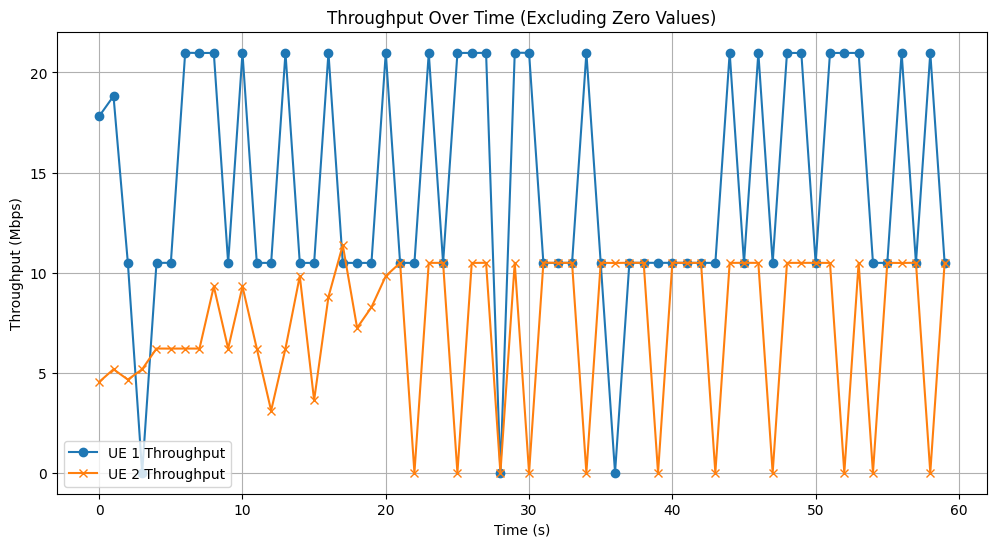

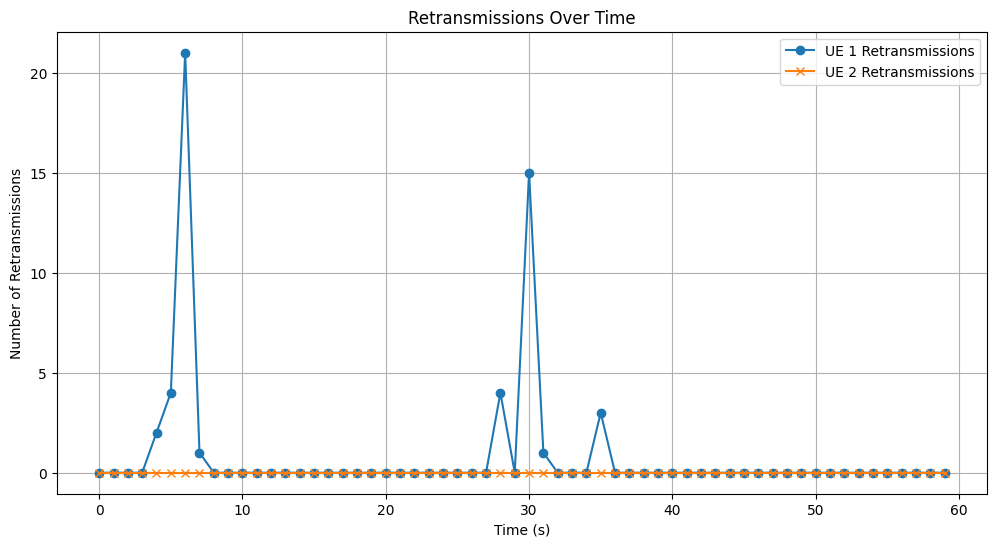

In [91]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with the paths to your actual iperf JSON result files
file1 = 'prague-result-ue1.json'
file2 = 'prague-result-ue2.json'

def load_iperf_data(filename):
    """Load iperf JSON data from a file and return a pandas DataFrame."""
    with open(filename, 'r') as f:
        data = json.load(f)
    
    # Initialize lists to store the extracted data
    intervals = data['intervals']
    start_times = []
    end_times = []
    durations = []
    throughputs = []
    retransmissions = []
    
    # Iterate over each interval in the data
    for interval in intervals:
        sum_data = interval['sum']
        start_times.append(sum_data['start'])
        end_times.append(sum_data['end'])
        durations.append(sum_data['seconds'])
        # Convert throughput from bits per second to megabits per second
        throughput_mbps = sum_data['bits_per_second'] / 1_000_000  # Divide by 1,000,000
        throughputs.append(throughput_mbps)
        retransmissions.append(sum_data.get('retransmits', 0))  # Retransmits might not be present in UDP tests
    
    # Create a DataFrame
    df = pd.DataFrame({
        'Start Time': start_times,
        'End Time': end_times,
        'Duration': durations,
        'Throughput (Mbps)': throughputs,
        'Retransmissions': retransmissions
    })
    
    return df

def filter_zero_throughput(df):
    """Filter out data points where throughput is zero."""
    return df[df['Throughput (Mbps)'] != 0].reset_index(drop=True)

# Load data from both files
df1 = load_iperf_data(file1)
df2 = load_iperf_data(file2)

# Filter out zero throughput data points for plotting throughput
# df1_nonzero = filter_zero_throughput(df1)
# df2_nonzero = filter_zero_throughput(df2)

# Calculate overall throughput and average retransmissions for each dataset
overall_throughput1 = df1['Throughput (Mbps)'].mean()
average_retransmits1 = df1['Retransmissions'].mean()

overall_throughput2 = df2['Throughput (Mbps)'].mean()
average_retransmits2 = df2['Retransmissions'].mean()

print(f"UE 1 - Overall Throughput: {overall_throughput1:.2f} Mbps")
print(f"UE 1 - Average Retransmissions: {average_retransmits1:.2f}")

print(f"\nUE 2 - Overall Throughput: {overall_throughput2:.2f} Mbps")
print(f"UE 2 - Average Retransmissions: {average_retransmits2:.2f}")

# Plotting the throughputs over time (excluding zero throughput data points)
plt.figure(figsize=(12, 6))
plt.plot(df1['Start Time'], df1['Throughput (Mbps)'], label='UE 1 Throughput', marker='o')
plt.plot(df2['Start Time'], df2['Throughput (Mbps)'], label='UE 2 Throughput', marker='x')
plt.title('Throughput Over Time (Excluding Zero Values)')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the retransmissions over time (include all data points)
plt.figure(figsize=(12, 6))
plt.plot(df1['Start Time'], df1['Retransmissions'], label='UE 1 Retransmissions', marker='o')
plt.plot(df2['Start Time'], df2['Retransmissions'], label='UE 2 Retransmissions', marker='x')
plt.title('Retransmissions Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of Retransmissions')
plt.legend()
plt.grid(True)
plt.show()


COMMENT: the cwnd calculation is not showing the expected result. 

In [92]:

name_tx0="prague"


# the csv files generated is of the following format
# timestamp, fd, cwnd, srtt

file_out_tx0_csv = name_tx0+"-ss.csv"

for ue_id in range(1, 3):
    print("Running to generate csv files " + name_tx0)

    ss_tx0_script_processing="""

    f_1={types}; 
    ue_id={ue_id};
    rm -f ${{f_1}}-ss-${{ue_id}}.csv;
    cat ${{f_1}}-ss-${{ue_id}}.txt | sed -e ":a; /<->$/ {{ N; s/<->\\n//; ba; }}"  | grep "iperf3" | grep -v "SYN-SENT"> ${{f_1}}-ss-processed-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | awk '{{print $1}}' > ts-${{f_1}}-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | grep -oP '\\bcwnd:.*?(\s|$)' | awk -F '[:,]' '{{print $2}}' | tr -d ' ' > cwnd-${{f_1}}-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | grep -oP '\\brtt:.*?(\s|$)' | awk -F '[:,]' '{{print $2}}' | tr -d ' '  | cut -d '/' -f 1   > srtt-${{f_1}}-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | grep -oP '\\bfd=.*?(\s|$)' | awk -F '[=,]' '{{print $2}}' | tr -d ')' | tr -d ' '   > fd-${{f_1}}-${{ue_id}}.txt;
    paste ts-${{f_1}}-${{ue_id}}.txt fd-${{f_1}}-${{ue_id}}.txt cwnd-${{f_1}}-${{ue_id}}.txt srtt-${{f_1}}-${{ue_id}}.txt -d ',' > ${{f_1}}-ss-${{ue_id}}.csv;""".format(types=name_tx0, ue_id="ue"+str(ue_id))

    tx.run(ss_tx0_script_processing)

tx.get("prague"+"-ss-ue1.csv")
tx.get("prague"+"-ss-ue2.csv")


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yaoyu\AppData\Local\Temp\ipykernel_34944\1913264848.py:12: SyntaxWarning: invalid escape sequence '\s'
  ss_tx0_script_processing="""


Running to generate csv files prague
Running to generate csv files prague


In [93]:
import itertools
import json
import pandas as pd

throughput_data = {}  # Initialize the dictionary
srtt_data = {}
cwnd_data= pd.DataFrame()
srtt_data_time= pd.DataFrame()

for ue_id in range(1, 3):
    name_tx0="prague"
    ue_str = "ue"+str(ue_id)

    # Load the JSON output file into a Python object
    with open(f"{name_tx0}-result-{ue_str}.json") as f:
        iperf3_data = json.load(f)

    throughput_data[name_tx0+ue_str] = iperf3_data['end']['sum_received']['bits_per_second'] / (1000000 * 1)  # to convert Mbit

    # Average SRTT for Each Flow
    columns = ['timestamp', 'flow ID', 'cwnd', 'srtt']
    df_f1 = pd.read_csv(f"{name_tx0}-ss-{ue_str}.csv", names=columns)
    
    # Filter out rows with flow ID = 4, they are for the control flows
    df_f1 = df_f1[df_f1['flow ID'] != 4].reset_index(drop=True)

    average_RTT_f1 = df_f1['srtt'].mean()
    
    cwnd_data[name_tx0+ue_str] = df_f1['cwnd']
    srtt_data[name_tx0+ue_str] = average_RTT_f1
    srtt_data_time[name_tx0+ue_str] = df_f1['srtt']

# Save throughput_data to a JSON file
with open('throughput_data.json', 'w') as f:
    json.dump(throughput_data, f)

# Save srtt_data to a JSON file
with open('srtt_data.json', 'w') as f:
    json.dump(srtt_data, f)

cwnd_data.to_csv("consolidated_cwnd_data.csv", index=False)
srtt_data_time.to_csv("time_srtt.csv", index=False)

btl limit no ecn:  625000


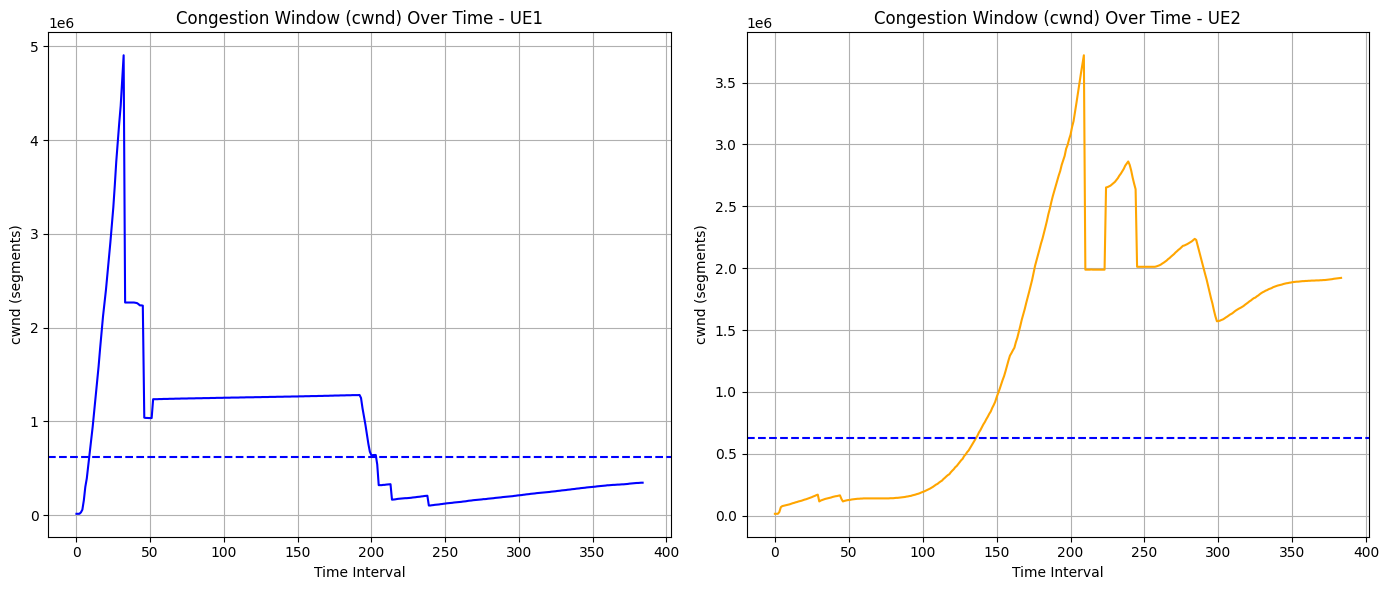

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

btl_limit_noecn=int(1000*btl_capacity*base_rtt*n_bdp /8)

print("btl limit no ecn: ", btl_limit_noecn)

# Specify the filename
filename = 'consolidated_cwnd_data.csv'  # Replace with your actual filename

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(filename)

# Extract data for each UE
ue1_data = df['pragueue1']
ue2_data = df['pragueue2']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for UE1
axes[0].plot(ue1_data*1448, marker='', color='blue')
axes[0].set_title('Congestion Window (cwnd) Over Time - UE1')
axes[0].set_xlabel('Time Interval')
axes[0].set_ylabel('cwnd (segments)')
axes[0].axhline(y=btl_limit_noecn, color='b', linestyle='--', label=f'Buffer Size')
axes[0].grid(True)

# Plot for UE2
axes[1].plot(ue2_data*1448, marker='', color='orange')
axes[1].set_title('Congestion Window (cwnd) Over Time - UE2')
axes[1].set_xlabel('Time Interval')
axes[1].set_ylabel('cwnd (segments)')
axes[1].axhline(y=btl_limit_noecn, color='b', linestyle='--', label=f'Buffer Size')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [95]:
router.close()
router = Connection(
    host='pc487.emulab.net',
    user='PeterYao',
    port=22,
)

router.get("monitor.log")

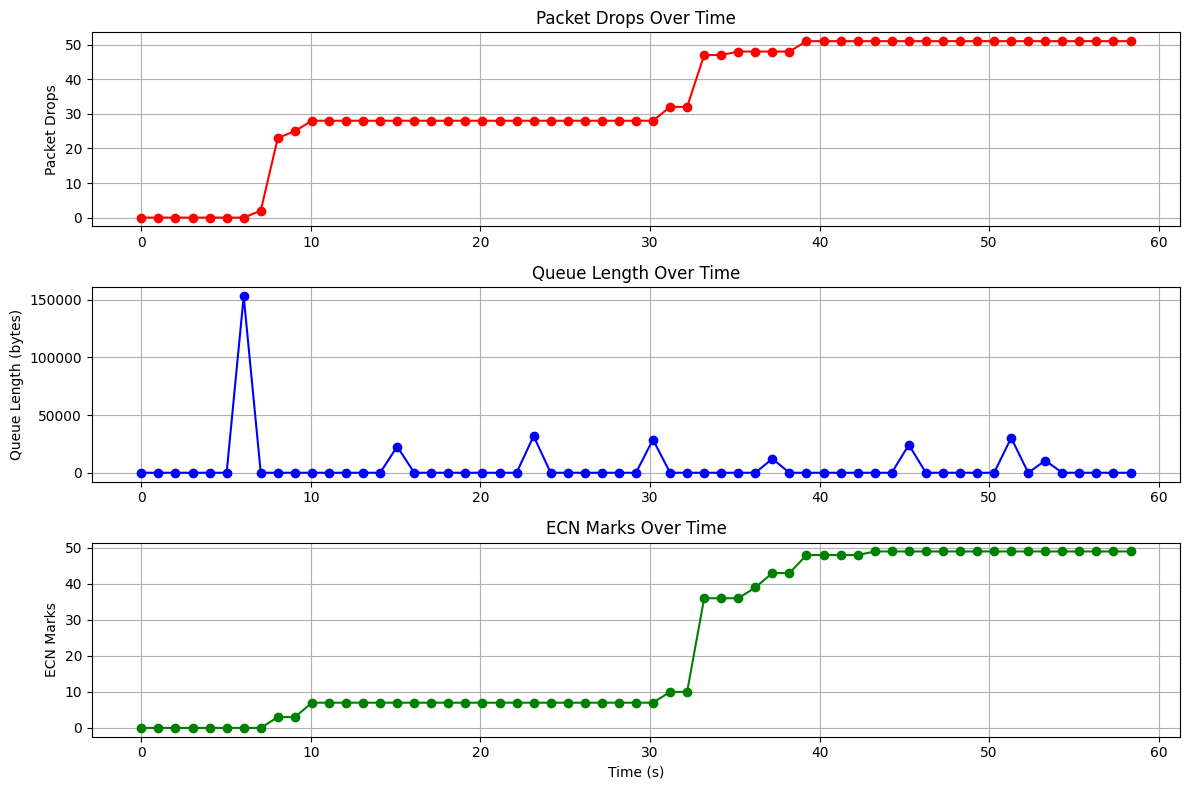

In [96]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define a function to parse the log file
def parse_qdisc_log(filename):
    timestamps = []
    packet_drops = []
    queue_lengths = []
    ecn_marks = []
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()

            # Extract timestamp
            match_time = re.match(r'^(\d+\.\d+)', line)
            if match_time:
                timestamps.append(float(match_time.group(1)))

            # Extract packet drops, queue length, and ECN mark count for dualpi2 queue
            match_dualpi2 = re.search(r'qdisc dualpi2.*dropped (\d+).*backlog (\d+)b.*ecn_mark (\d+)', line)
            if match_dualpi2:
                packet_drops.append(int(match_dualpi2.group(1)))
                queue_lengths.append(int(match_dualpi2.group(2)))
                ecn_marks.append(int(match_dualpi2.group(3)))

    # Create a DataFrame
    df = pd.DataFrame({
        'Timestamp': timestamps[:len(packet_drops)],  # Align timestamps with the collected data
        'Packet Drops': packet_drops,
        'Queue Length (bytes)': queue_lengths,
        'ECN Marks': ecn_marks
    })
    
    # Normalize timestamps to start from 0
    df['Relative Time (s)'] = df['Timestamp'] - df['Timestamp'].iloc[0]
    
    return df

# Step 2: Define a function to plot packet drops, queue length, and ECN mark count
def plot_qdisc_metrics(df):
    plt.figure(figsize=(12, 8))

    # Plot packet drops
    plt.subplot(3, 1, 1)
    plt.plot(df['Relative Time (s)'], df['Packet Drops'], label="Packet Drops", color='r', marker='o')
    plt.title('Packet Drops Over Time')
    plt.ylabel('Packet Drops')
    plt.grid(True)

    # Plot queue length
    plt.subplot(3, 1, 2)
    plt.plot(df['Relative Time (s)'], df['Queue Length (bytes)'], label="Queue Length", color='b', marker='o')
    plt.title('Queue Length Over Time')
    plt.ylabel('Queue Length (bytes)')
    plt.grid(True)

    # Plot ECN marks
    plt.subplot(3, 1, 3)
    plt.plot(df['Relative Time (s)'], df['ECN Marks'], label="ECN Marks", color='g', marker='o')
    plt.title('ECN Marks Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('ECN Marks')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Step 3: Read the file and generate plots
filename = 'monitor.log'  # Update the file path as needed
df = parse_qdisc_log(filename)
plot_qdisc_metrics(df)


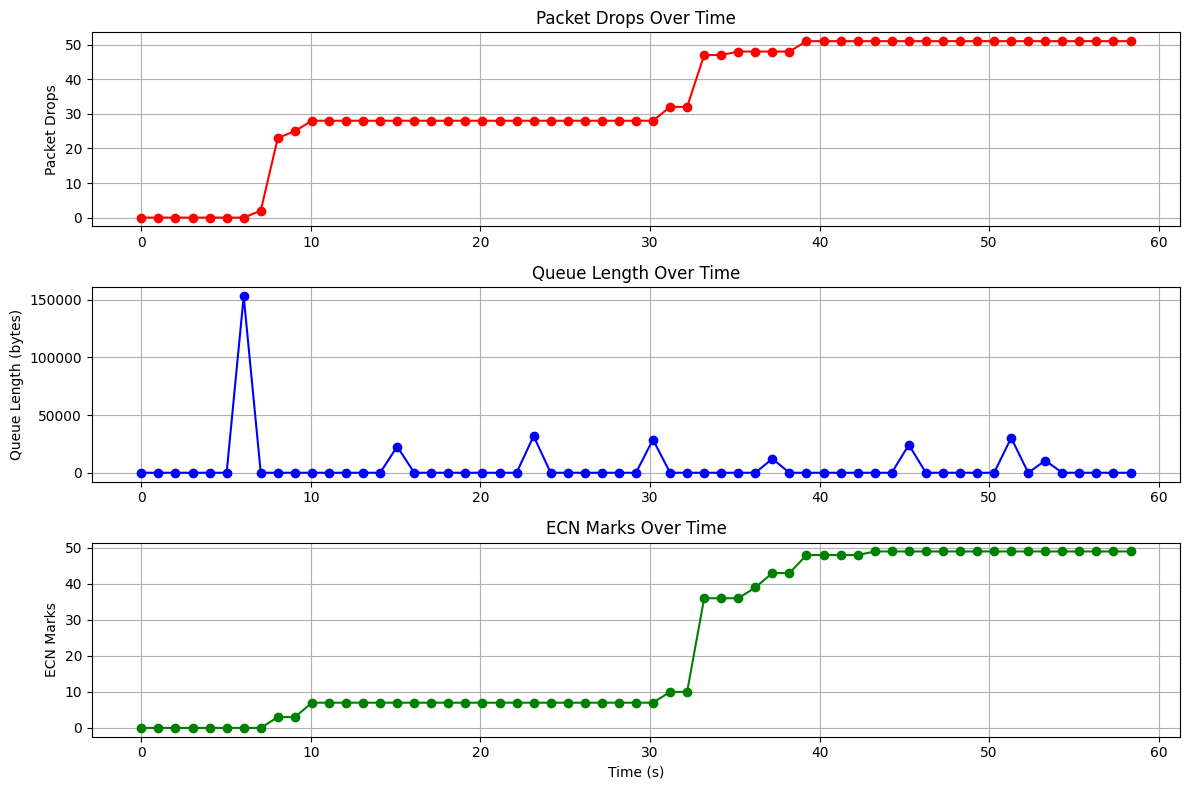

In [97]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define a function to parse the log file
def parse_qdisc_log(filename):
    timestamps = []
    packet_drops = []
    queue_lengths = []
    ecn_marks = []
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()

            # Extract timestamp
            match_time = re.match(r'^(\d+\.\d+)', line)
            if match_time:
                timestamps.append(float(match_time.group(1)))

            # Extract packet drops, queue length, and ECN mark count for dualpi2 queue
            match_dualpi2 = re.search(r'qdisc dualpi2.*dropped (\d+).*backlog (\d+)b.*ecn_mark (\d+)', line)
            if match_dualpi2:
                packet_drops.append(int(match_dualpi2.group(1)))
                queue_lengths.append(int(match_dualpi2.group(2)))
                ecn_marks.append(int(match_dualpi2.group(3)))

    # Create a DataFrame
    df = pd.DataFrame({
        'Timestamp': timestamps[:len(packet_drops)],  # Align timestamps with the collected data
        'Packet Drops': packet_drops,
        'Queue Length (bytes)': queue_lengths,
        'ECN Marks': ecn_marks
    })
    
    # Normalize timestamps to start from 0
    df['Relative Time (s)'] = df['Timestamp'] - df['Timestamp'].iloc[0]
    
    return df

# Step 2: Define a function to plot packet drops, queue length, and ECN mark count
def plot_qdisc_metrics(df):
    plt.figure(figsize=(12, 8))

    # Plot packet drops
    plt.subplot(3, 1, 1)
    plt.plot(df['Relative Time (s)'], df['Packet Drops'], label="Packet Drops", color='r', marker='o')
    plt.title('Packet Drops Over Time')
    plt.ylabel('Packet Drops')
    plt.grid(True)

    # Plot queue length
    plt.subplot(3, 1, 2)
    plt.plot(df['Relative Time (s)'], df['Queue Length (bytes)'], label="Queue Length", color='b', marker='o')
    plt.title('Queue Length Over Time')
    plt.ylabel('Queue Length (bytes)')
    plt.grid(True)

    # Plot ECN marks
    plt.subplot(3, 1, 3)
    plt.plot(df['Relative Time (s)'], df['ECN Marks'], label="ECN Marks", color='g', marker='o')
    plt.title('ECN Marks Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('ECN Marks')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Step 3: Read the file and generate plots
filename = 'monitor.log'  # Replace this with the actual path to your file
df = parse_qdisc_log(filename)
plot_qdisc_metrics(df)


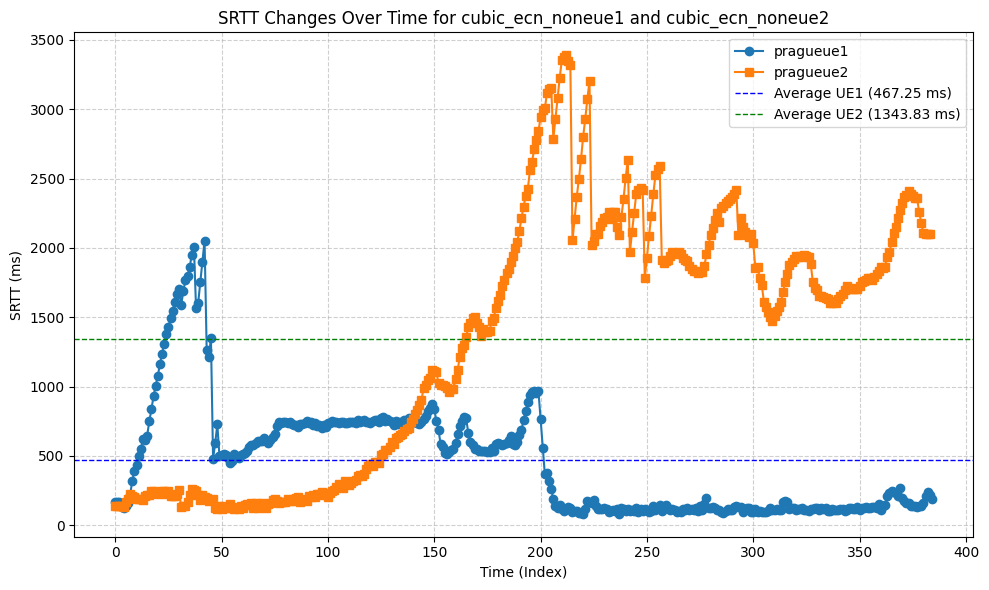

Average SRTT for cubic_ecn_noneue1: 467.248 ms
Average SRTT for cubic_ecn_noneue2: 1343.831 ms


In [98]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# File path to the uploaded CSV file
file_path = 'time_srtt.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Calculate the average SRTT for each UE
avg_ue1 = df['pragueue1'].mean()
avg_ue2 = df['pragueue2'].mean()

# Plot the SRTT changes over time for both UE1 and UE2
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['pragueue1'], label='pragueue1', marker='o')
plt.plot(df.index, df['pragueue2'], label='pragueue2', marker='s')

# Plot average lines
plt.axhline(y=avg_ue1, color='blue', linestyle='--', linewidth=1, label=f'Average UE1 ({avg_ue1:.2f} ms)')
plt.axhline(y=avg_ue2, color='green', linestyle='--', linewidth=1, label=f'Average UE2 ({avg_ue2:.2f} ms)')

# Adding labels and title
plt.xlabel('Time (Index)')
plt.ylabel('SRTT (ms)')
plt.title('SRTT Changes Over Time for cubic_ecn_noneue1 and cubic_ecn_noneue2')

# Adding a legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

# Print the average SRTT for each UE
print(f"Average SRTT for cubic_ecn_noneue1: {avg_ue1:.3f} ms")
print(f"Average SRTT for cubic_ecn_noneue2: {avg_ue2:.3f} ms")
